# Exploratory Data Analysis

Done with Google Colab.

Ressources:
* https://waytolearnx.com/2019/04/comment-extraire-un-fichier-zip-en-python.html
* https://apprendrepython.com/obtenir-la-taille-dune-image-largeur-hauteur-avec-python-opencv-pillow-pil/
* https://www.mathweb.fr/euclide/2020/04/18/les-images-et-python/
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
* https://webdevdesigner.com/q/convert-rgb-color-to-english-color-name-like-green-with-python-79379/
* https://pypi.org/project/webcolors/1.3/
* https://github.com/nschloe/tikzplotlib/issues/618

## Download images and libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import cv2
from PIL import Image
import webcolors
import os

file = "/content/Liver_Medical_Image _Datasets.zip"
with ZipFile(file, 'r') as zip:
    zip.extractall("Datasets")

images_path = "/content/Datasets/Liver_Medical_Image _Datasets/Images"
labels_path = "/content/Datasets/Liver_Medical_Image _Datasets/Labels"

old_path = "/content/Datasets/Liver_Medical_Image _Datasets/"
new_path = "/content/data/"
os.rename(old_path, new_path)

In [ ]:
file = "/content/Liver_Medical_Image _Datasets.zip"
with ZipFile(file, 'r') as zip:
    zip.extractall("Datasets")

N = 400

## Analysis

In [ ]:
# image 0
image_0 = cv2.imread(images_path + "/000.png")
label_0 = cv2.imread(labels_path + "/000_mask.png")
print(image_0.shape)
print(label_0.shape)

# compare the size to other images
for i in range(1, N):
  if i<10:
    code = "00" + str(i)
  elif i<100:
    code = "0" + str(i)
  else:
    code = str(i)
  image = cv2.imread(images_path + "/" + code + ".png")
  label = cv2.imread(labels_path + "/" + code + "_mask.png")
  if image.shape != image_0.shape:
    print("Image_" + code + ": " + image.shape)
  if label.shape != label_0.shape:
    print("Label_" + code + ": " + label.shape)
  if np.array_equal(image[:,:,0],image[:,:,1])==False or np.array_equal(image[:,:,0],image[:,:,2])==False:
    print("Image_" + code + ": real RGB")
  if np.array_equal(label[:,:,0],label[:,:,1])==False or np.array_equal(label[:,:,0],label[:,:,2])==False:
    print("Label_" + code + ": real RGB")

All images and labels have the same image size: 512x512 pixels, with 3 channels (RGB), but all three channels have the same value, so it is gray scale.

In [ ]:
def count_pixels_img(img_path, height=512, width=512, convert=0):
  """
  Input: path of an image
  Output: dictionary of the number of pixels for each colour
  """
  img = Image.open(img_path)
  if convert:
    img = img.convert('RGB')
  pixels = img.load()
  colours = {}
  for x in range(height):
    for y in range(width):
      if pixels[x, y] not in colours:
        colours[pixels[x, y]] = 1
      else:
        colours[pixels[x, y]] += 1
  return colours

colours_images = {}
colours_labels = {}

for i in range(N):
  if i<10:
    code = "00" + str(i)
  elif i<100:
    code = "0" + str(i)
  else:
    code = str(i)
  colours_images[code] = count_pixels_img(images_path + "/" + code + ".png")
  colours_labels[code] = count_pixels_img(labels_path + "/" + code + "_mask.png")

In [ ]:
# Example
print(colours_images["000"])
print(colours_labels["000"])
print(colours_images["000"].keys())
print(len(colours_images["000"]))

In [ ]:
# code copied from https://webdevdesigner.com/q/convert-rgb-color-to-english-color-name-like-green-with-python-79379/
# and modified thanks to https://github.com/nschloe/tikzplotlib/issues/618

def closest_colour(requested_colour):
    min_colours = {}
    for name in webcolors.names("css3"):
      intrgb = webcolors.name_to_rgb(name)
      rd = (intrgb.red - requested_colour[0]) ** 2
      gd = (intrgb.green - requested_colour[1]) ** 2
      bd = (intrgb.blue - requested_colour[2]) ** 2
      min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

# Example
requested_colour = (119, 172, 152)
actual_name, closest_name = get_colour_name(requested_colour)
print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

In [ ]:
def define_classes(colours=colours_labels, num_pixels=512*512):
  """
  Input: dictionary of dictionaries of numbers of pixels per colour (-> black or white) for each image
  Output: dictionary of classes, where keys are percentages of white pixels and values are corresponding codes of images
  """
  classes = { "<1%" : [], "1% - 2%" : [], "2% - 3%" : [], "3% - 4%" : [], "4% - 5%" : [], "5% - 6%" : [], "6% - 7%" : [], "7% - 8%" : [], "8% - 9%" : [], "9% - 10%" : [], "10% - 11%" : [], "11% - 12%" : [], "12% - 13%" : [], "13% - 14%" : [], "14% - 15%" : [], "15% - 16%" : [], "16% - 17%" : [], "17% - 18%" : [], "18% - 19%" : [], ">19%" : [] }
  for code in colours:
    white_pixels = float(colours[code][255])
    percentage = white_pixels/float(num_pixels)
    if percentage > 0.19:
      classes[">19%"].append(code)
    elif percentage > 0.18:
      classes["18% - 19%"].append(code)
    elif percentage > 0.17:
      classes["17% - 18%"].append(code)
    elif percentage > 0.16:
      classes["16% - 17%"].append(code)
    elif percentage > 0.15:
      classes["15% - 16%"].append(code)
    elif percentage > 0.14:
      classes["14% - 15%"].append(code)
    elif percentage > 0.13:
      classes["13% - 14%"].append(code)
    elif percentage > 0.12:
      classes["12% - 13%"].append(code)
    elif percentage > 0.11:
      classes["11% - 12%"].append(code)
    elif percentage > 0.10:
      classes["10% - 11%"].append(code)
    elif percentage > 0.09:
      classes["9% - 10%"].append(code)
    elif percentage > 0.08:
      classes["8% - 9%"].append(code)
    elif percentage > 0.07:
      classes["7% - 8%"].append(code)
    elif percentage > 0.06:
      classes["6% - 7%"].append(code)
    elif percentage > 0.05:
      classes["5% - 6%"].append(code)
    elif percentage > 0.04:
      classes["4% - 5%"].append(code)
    elif percentage > 0.03:
      classes["3% - 4%"].append(code)
    elif percentage > 0.02:
      classes["2% - 3%"].append(code)
    elif percentage > 0.01:
      classes["1% - 2%"].append(code)
    else:
      classes["<1%"].append(code)
  return classes

def new_colours(colours=colours_images):
  """
  Input: dictionary of dictionaries of numbers of pixels per colour for each image
  Output: same with new colours as keys
  """
  new_colours = {}
  for code in colours:
    new_colours[code] = {}
    for colour in colours[code]:
      new = get_colour_name(colour)[1]
      if new not in new_colours[code]:
        new_colours[code][new] = colours[code][colour]
      else:
        new_colours[code][new] += colours[code][colour]
  return new_colours

def average_value_per_class(codes, colours, num_pixels=512*512):
  """
  Input:
  - codes: list of codes for the class
  - colours: dictionary of dictionaries of numbers of pixels per colour for each image
  - num_pixels: number of pixels in an image
  Output: dictionary of average number of pixels per colour
  """
  average_per_class = {} # keys: name of colour ; values: average number of pixels of this colour (in this class)
  for code in codes:
    colours_per_image = colours[code]
    for colour in colours_per_image:
      if colour not in average_per_class:
        average_per_class[colour] = colours_per_image[colour]
      else:
        average_per_class[colour] += colours_per_image[colour]
  average_per_class = { colour : average_per_class[colour]/float(len(codes)) for colour in average_per_class }
  return average_per_class

def average_value(categories, new_col, num_pixels=512*512):
  """
  Input:
  - categories: dictionary obtained from "define_classes"
  - num_pixels: number of pixels in an image
  Output: dictionary of dictionaries of average number of pixels per colour per class
  """
  average = {}
  for category in categories.keys():
    average[category] = average_value_per_class(categories[category], new_col, num_pixels)
  return average

In [ ]:
classes = define_classes()
print(classes)

new_colours_images = new_colours()
print(new_colours_images)
print(new_colours_images["000"])

class_test = average_value_per_class(classes["7% - 8%"], new_colours_images)
print(class_test)

average = average_value(classes, new_colours_images)
print(average)
print(average.keys())

In [ ]:
# Structure of 'average'

"""
average = {
  "<1%" : {
    "black": ...,
    "grey": ...,
    "darkgrey": ...,
    "lightgrey": ...,
    ...
  },
  "1% - 2%" : {
    "black": ...,
    "grey": ...,
    "darkgrey": ...,
    "lightgrey": ...,
    ...
  },
  ...
}
"""

In [ ]:
# presenting the results in a different way, with percentages

average_data = {}

colours_list = []
for category in classes:
  keys = average[category].keys()
  for colour in keys:
    if colour not in colours_list:
      colours_list.append(colour)

for colour in colours_list:
  avg = []
  for category in classes:
    if colour in average[category]:
      avg.append(average[category][colour]/float(512*512))
    else:
      avg.append(0)
  average_data[colour] = np.array(avg)

print(average_data)

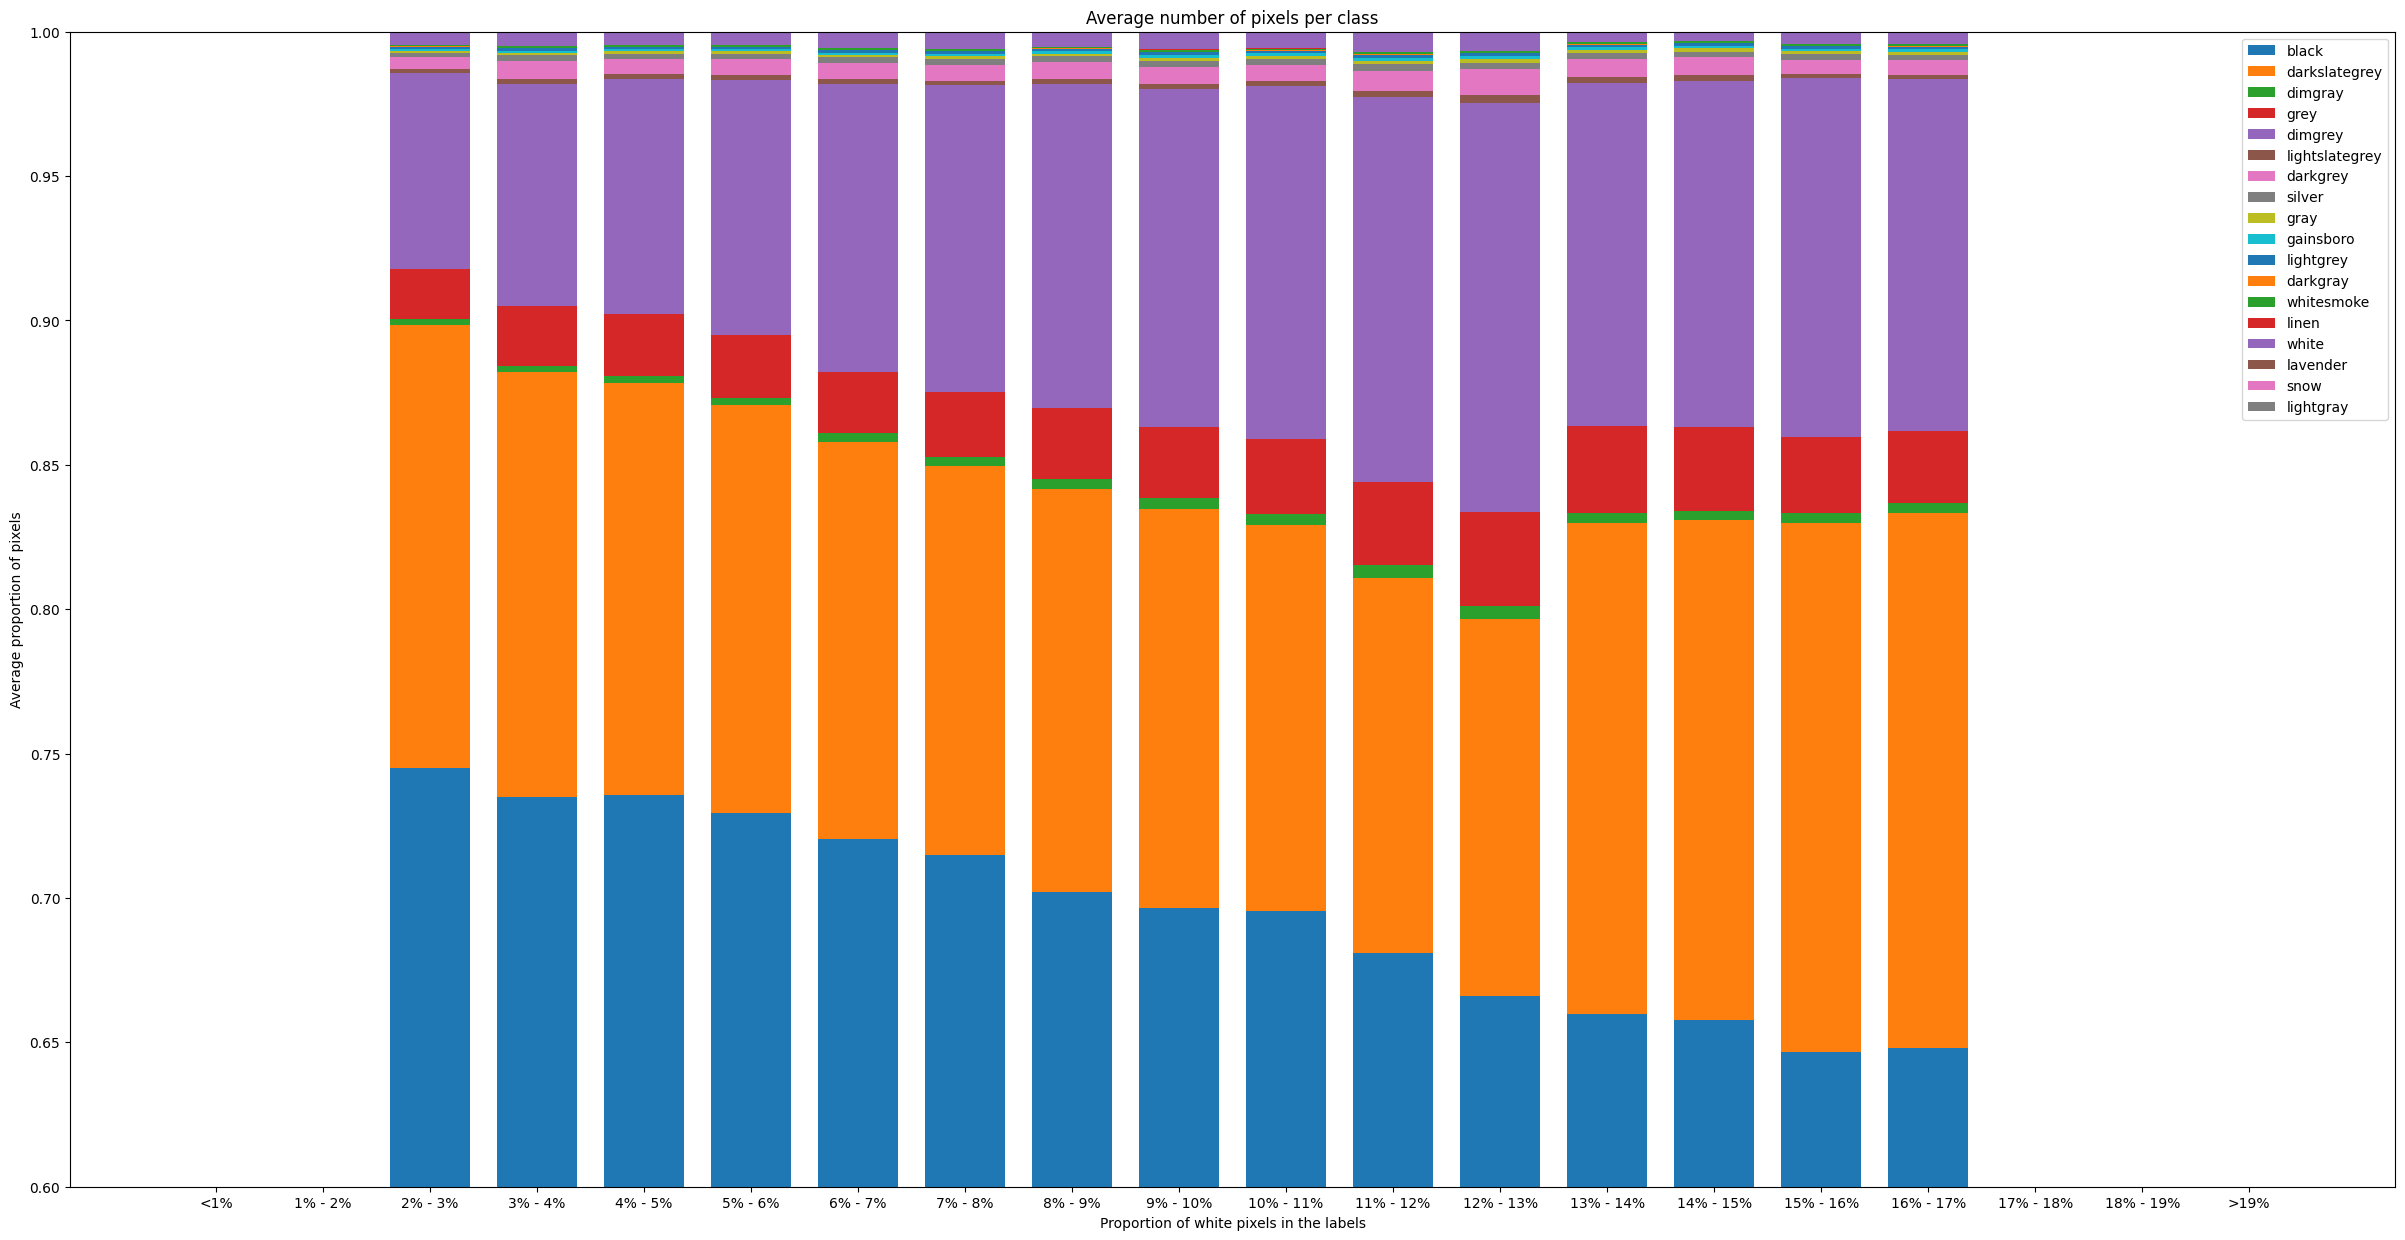

In [ ]:
# plot
categories = list(classes.keys())
width = 0.75
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_ylim(bottom=0.6)
bottom = np.zeros((len(classes)))
for colour, colour_avg in average_data.items():
  p = ax.bar(categories, colour_avg, width, label=colour, bottom=bottom)
  bottom += colour_avg
  #ax.bar_label(p, label_type='center')
ax.set_title("Average number of pixels per class")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Average proportion of pixels")
ax.legend()
plt.show()

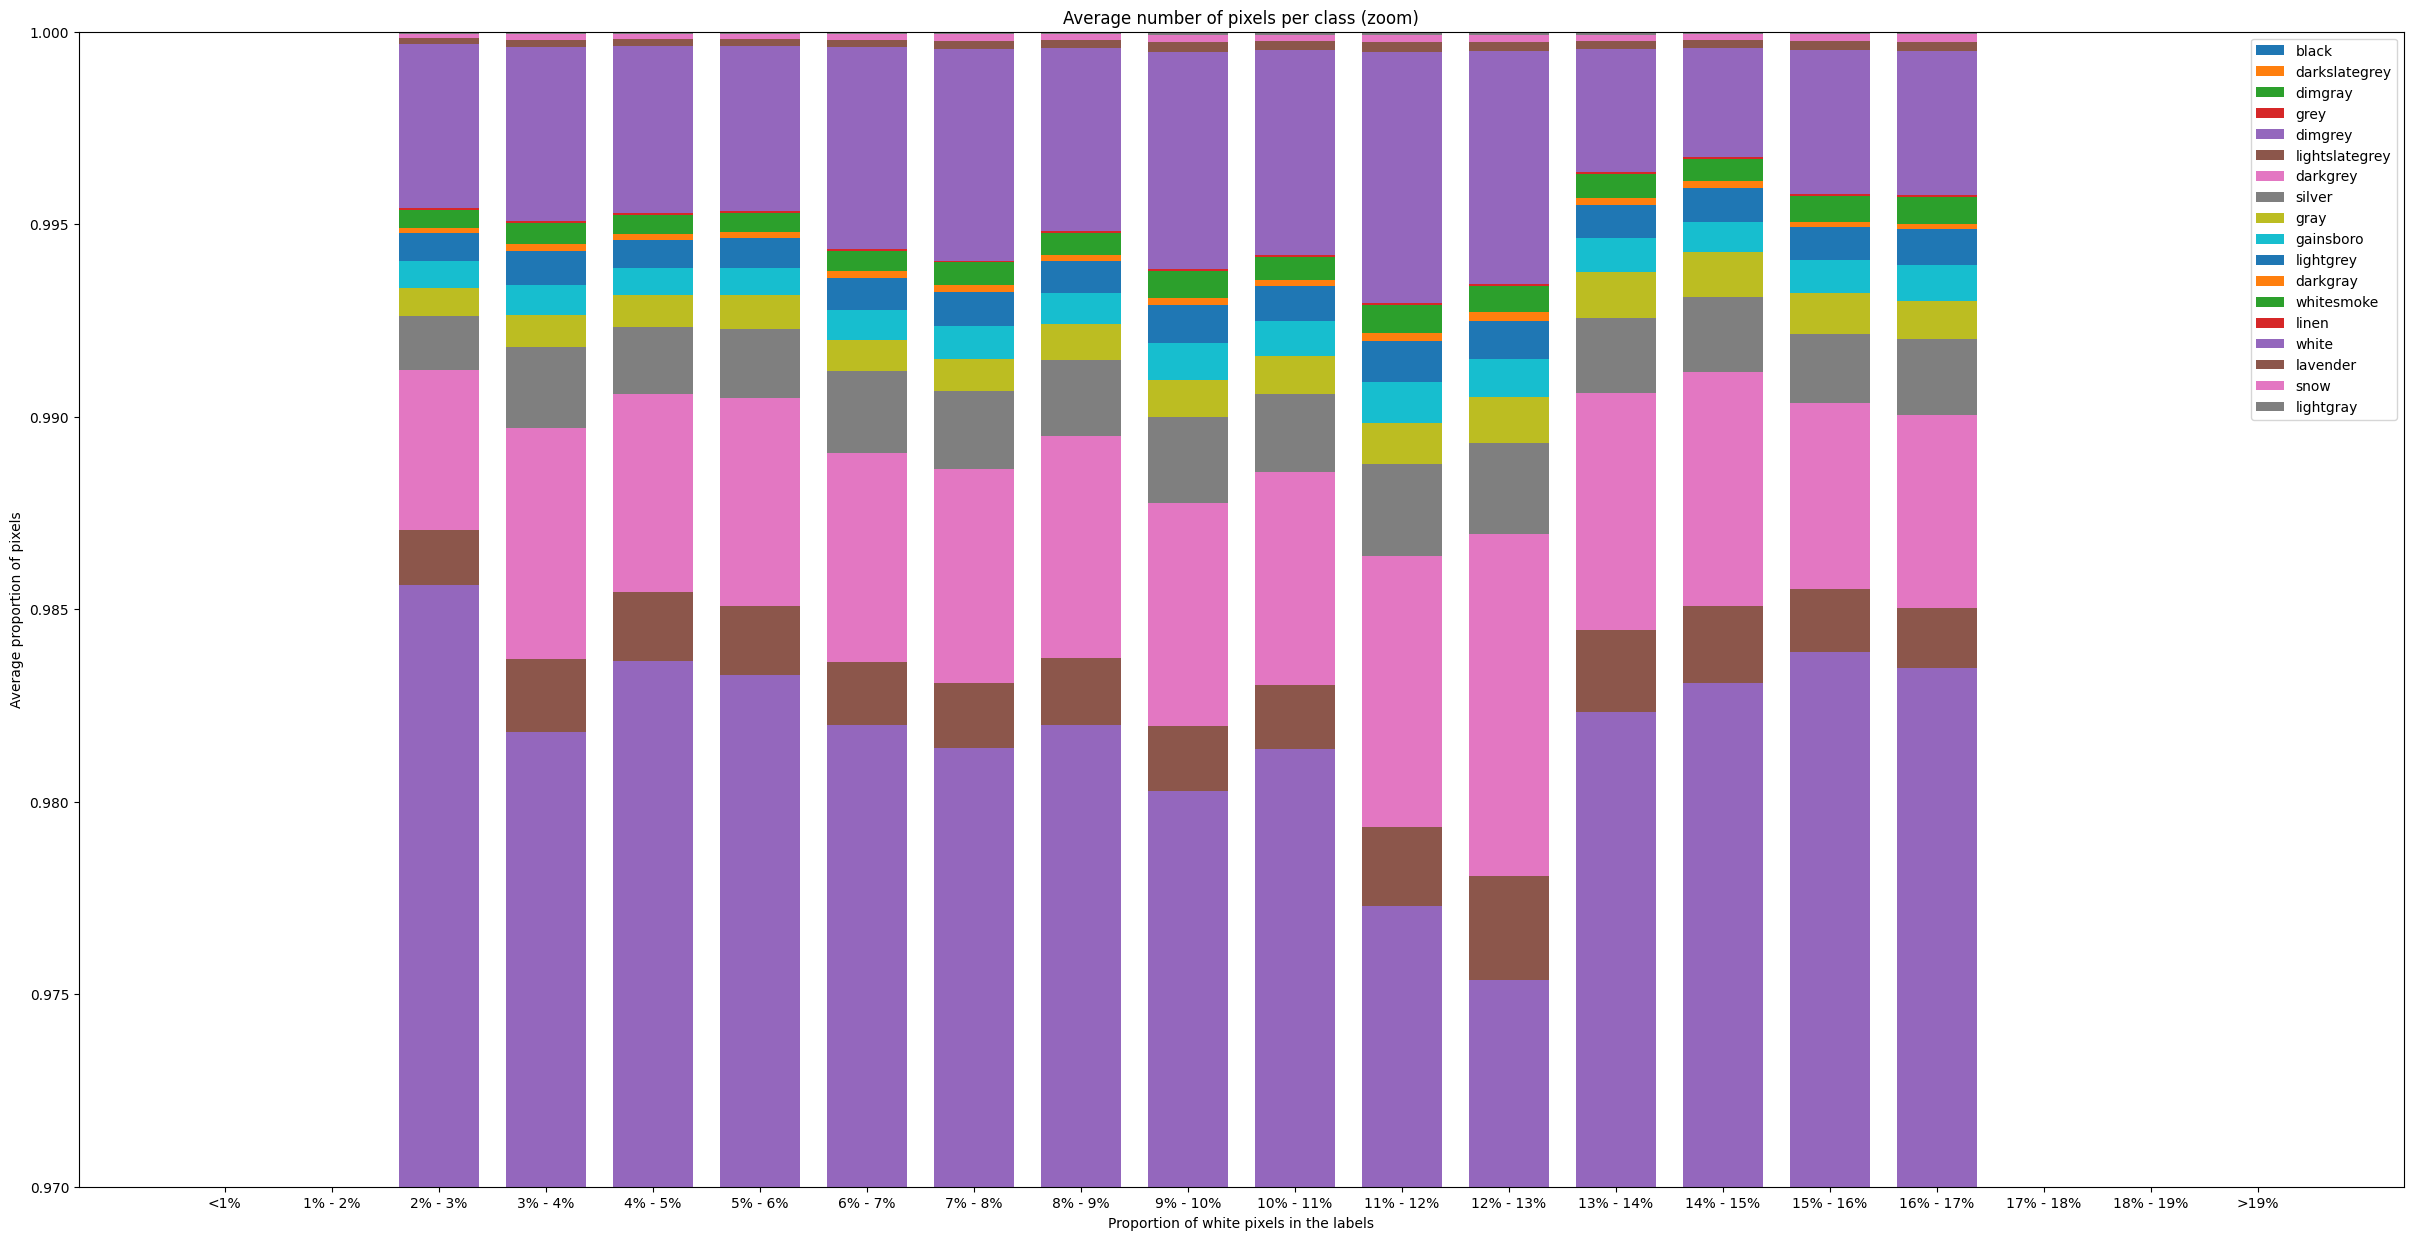

In [ ]:
# plot (zoom)
categories = list(classes.keys())
width = 0.75
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_ylim(bottom=0.97)
bottom = np.zeros((len(classes)))
for colour, colour_avg in average_data.items():
  p = ax.bar(categories, colour_avg, width, label=colour, bottom=bottom)
  bottom += colour_avg
  #ax.bar_label(p, label_type='center')
ax.set_title("Average number of pixels per class (zoom)")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Average proportion of pixels")
ax.legend()
plt.show()

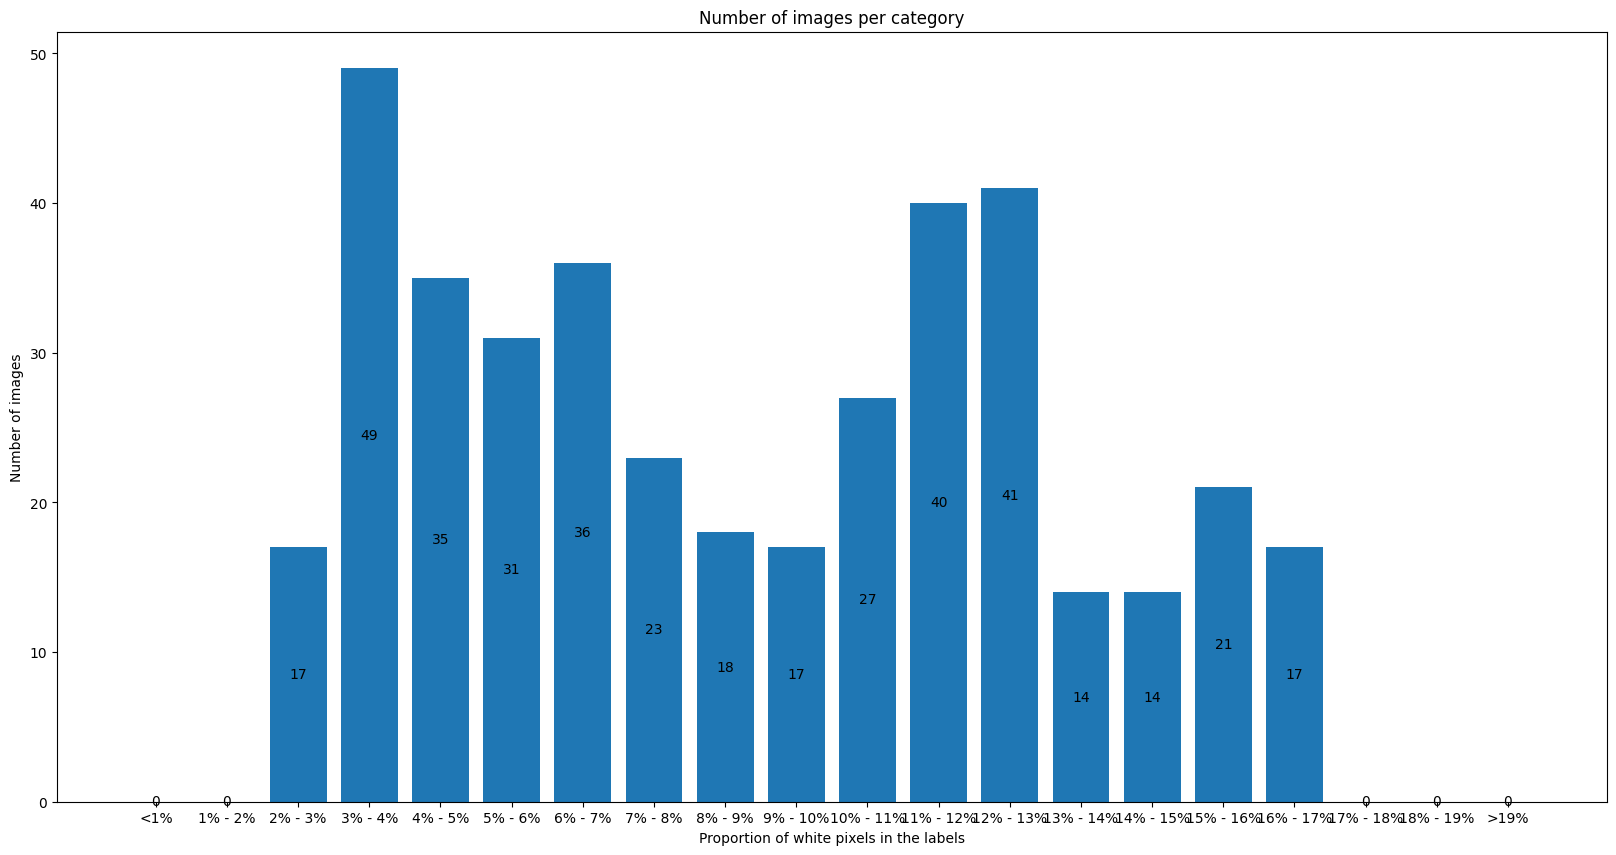

In [ ]:
# plot (number of images per categoy)
categories = list(classes.keys())
count = [len(classes[key]) for key in classes.keys()]
fig, ax = plt.subplots(figsize=(20, 10))
p = ax.bar(categories, count)
ax.bar_label(p, label_type='center')
ax.set_title("Number of images per category")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Number of images")
plt.show()

In [ ]:
def pixels_on_white(img_path, mask_path, height=512, width=512, convert=0):
  """
  Input:
  - img_path: path of an image
  - mask_path: path of a label
  Output: dictionary of dictionaries of numbers of pixels per colour for each image
  The pixels considered in the image are only those who correspond to white pixels in the label.
  """
  img = Image.open(img_path)
  label = Image.open(mask_path)
  if convert:
    img = img.convert('RGB')
    label = label.convert('RGB')
  pixels_img = img.load()
  pixels_label = label.load()
  colours = {}
  for x in range(height):
    for y in range(width):
      if pixels_label[x, y] == 255:
        if pixels_img[x, y] not in colours:
          colours[pixels_img[x, y]] = 1
        else:
          colours[pixels_img[x, y]] += 1
  return colours

white_images = {}
for i in range(N):
  if i<10:
    code = "00" + str(i)
  elif i<100:
    code = "0" + str(i)
  else:
    code = str(i)
  white_images[code] = pixels_on_white(images_path + "/" + code + ".png", labels_path + "/" + code + "_mask.png")
print(white_images)

new_white_images = new_colours(white_images)
print(new_white_images)

white_average = average_value(classes, new_white_images)
print(white_average)

white_avg_data = {}
for colour in colours_list:
  avg = []
  for category in classes:
    if colour in white_average[category]:
      avg.append(white_average[category][colour]/float(512*512))
    else:
      avg.append(0)
  white_avg_data[colour] = np.array(avg)
print(white_avg_data)

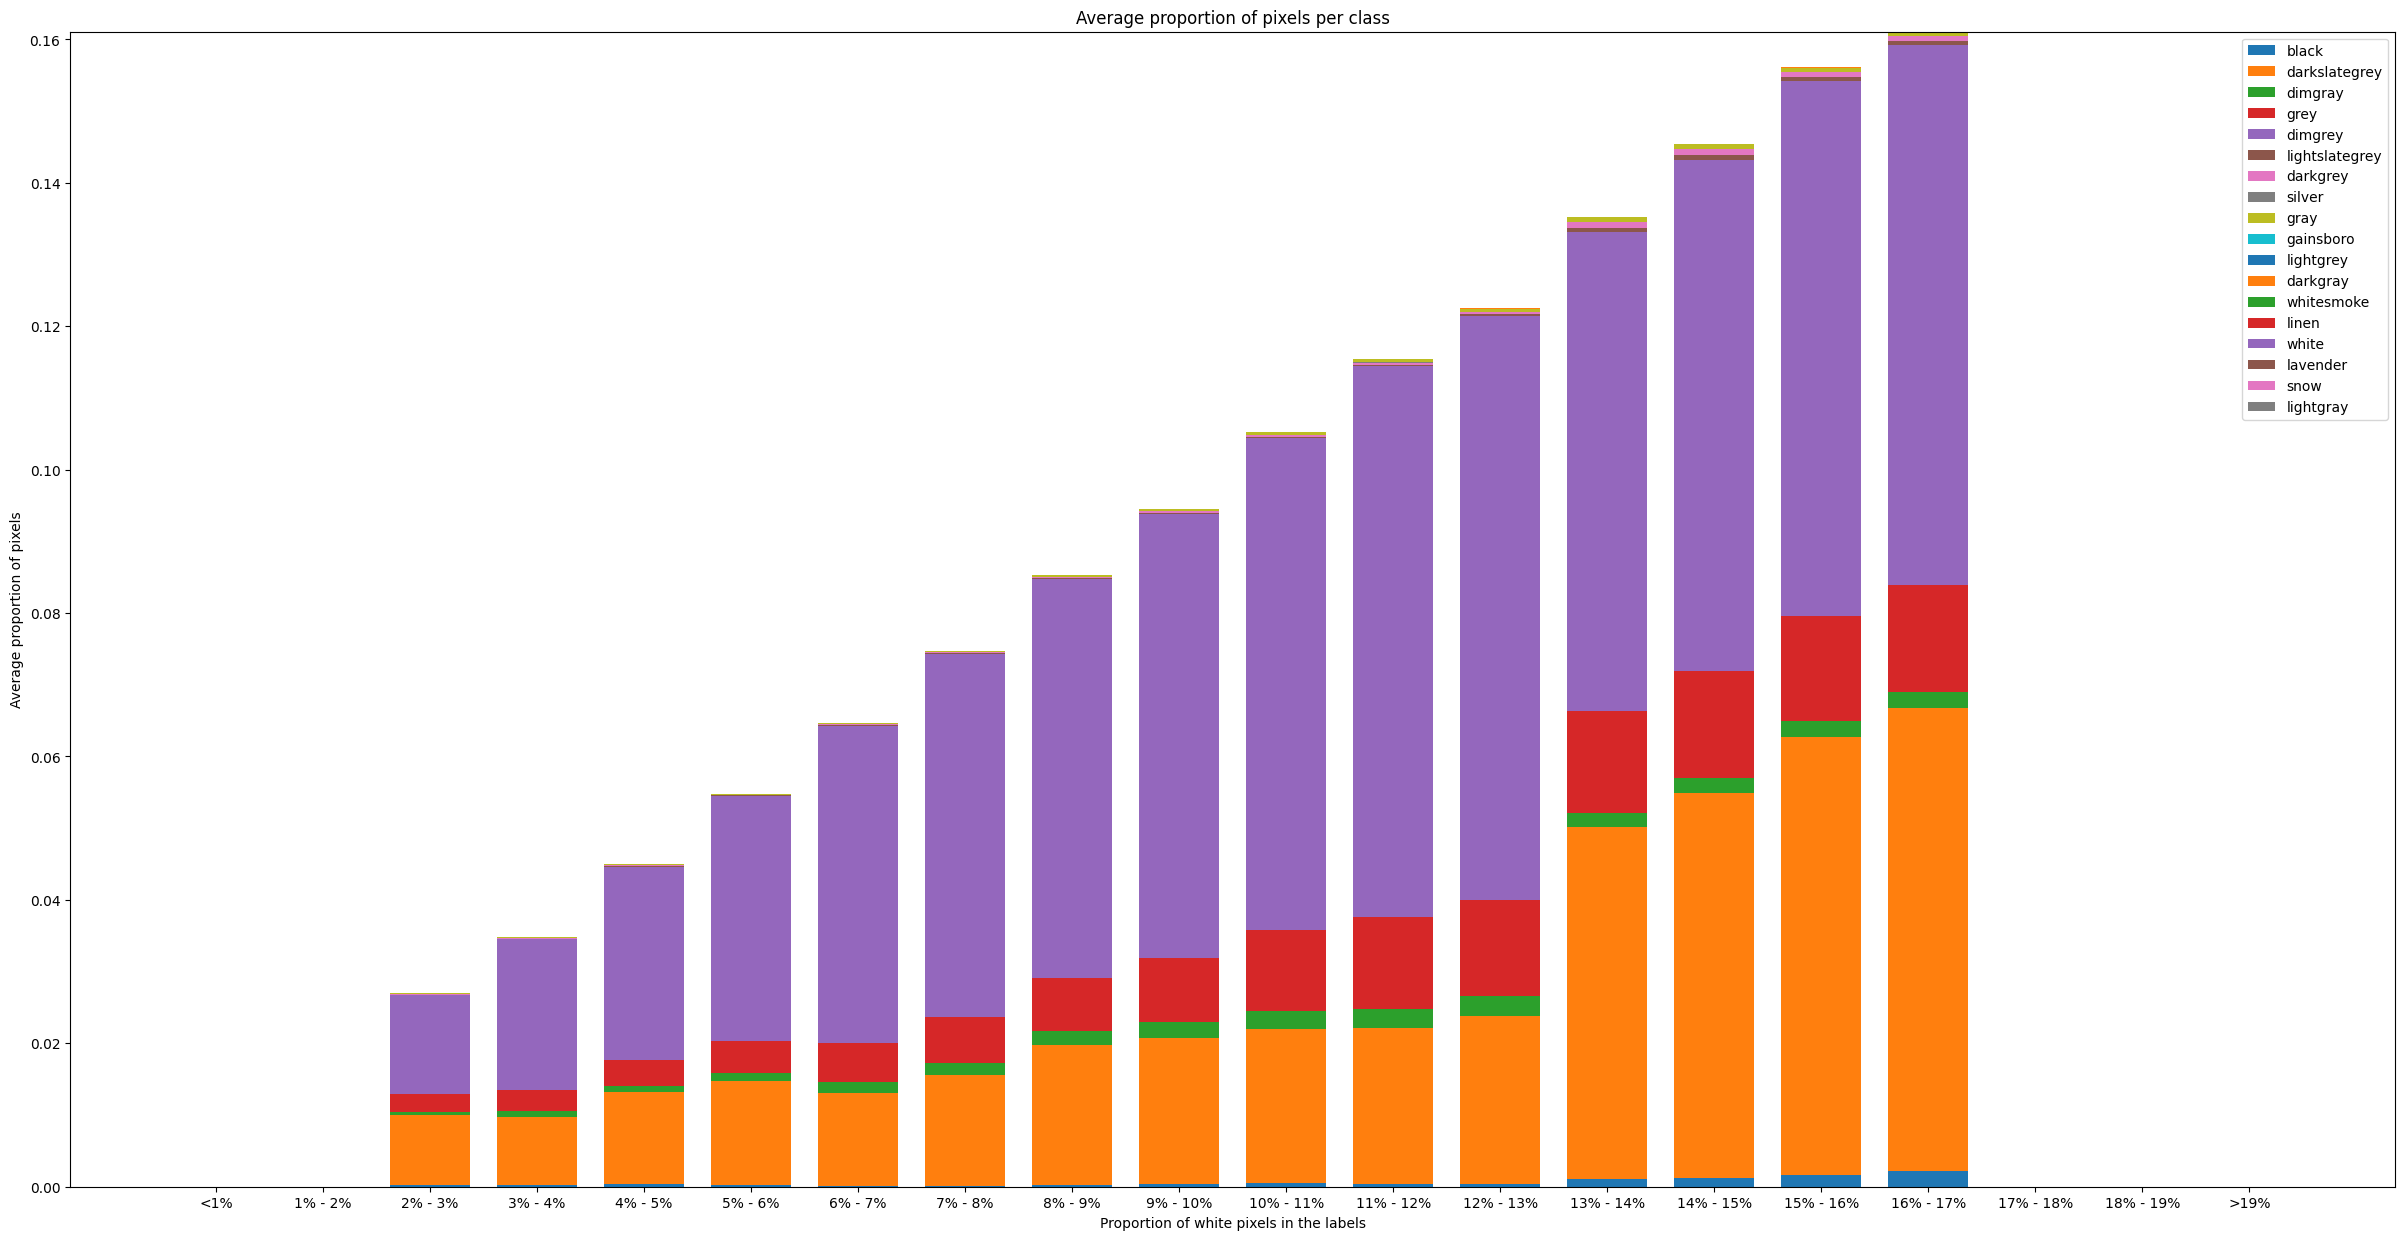

In [ ]:
# plot
categories = list(classes.keys())
width = 0.75
fig, ax = plt.subplots(figsize=(30, 15))
bottom = np.zeros((len(classes)))
for colour, colour_avg in white_avg_data.items():
  p = ax.bar(categories, colour_avg, width, label=colour, bottom=bottom)
  bottom += colour_avg
  #ax.bar_label(p, label_type='center')
ax.set_title("Average proportion of pixels per class")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Average proportion of pixels")
ax.legend()
plt.show()

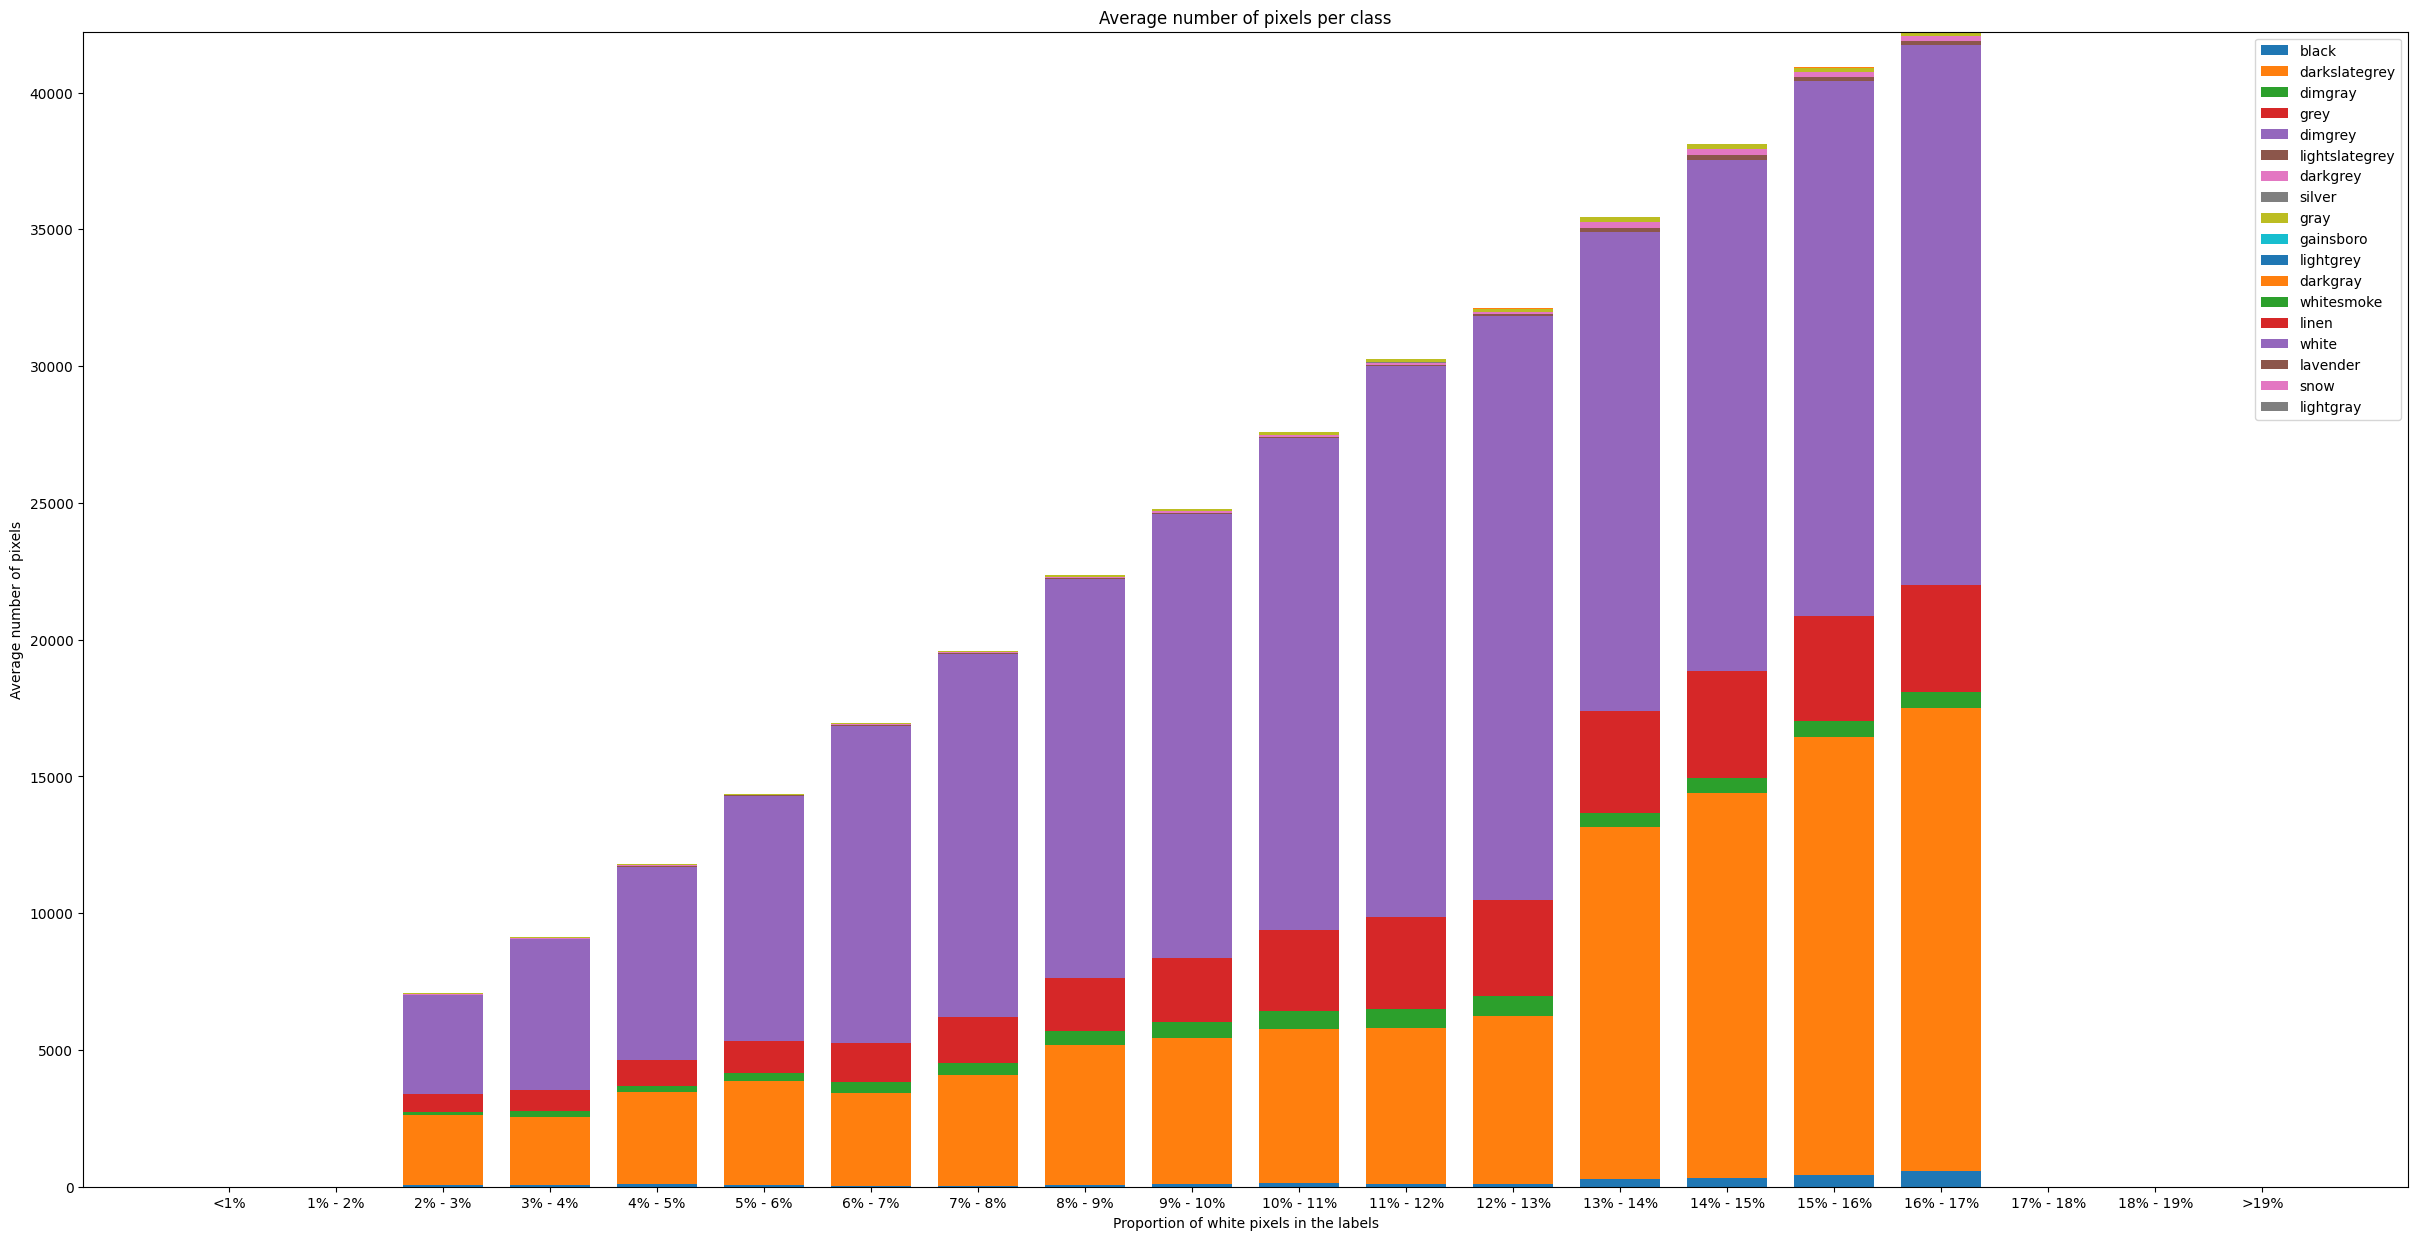

In [ ]:
white_avg_num = {}
for colour in colours_list:
  avg = []
  for category in classes:
    if colour in white_average[category]:
      avg.append(white_average[category][colour])
    else:
      avg.append(0)
  white_avg_num[colour] = np.array(avg)

# plot
categories = list(classes.keys())
width = 0.75
fig, ax = plt.subplots(figsize=(30, 15))
bottom = np.zeros((len(classes)))
for colour, colour_avg in white_avg_num.items():
  p = ax.bar(categories, colour_avg, width, label=colour, bottom=bottom)
  bottom += colour_avg
  #ax.bar_label(p, label_type='center')
ax.set_title("Average number of pixels per class")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Average number of pixels")
ax.legend()
plt.show()

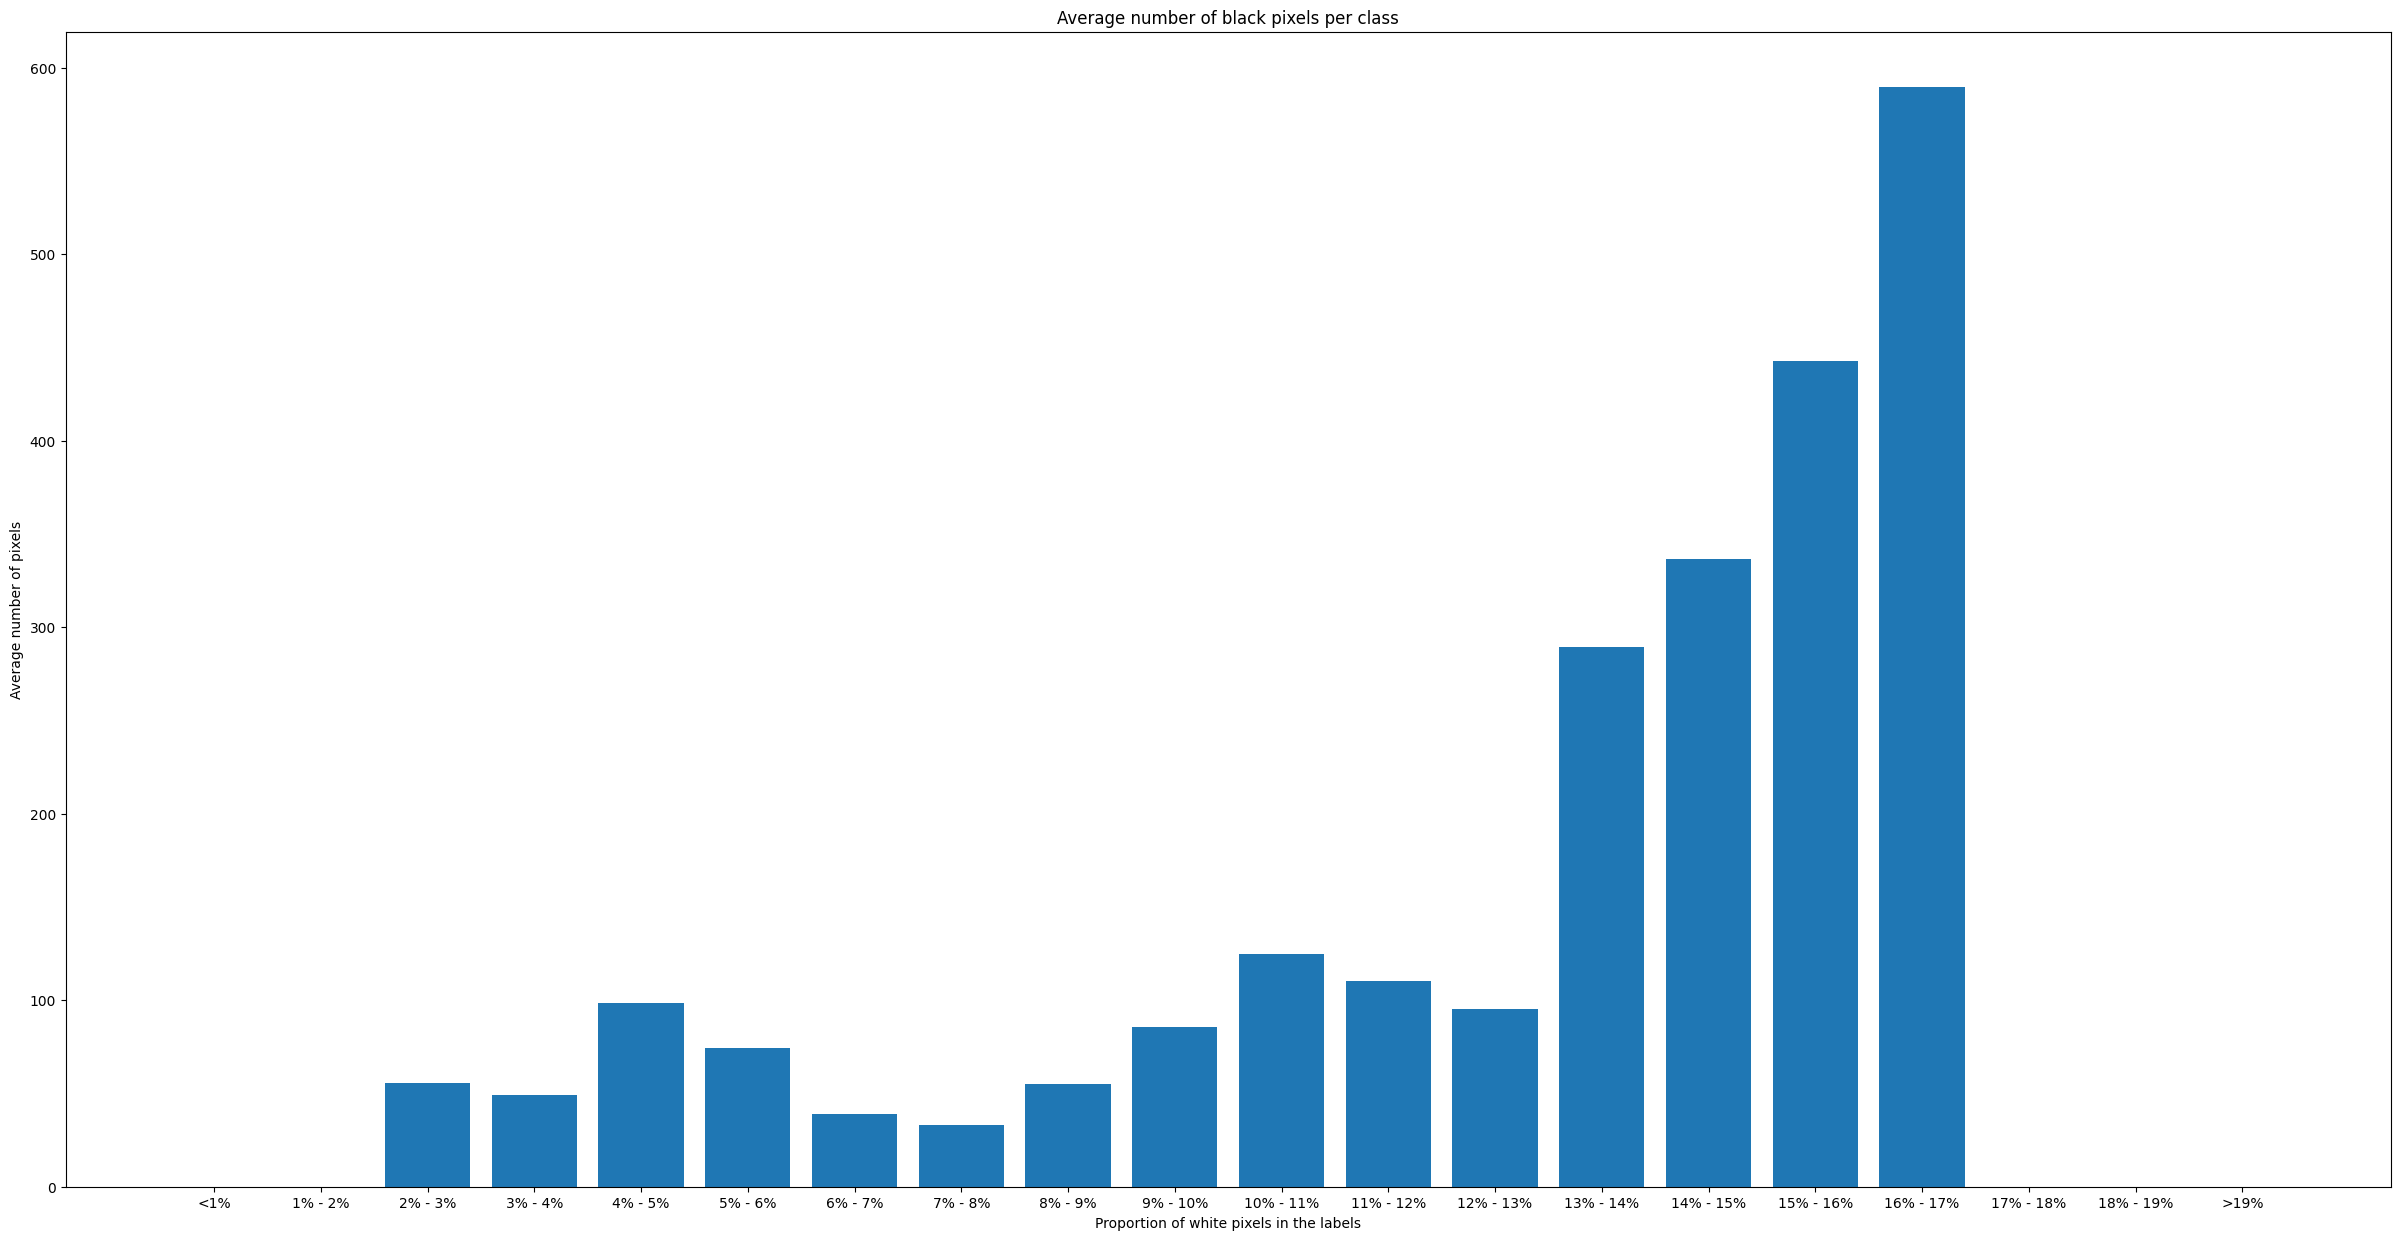

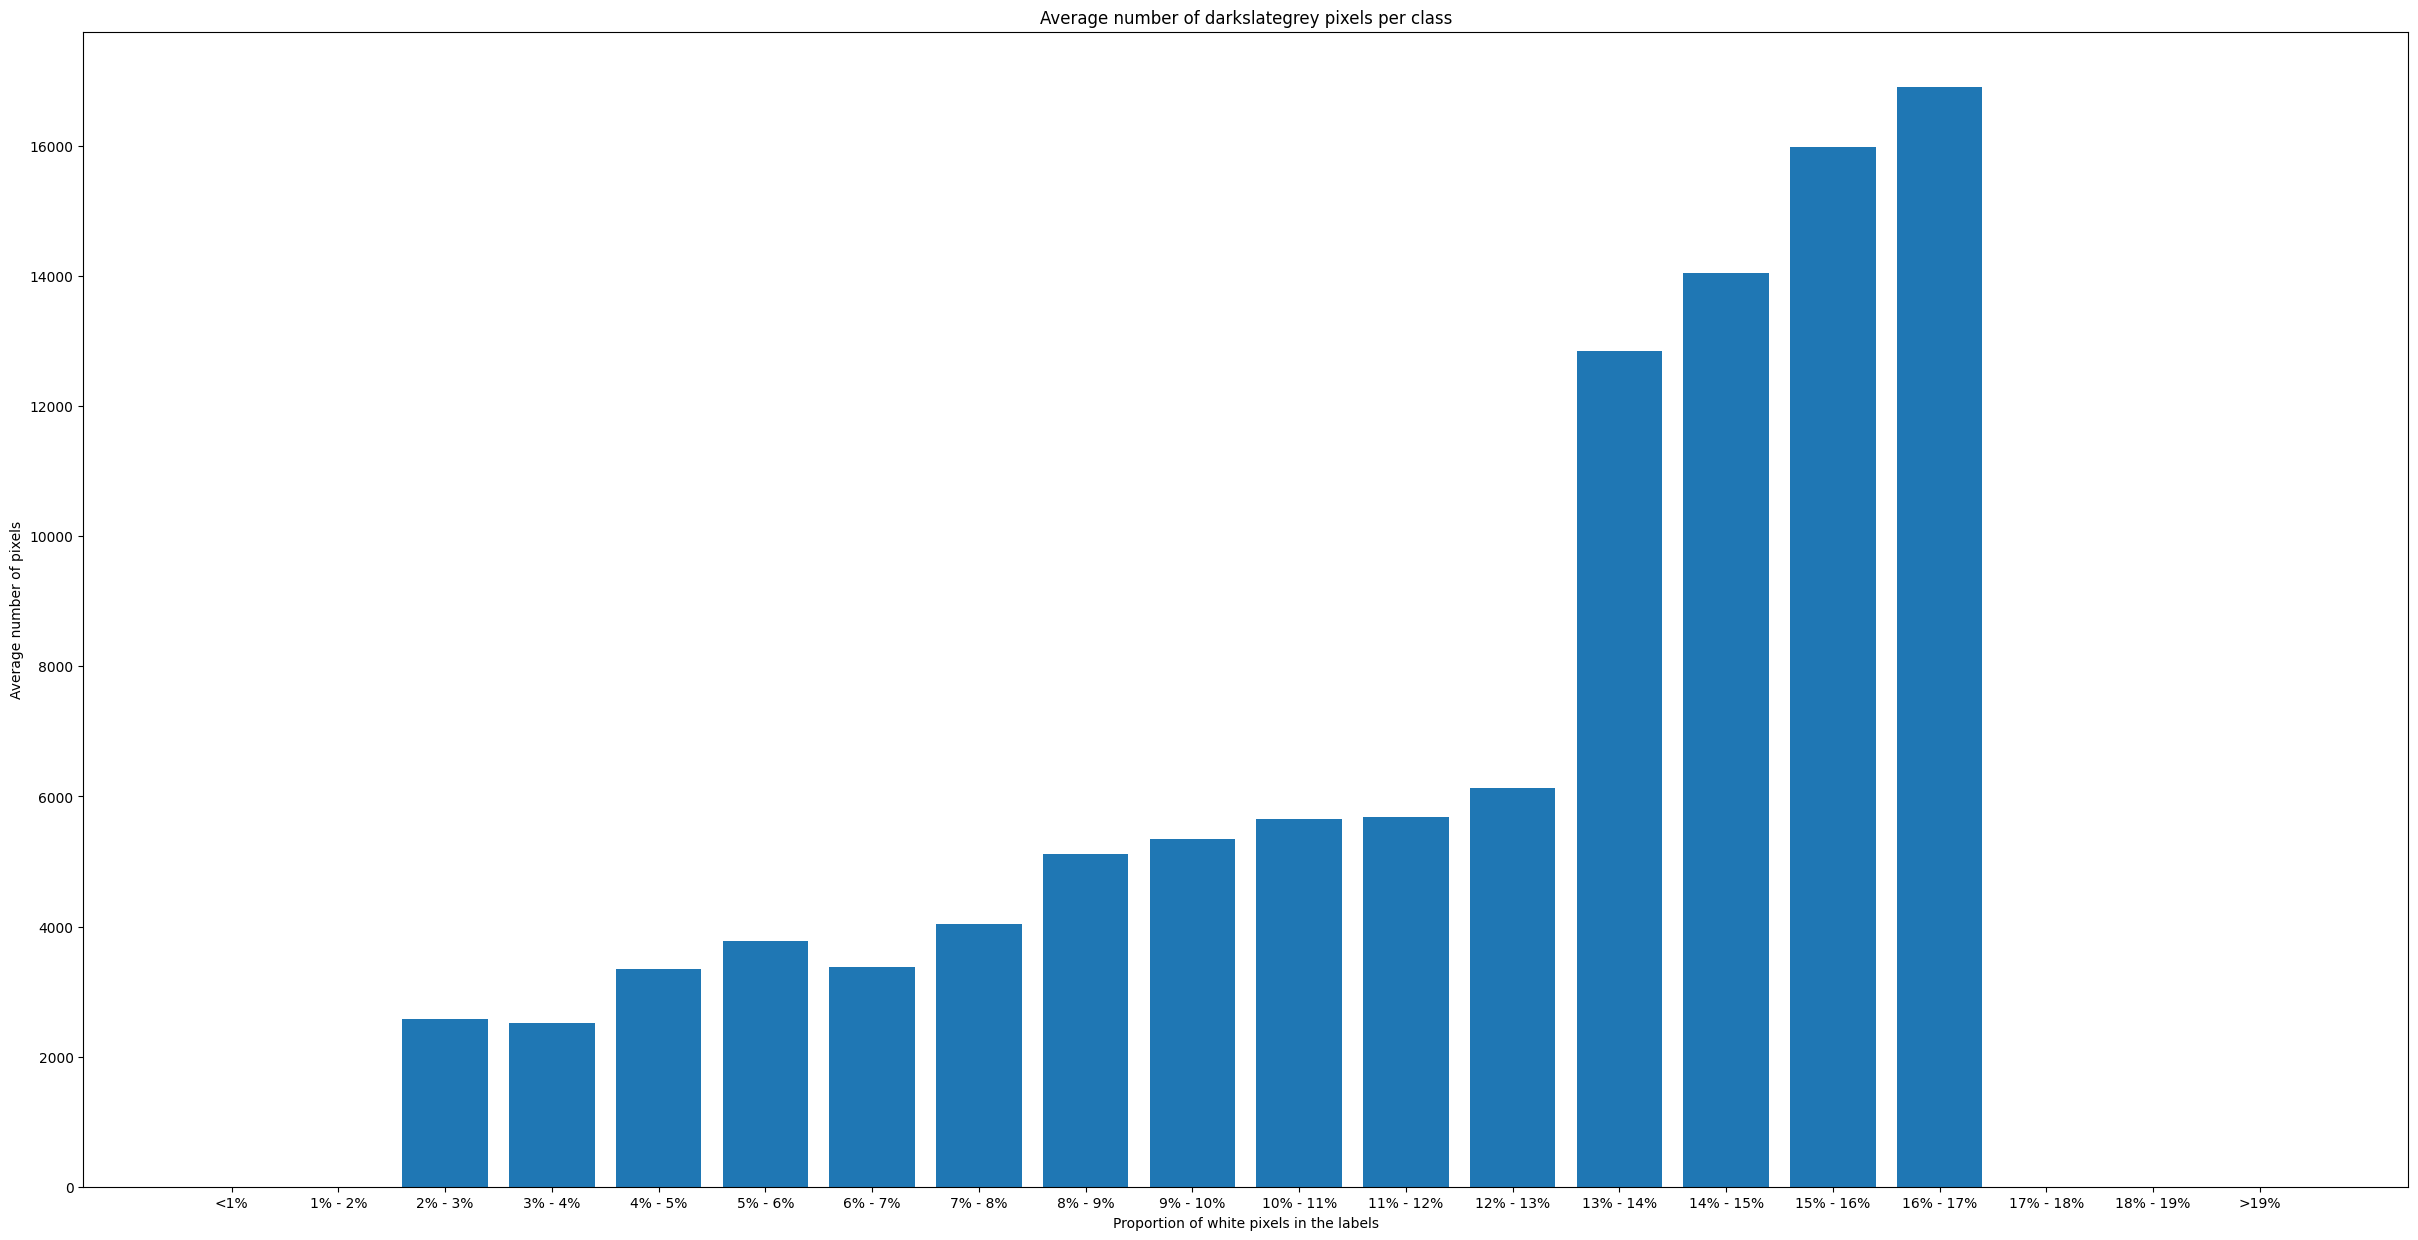

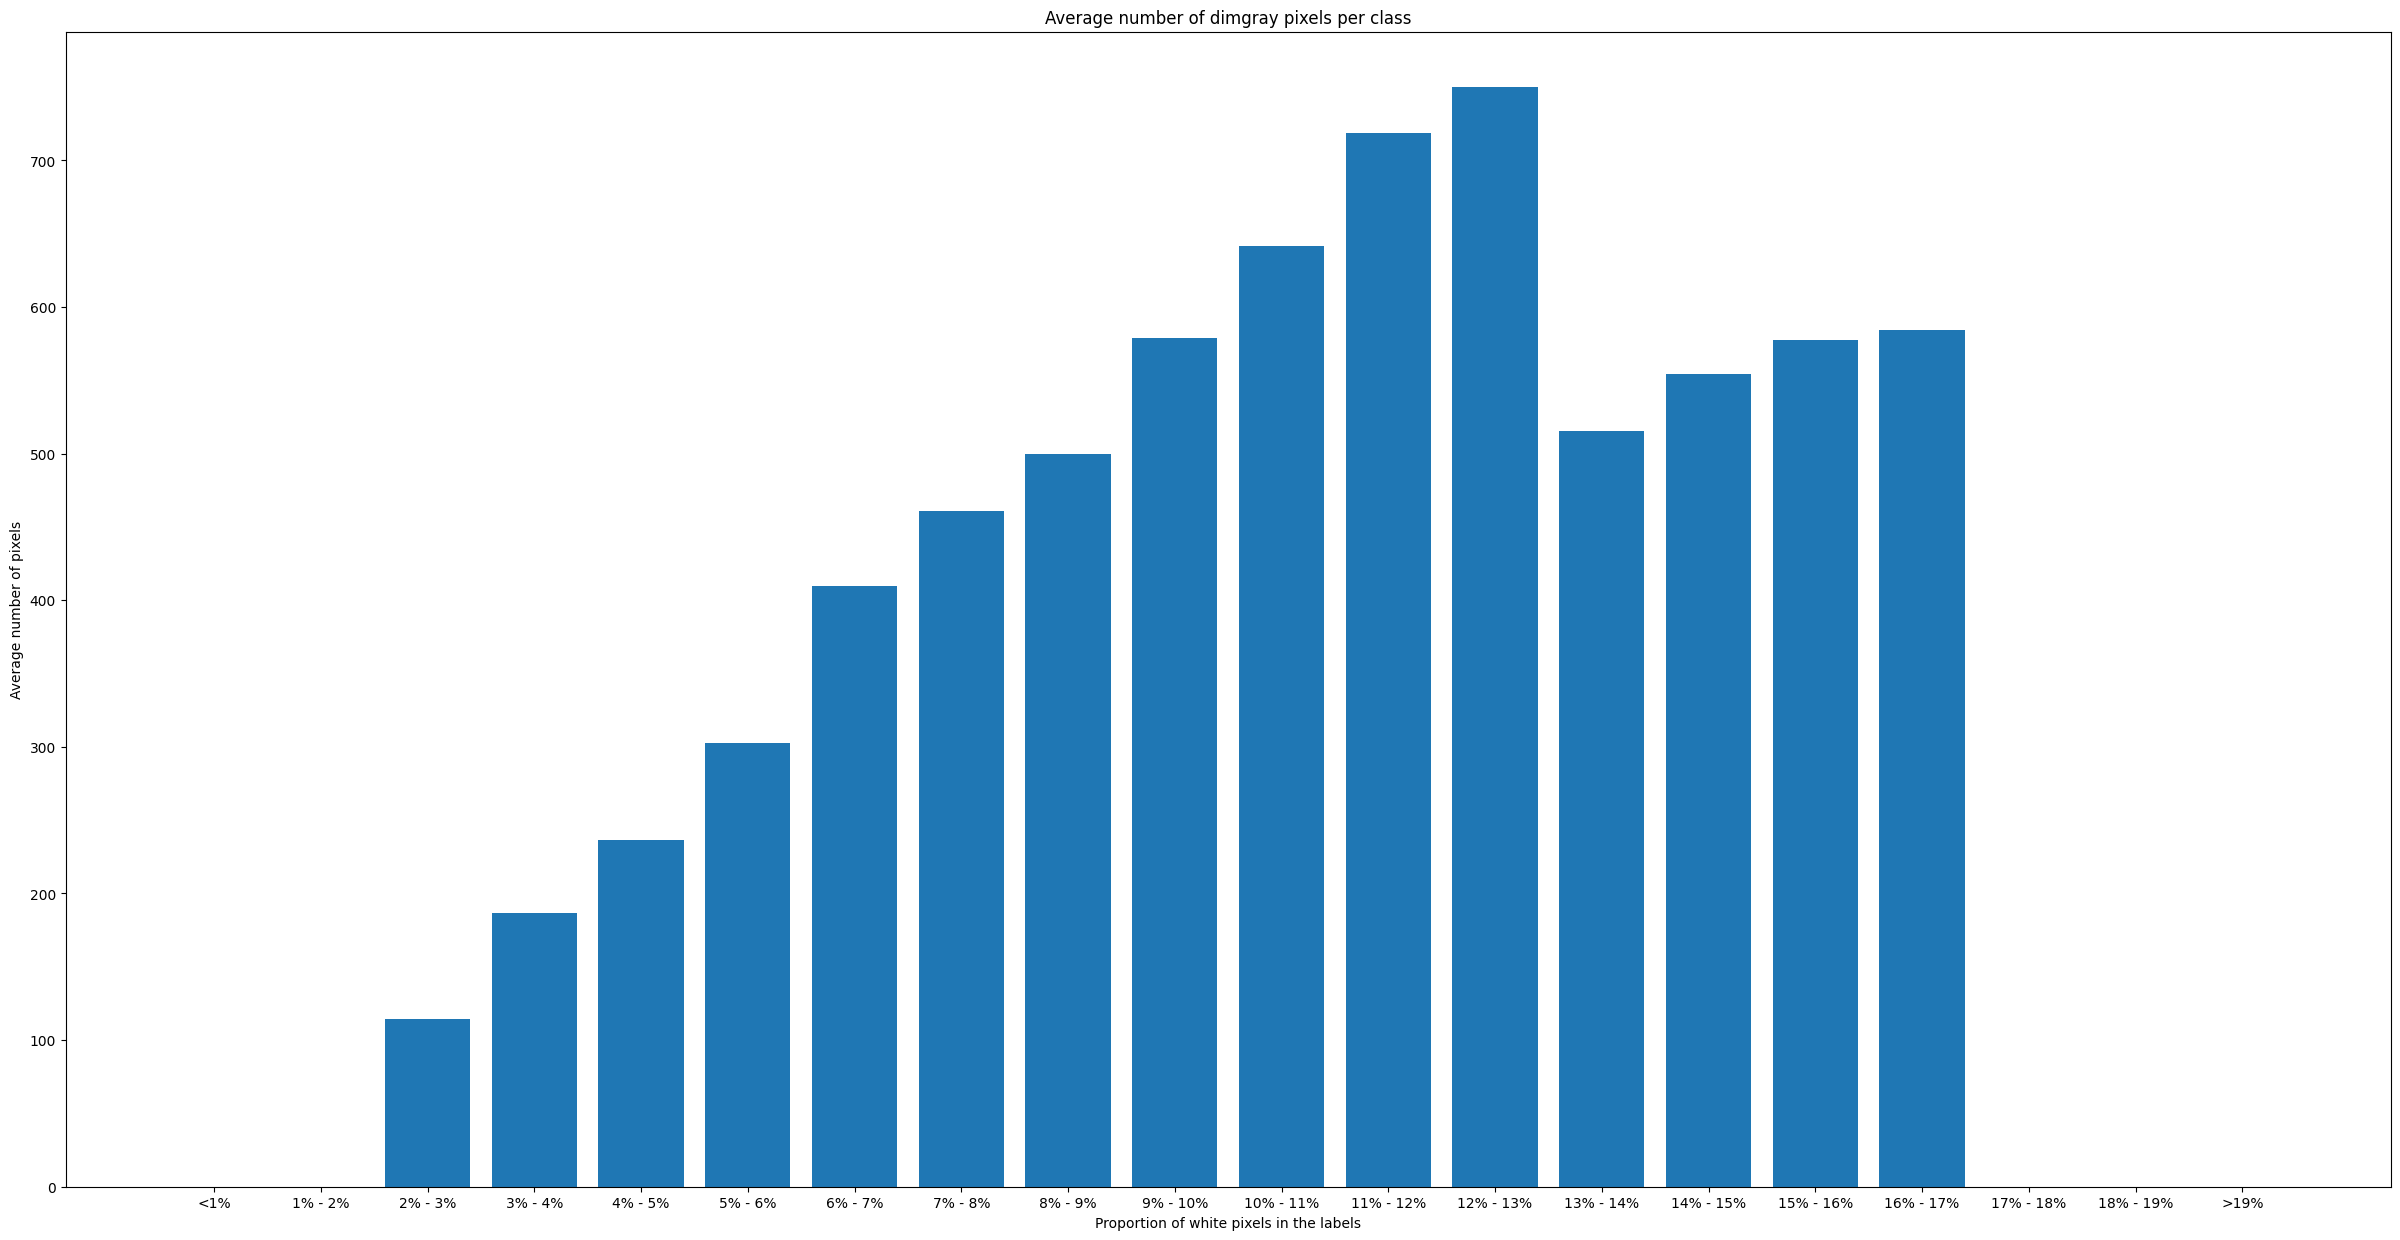

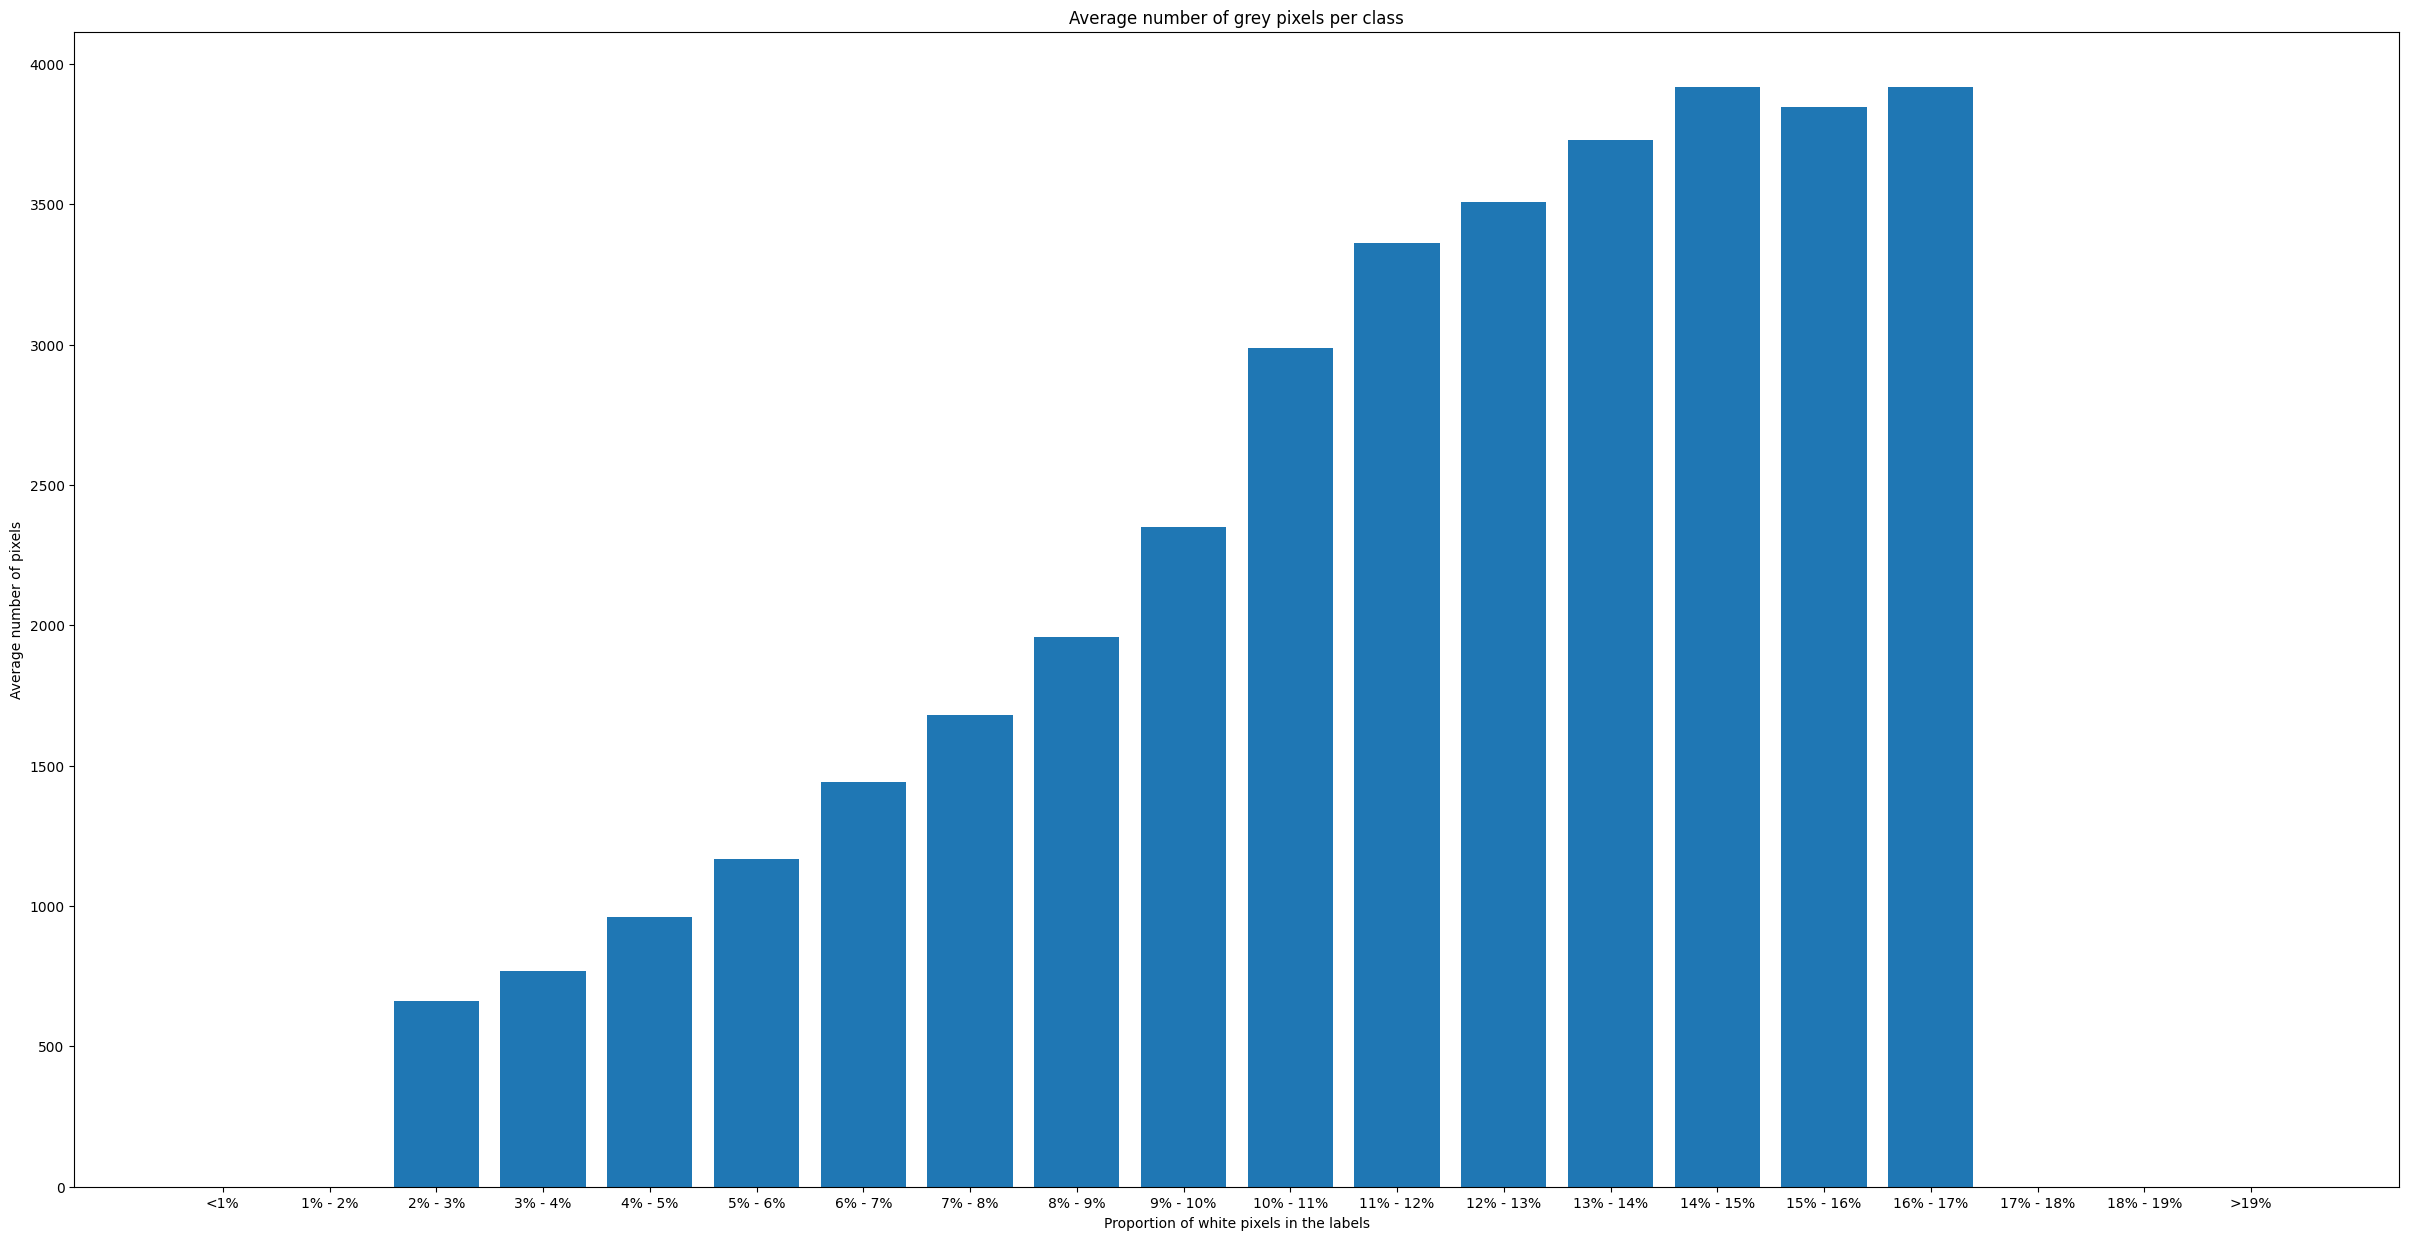

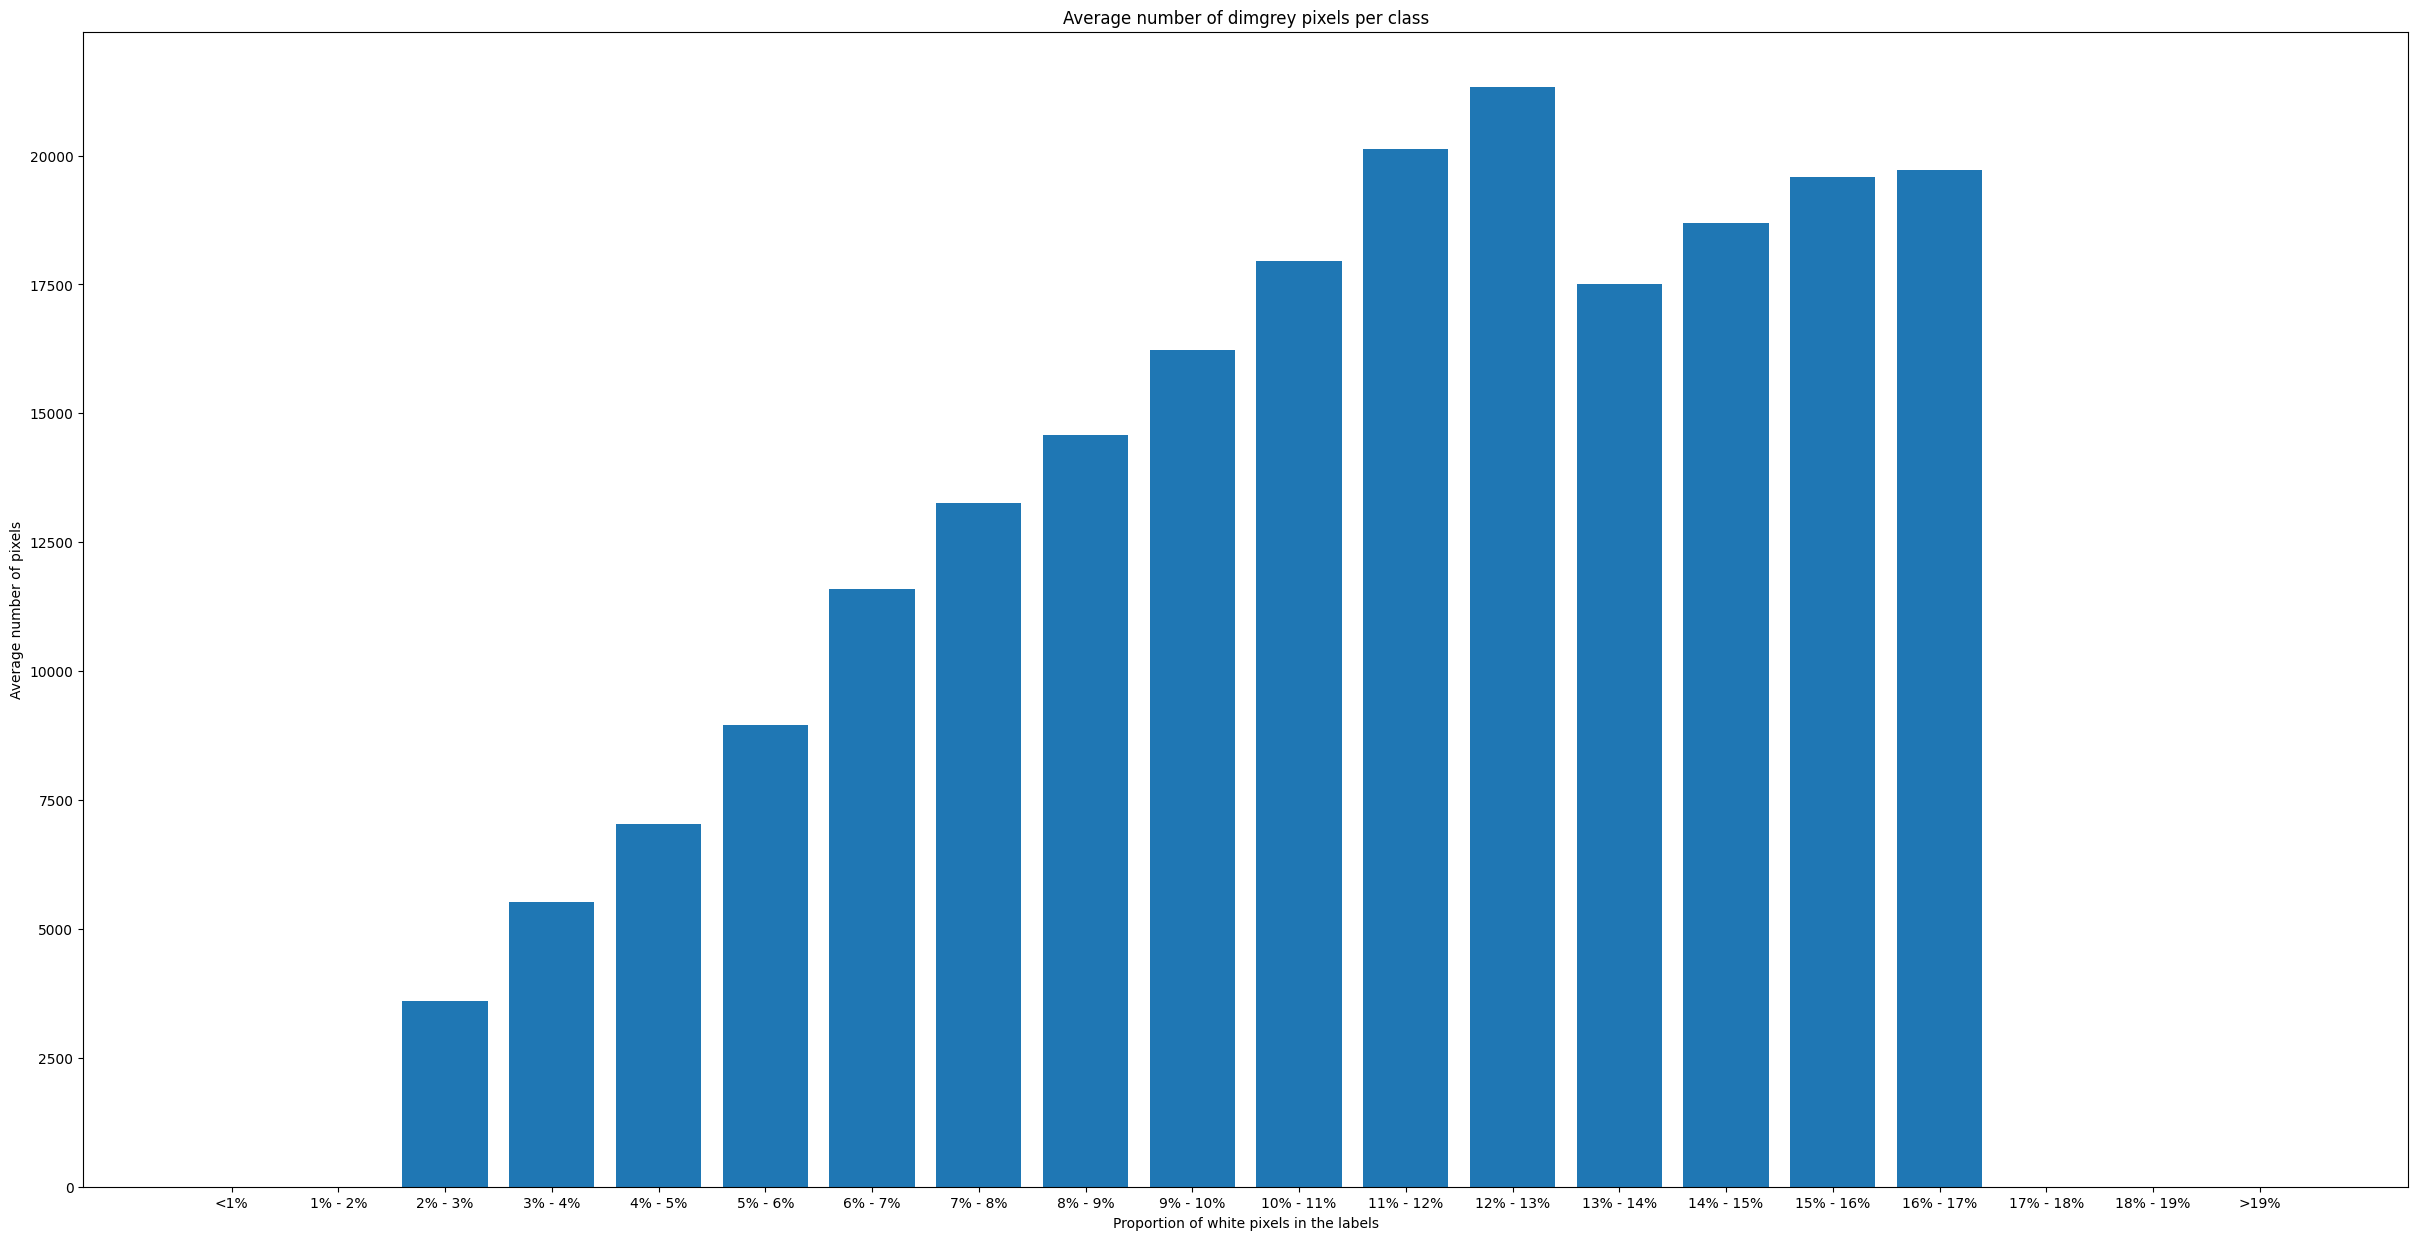

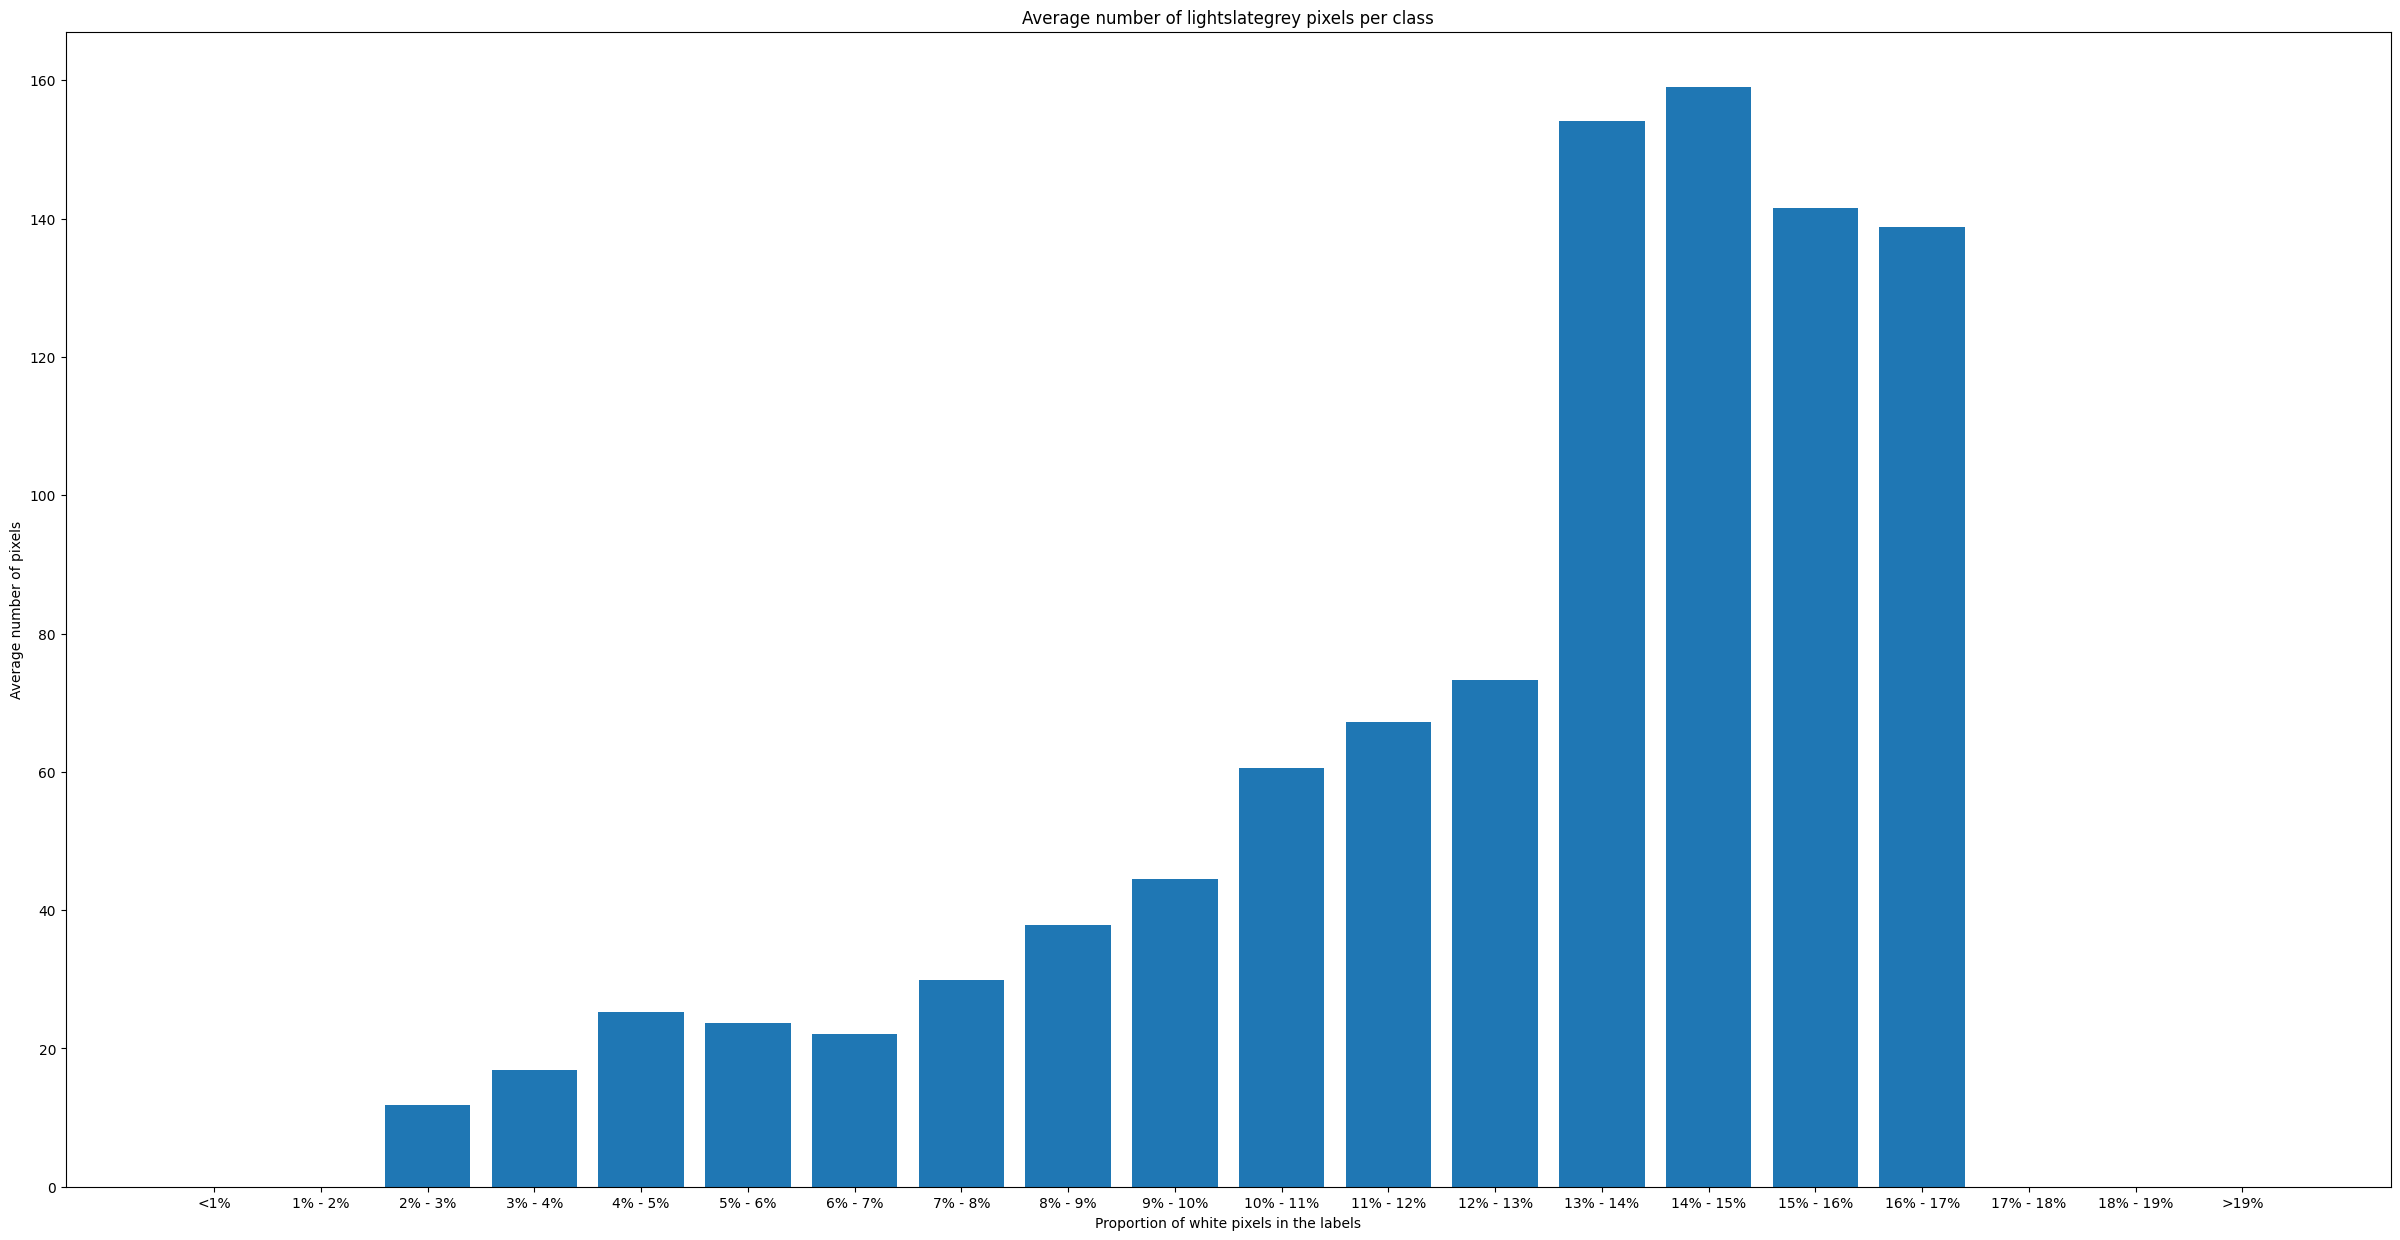

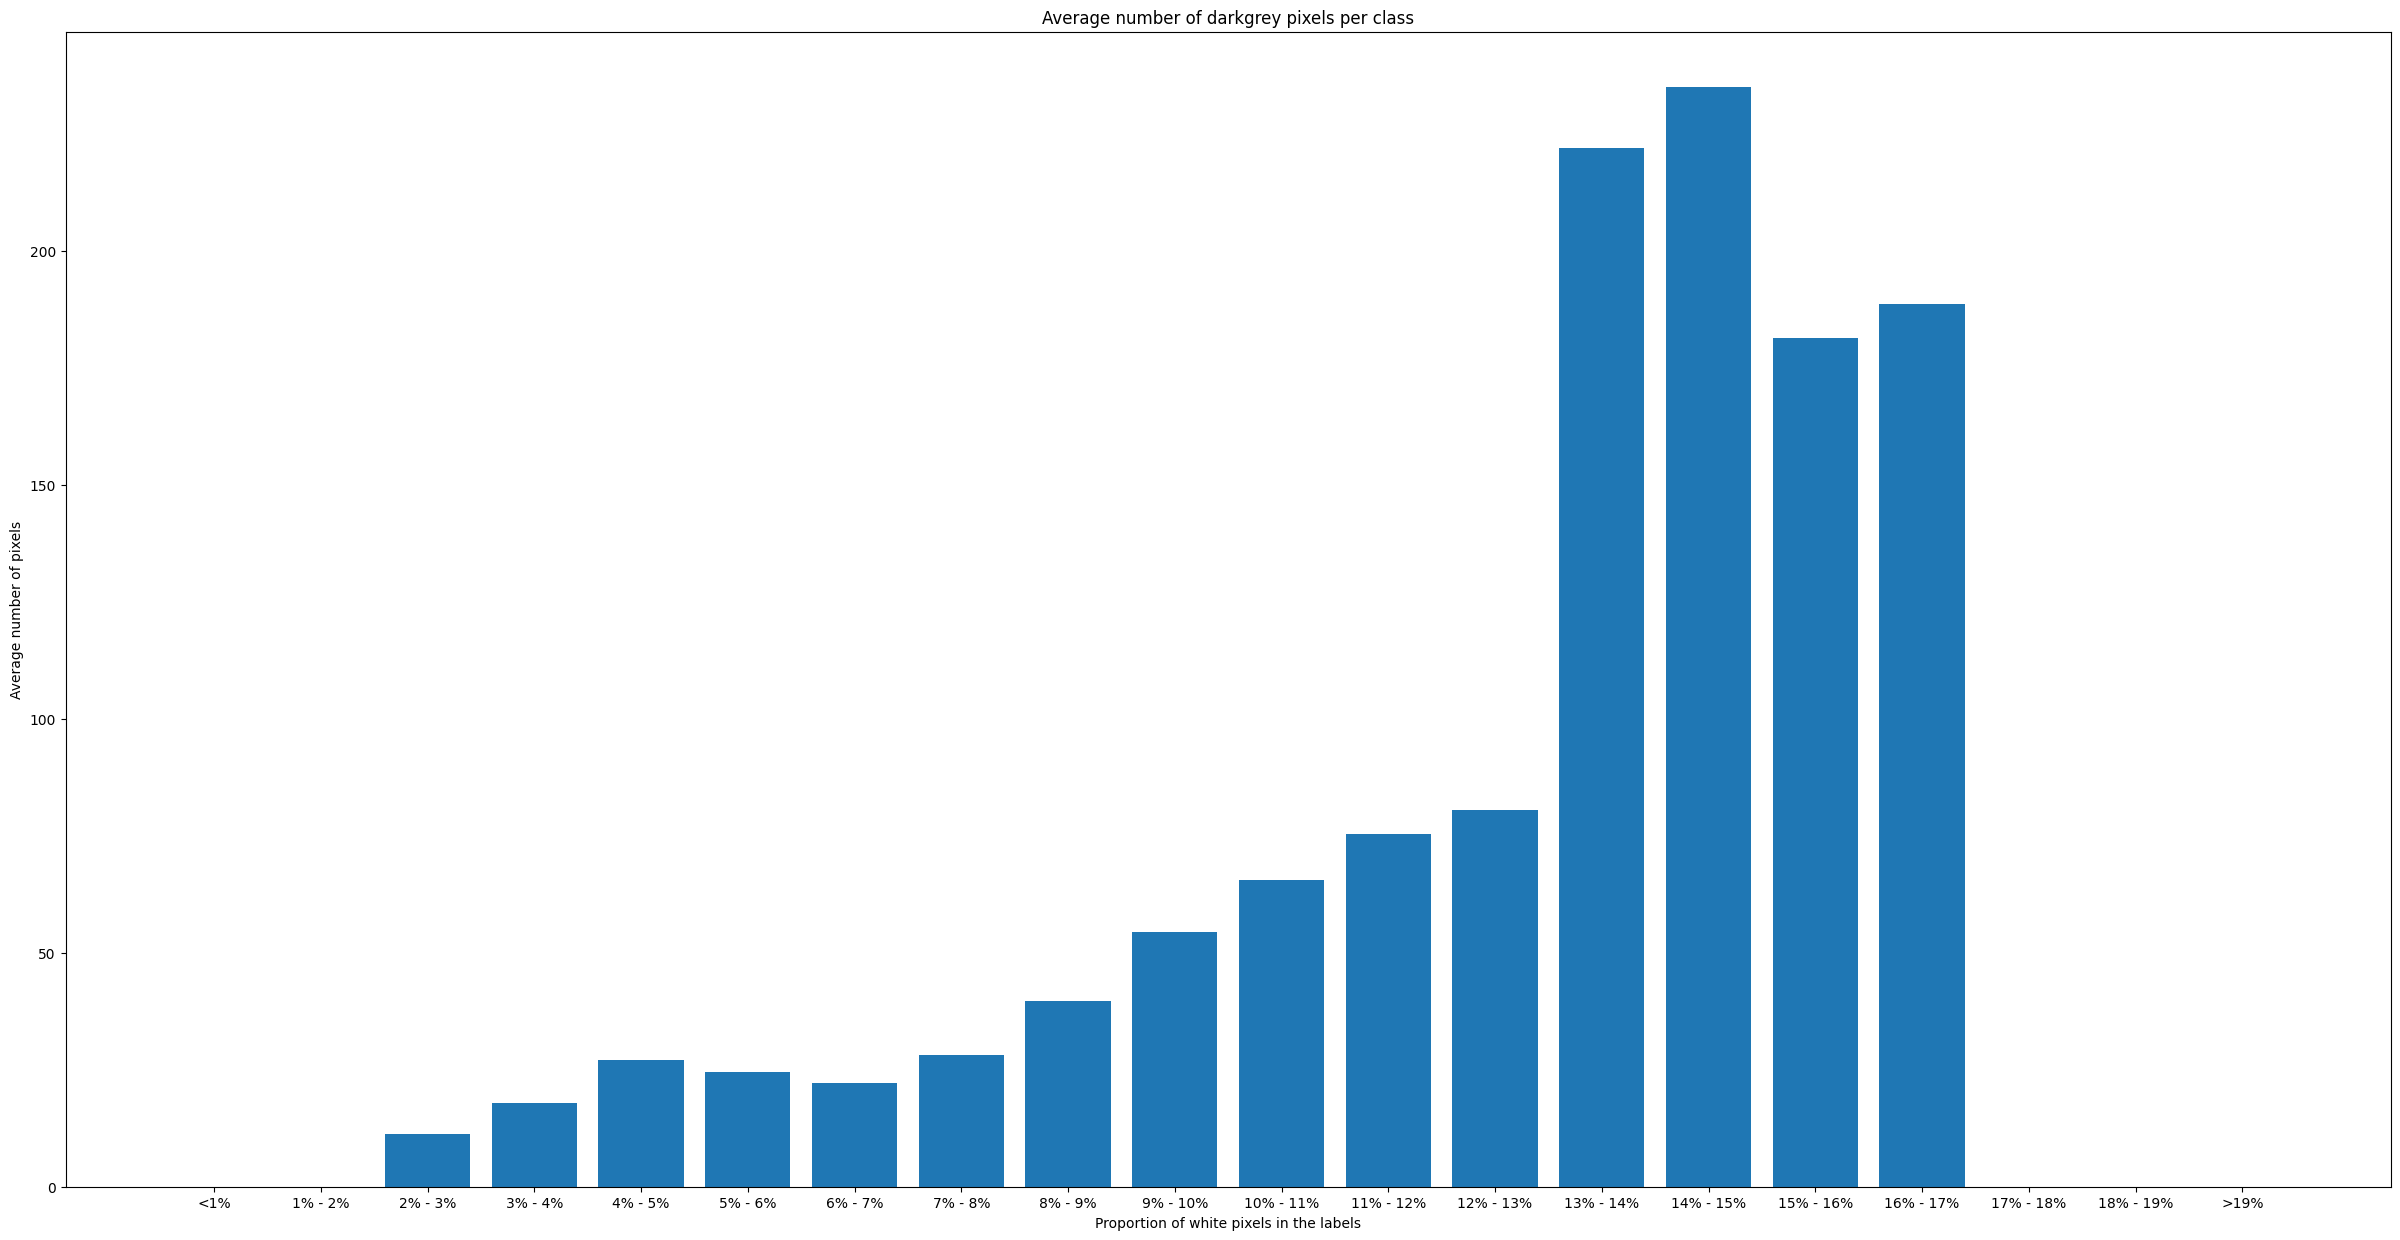

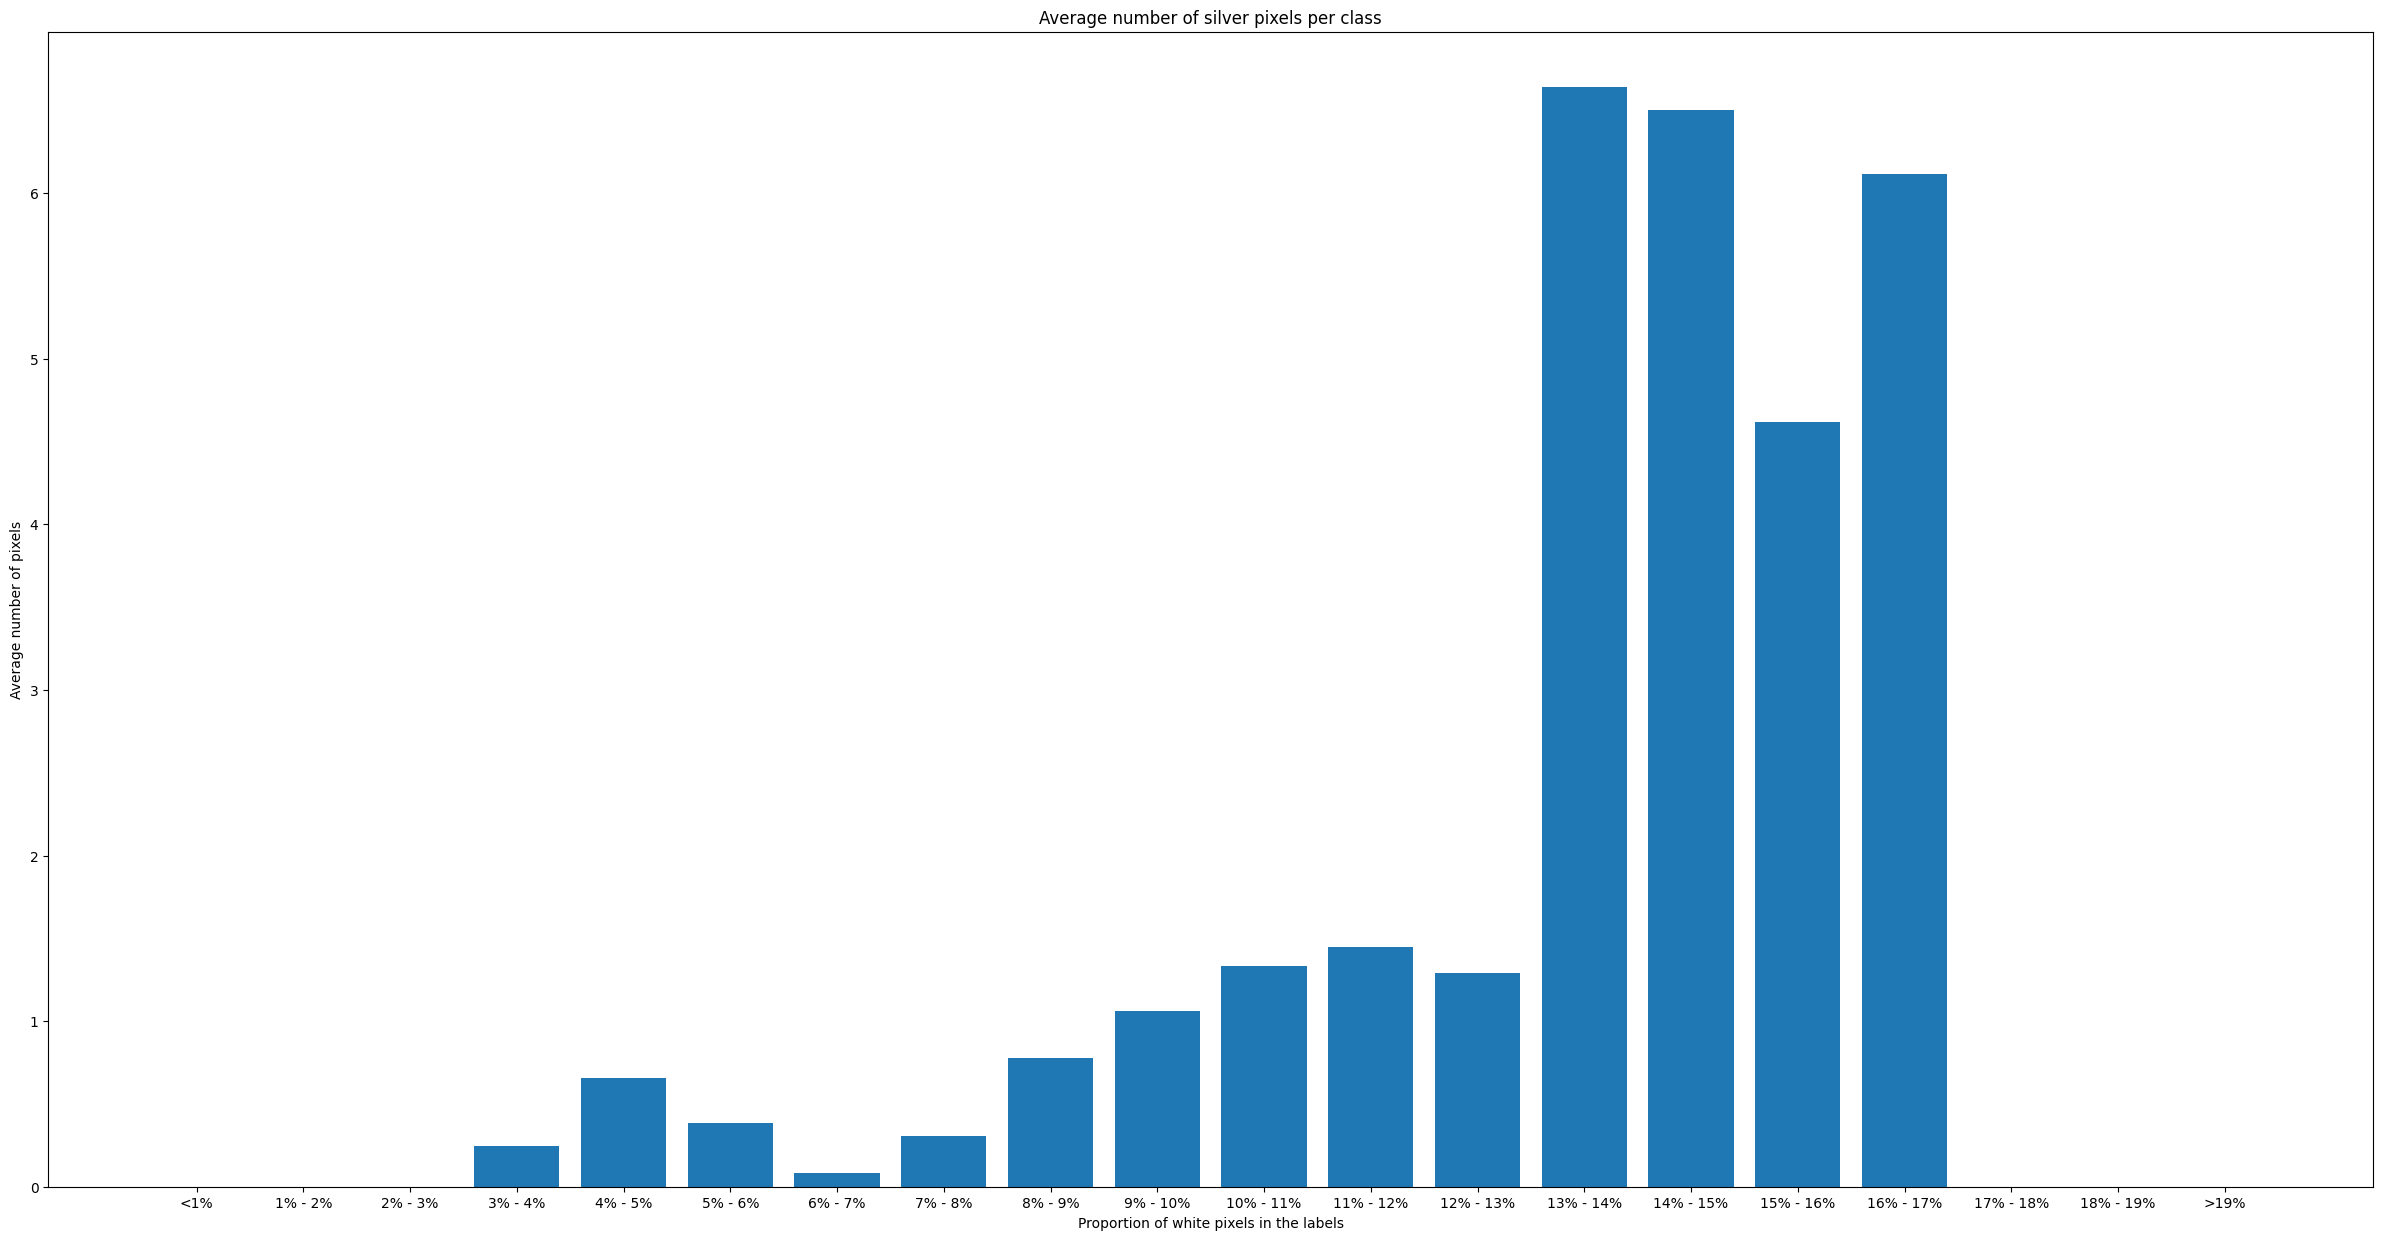

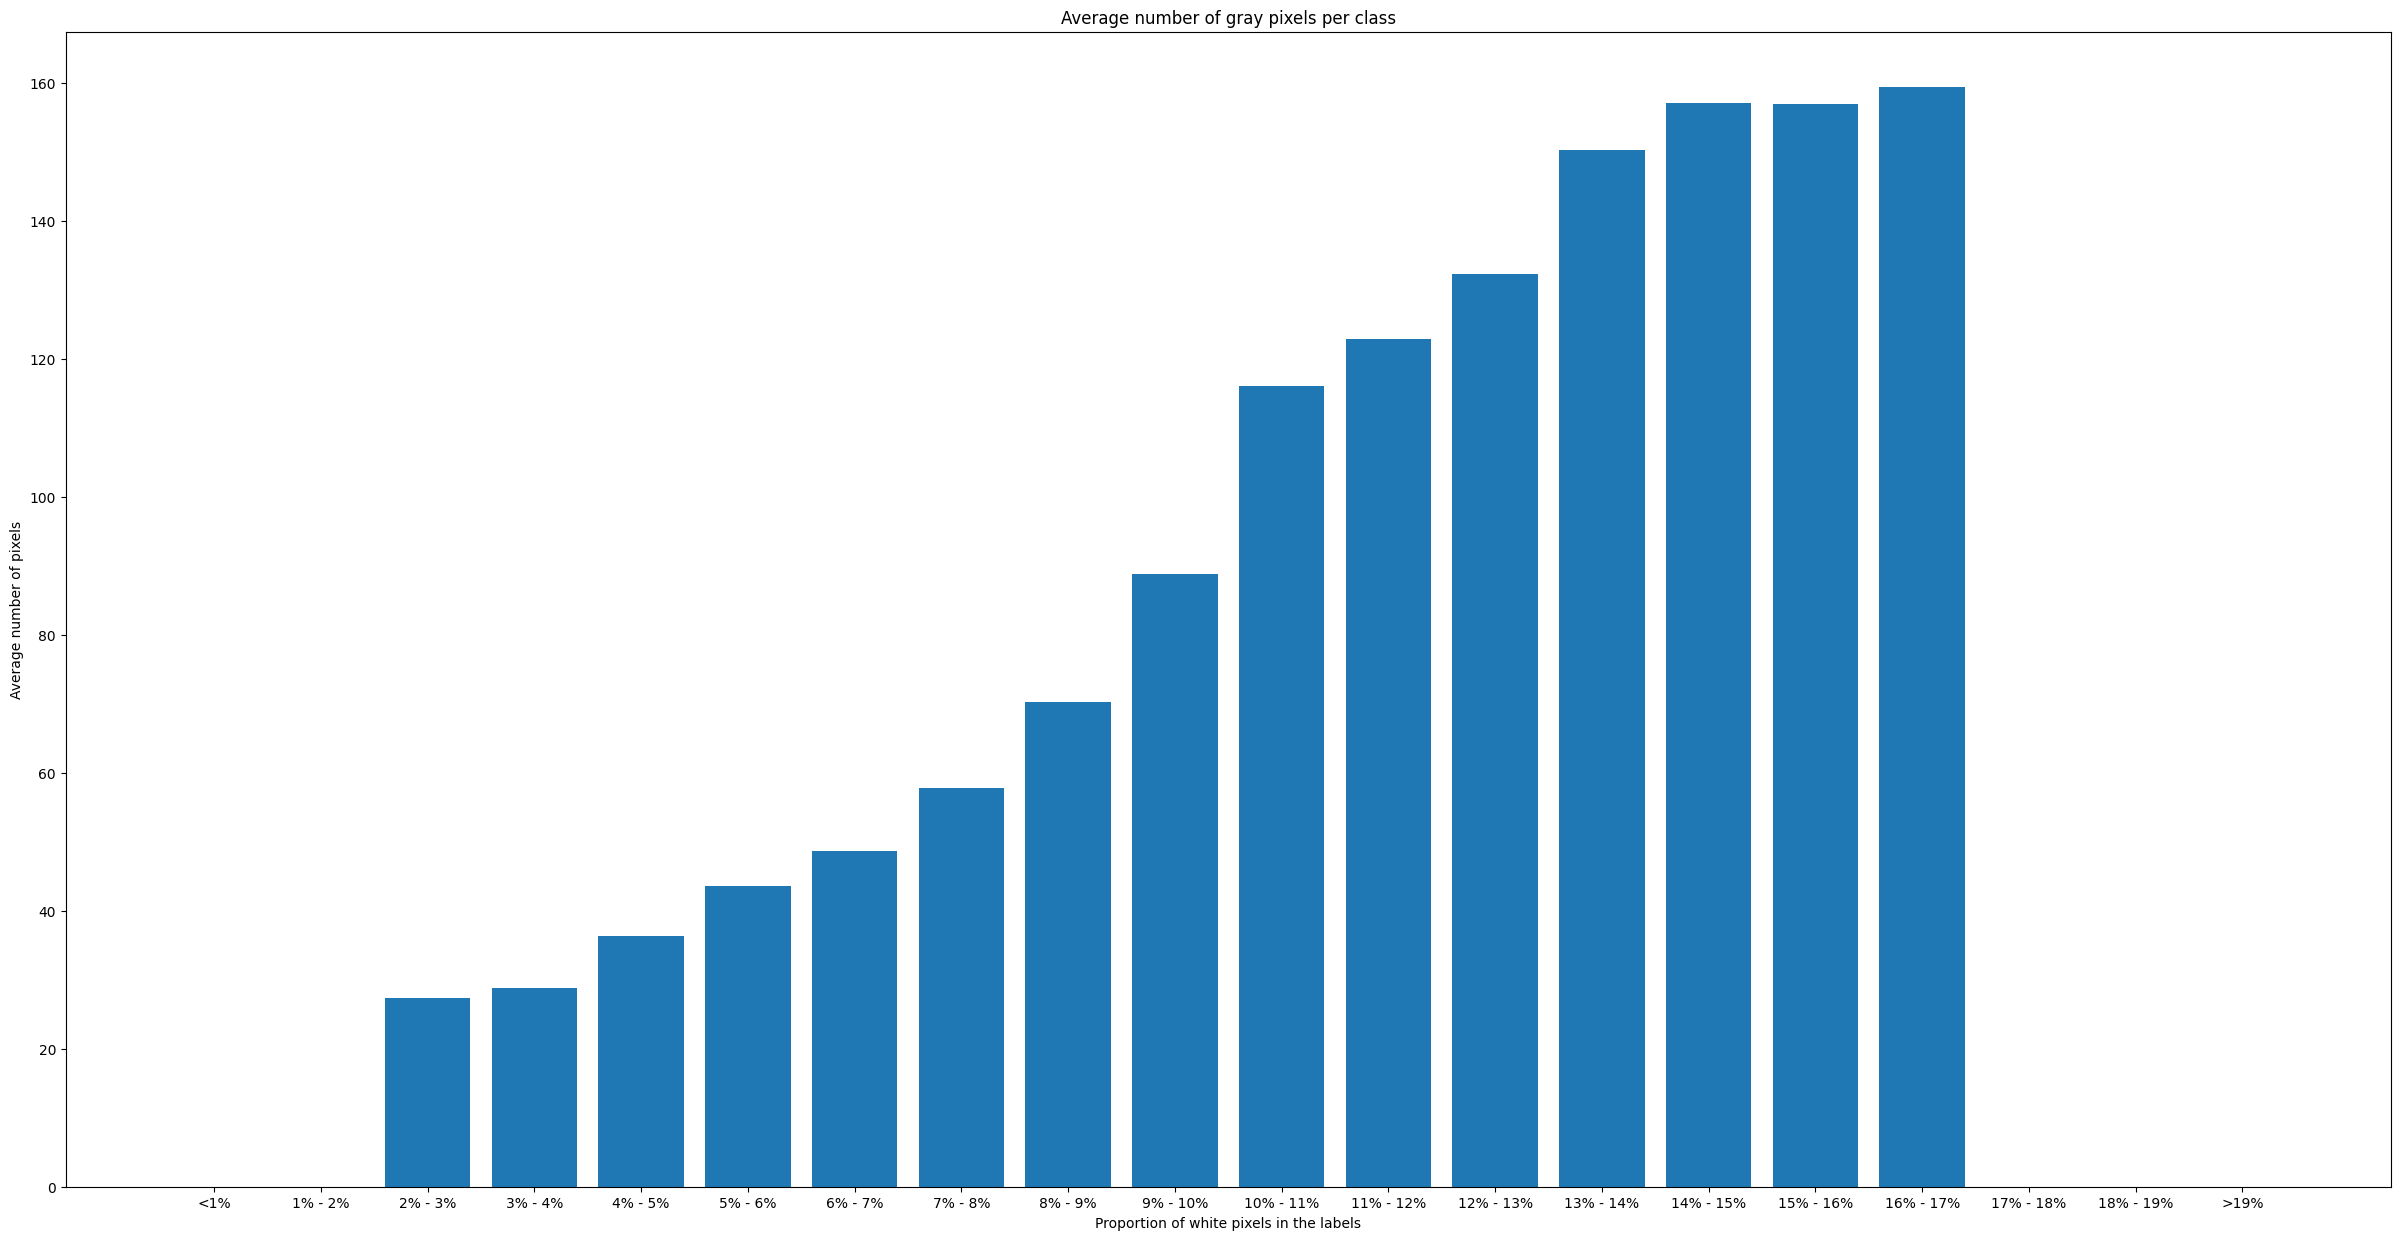

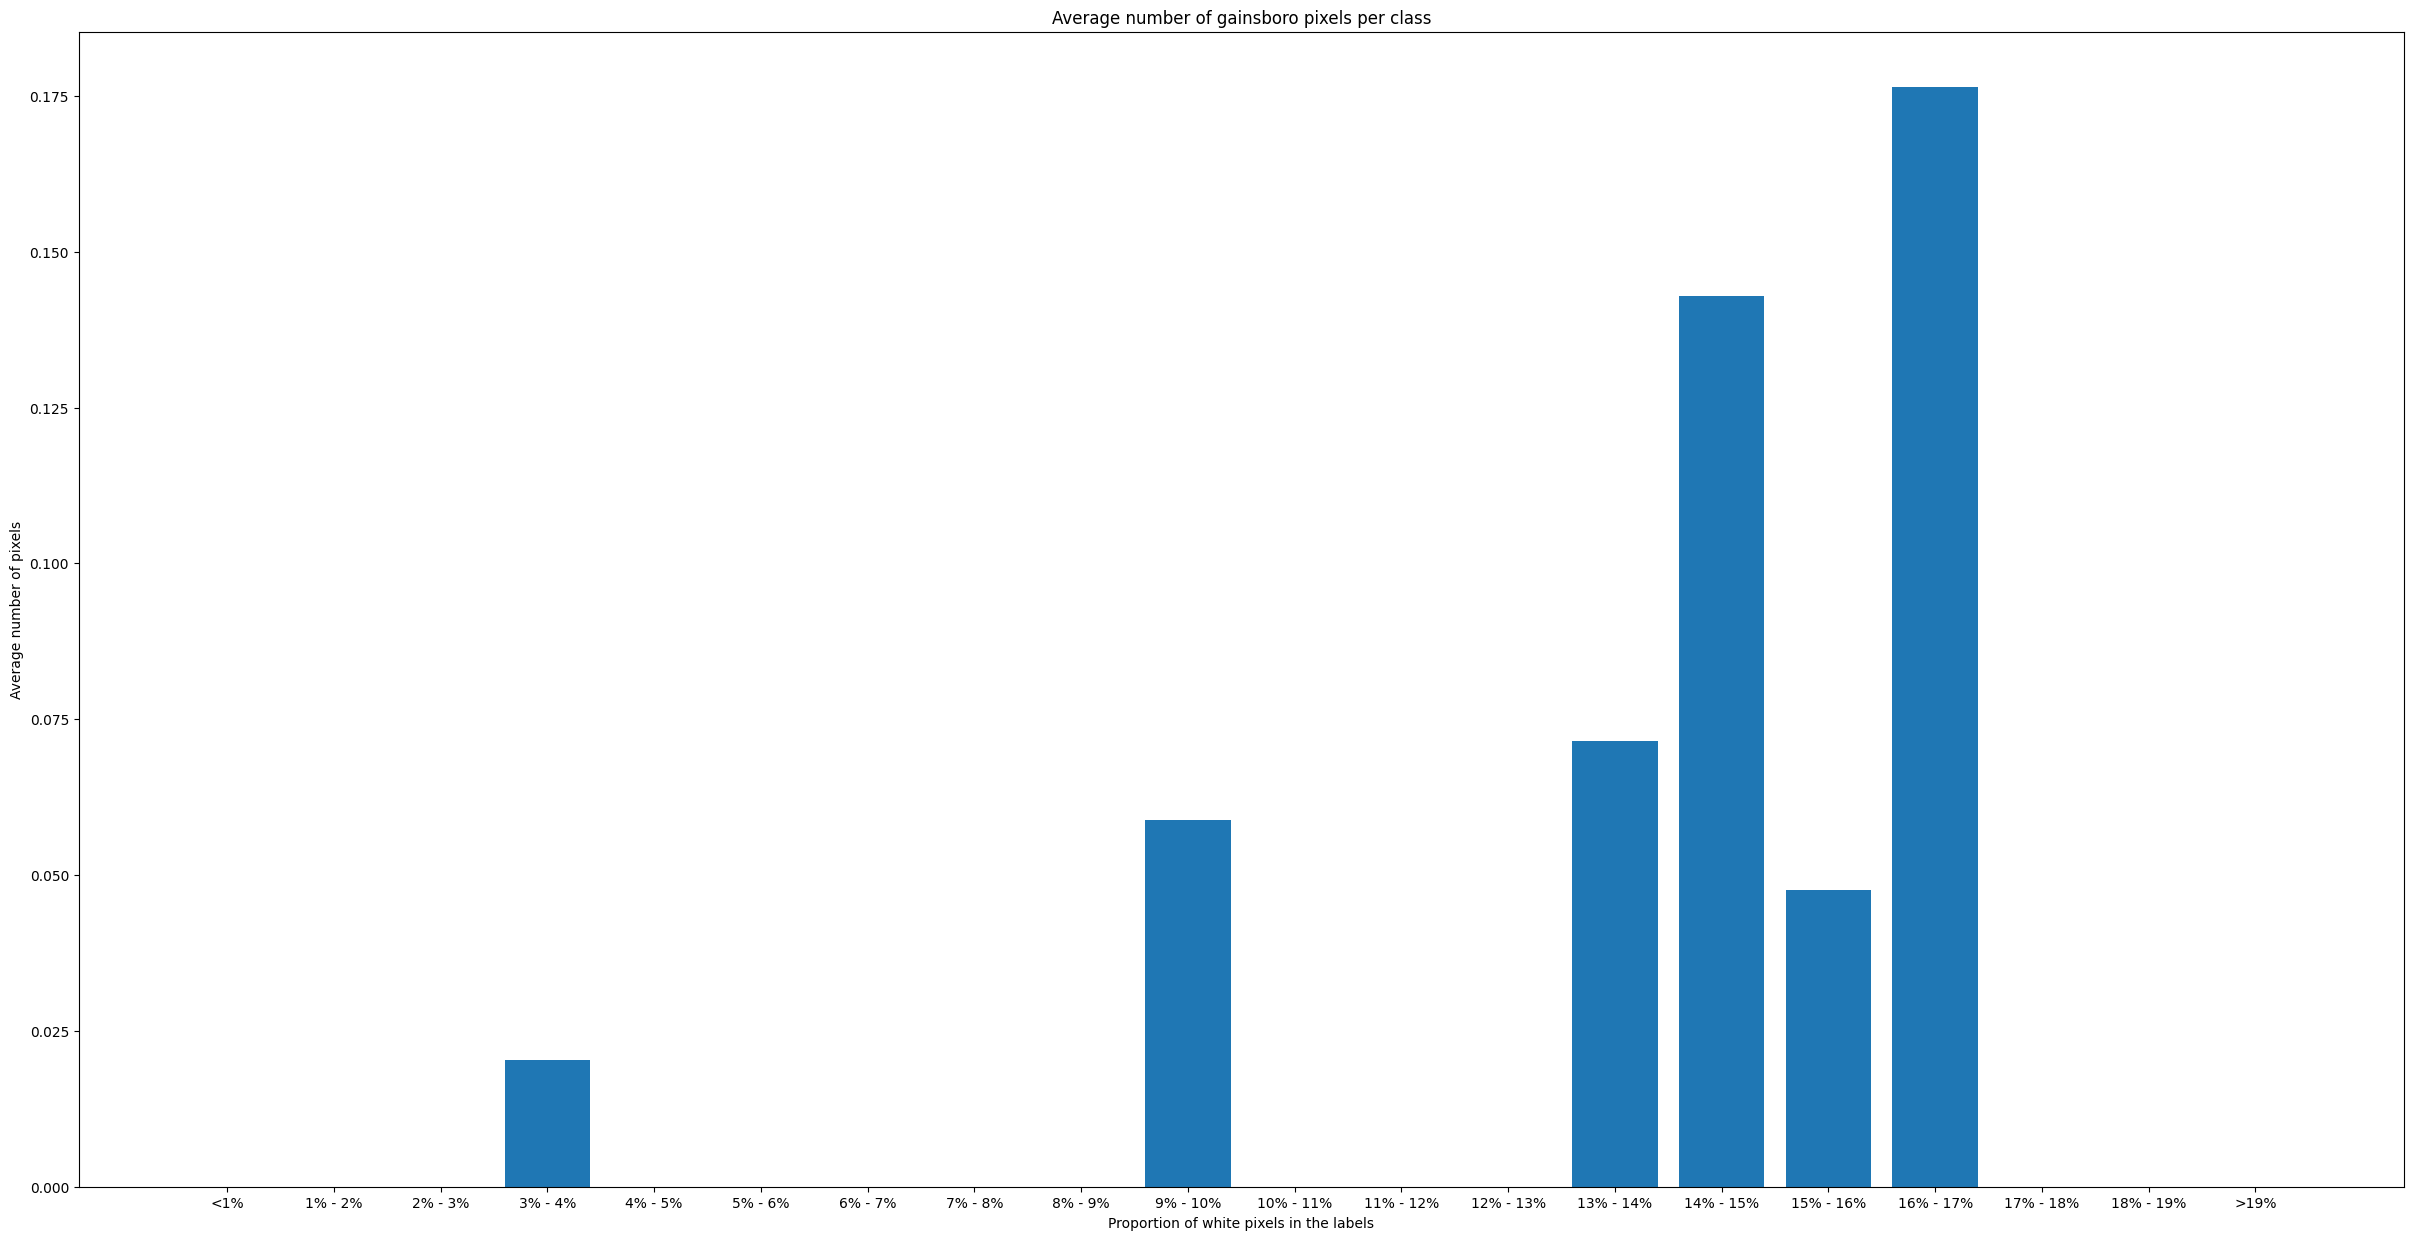

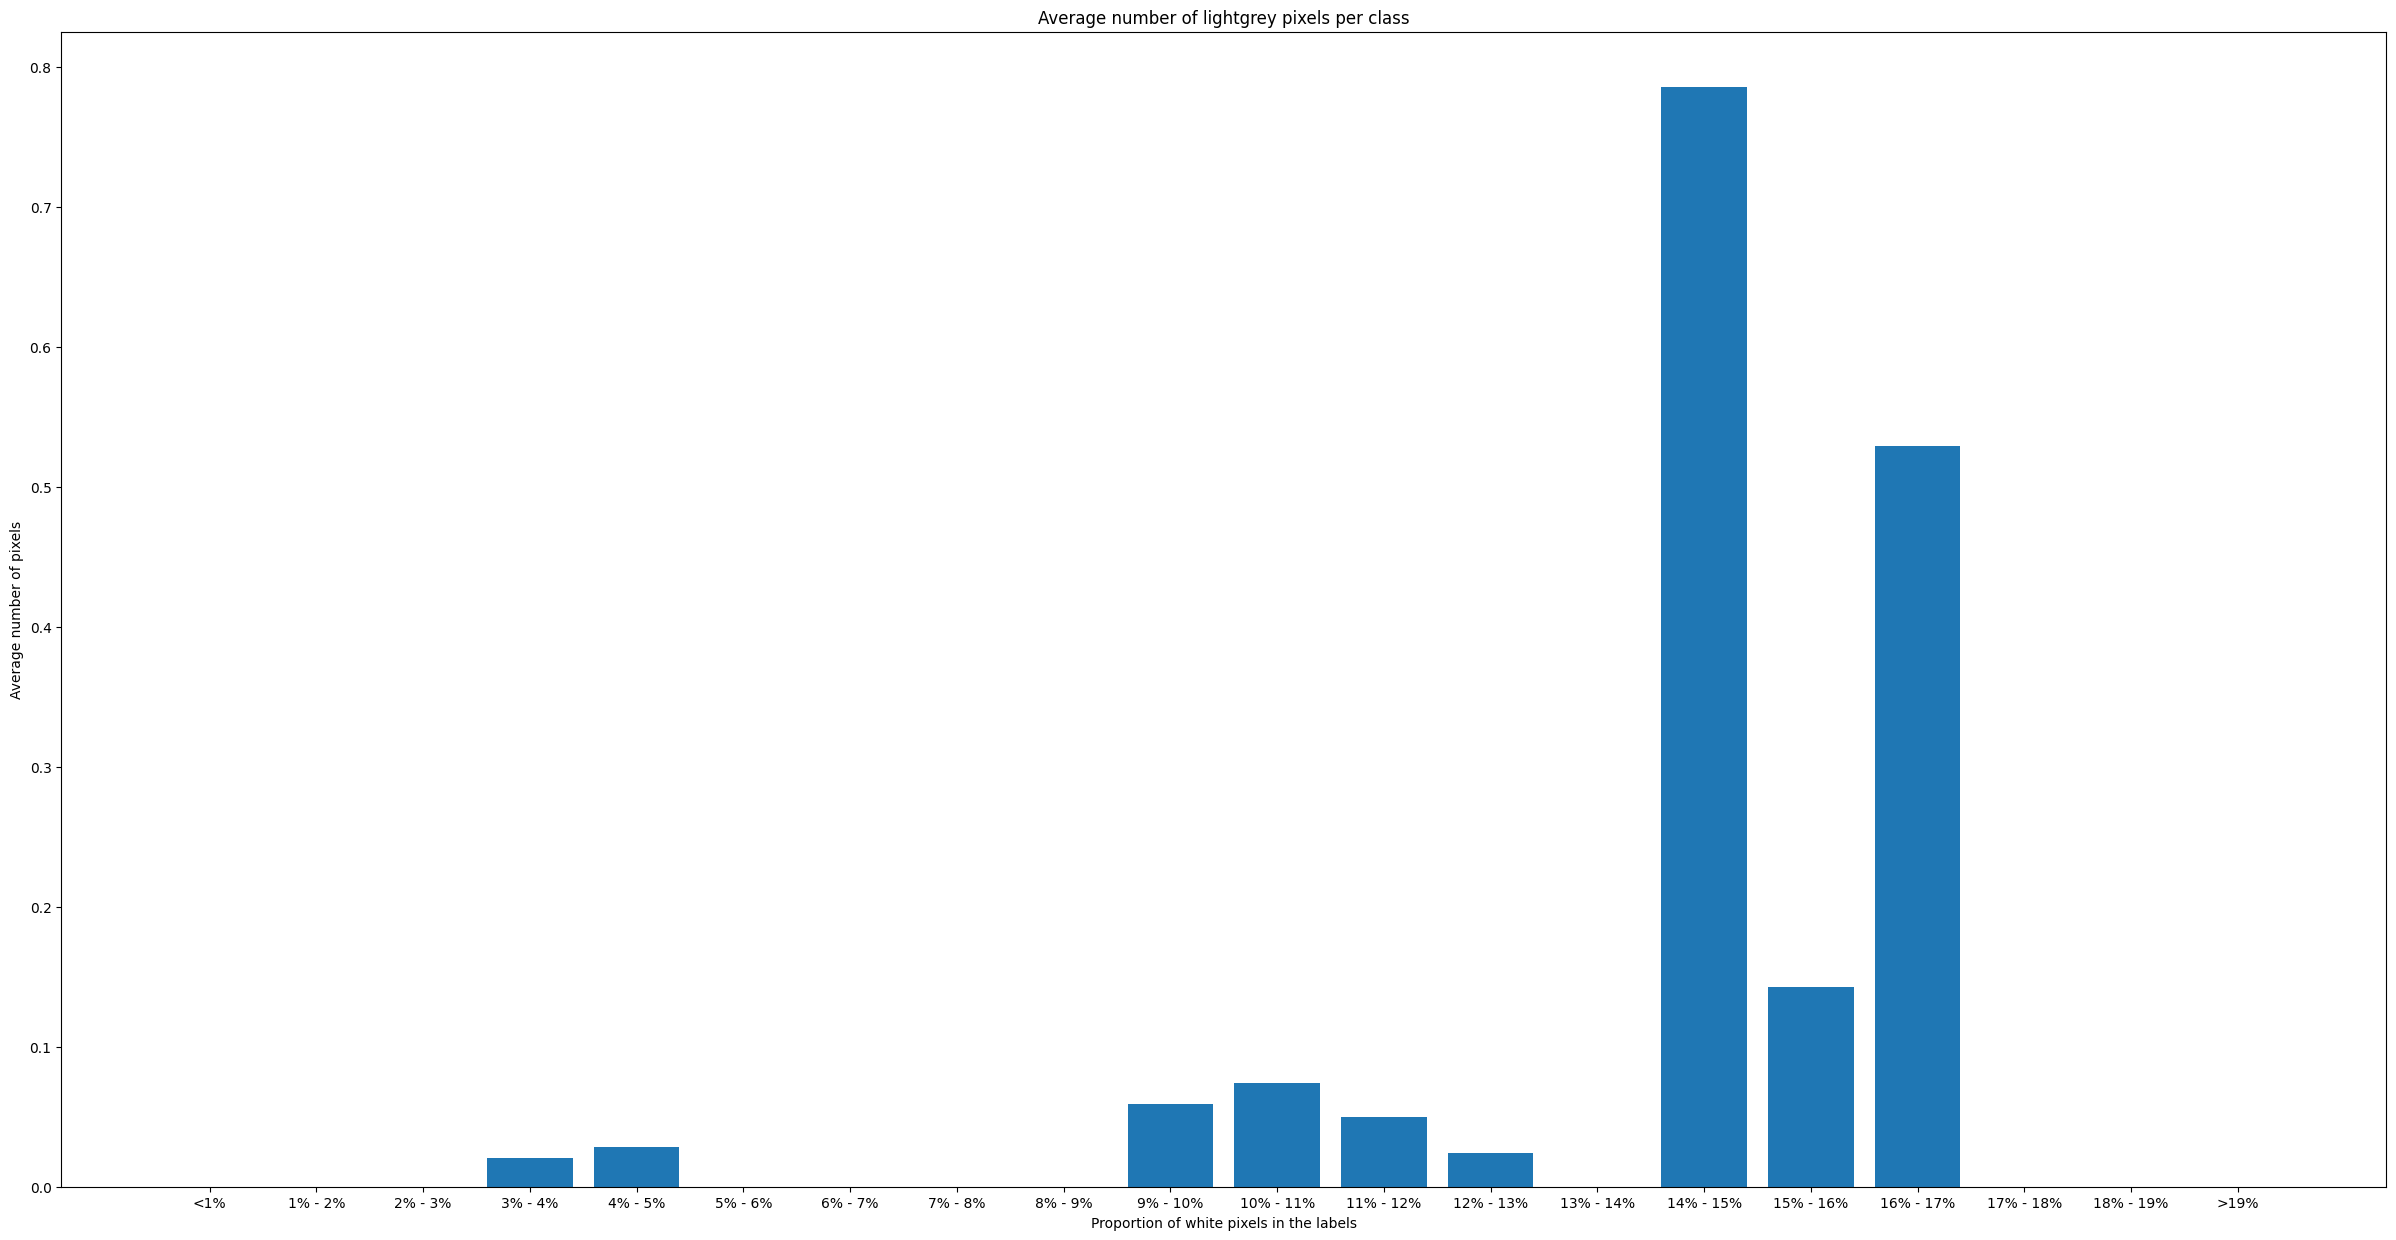

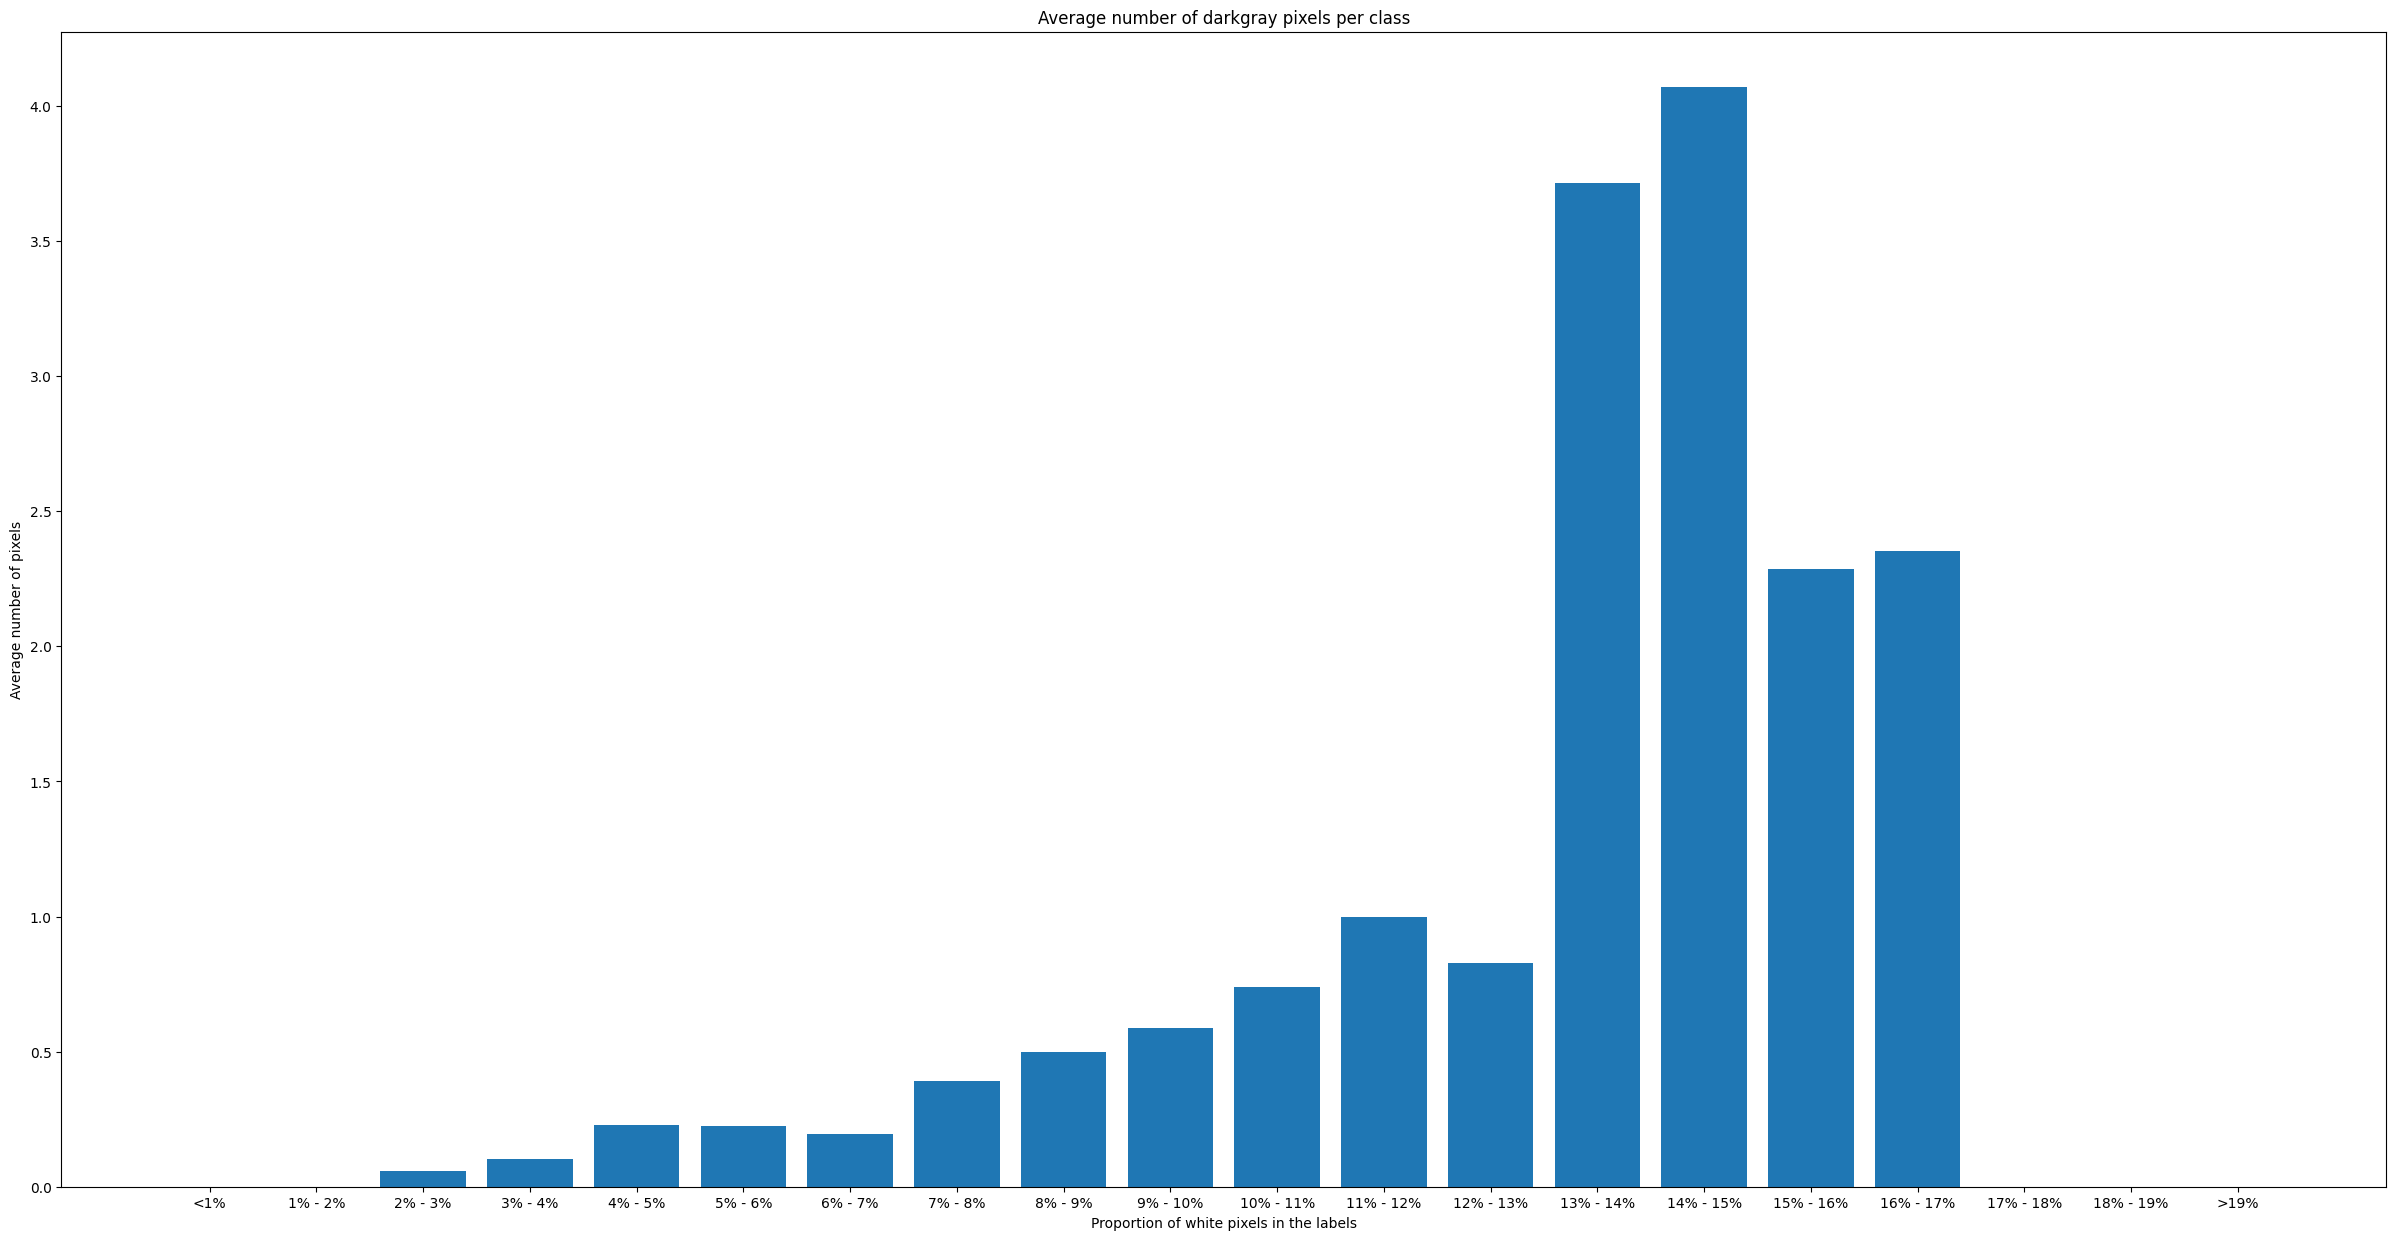

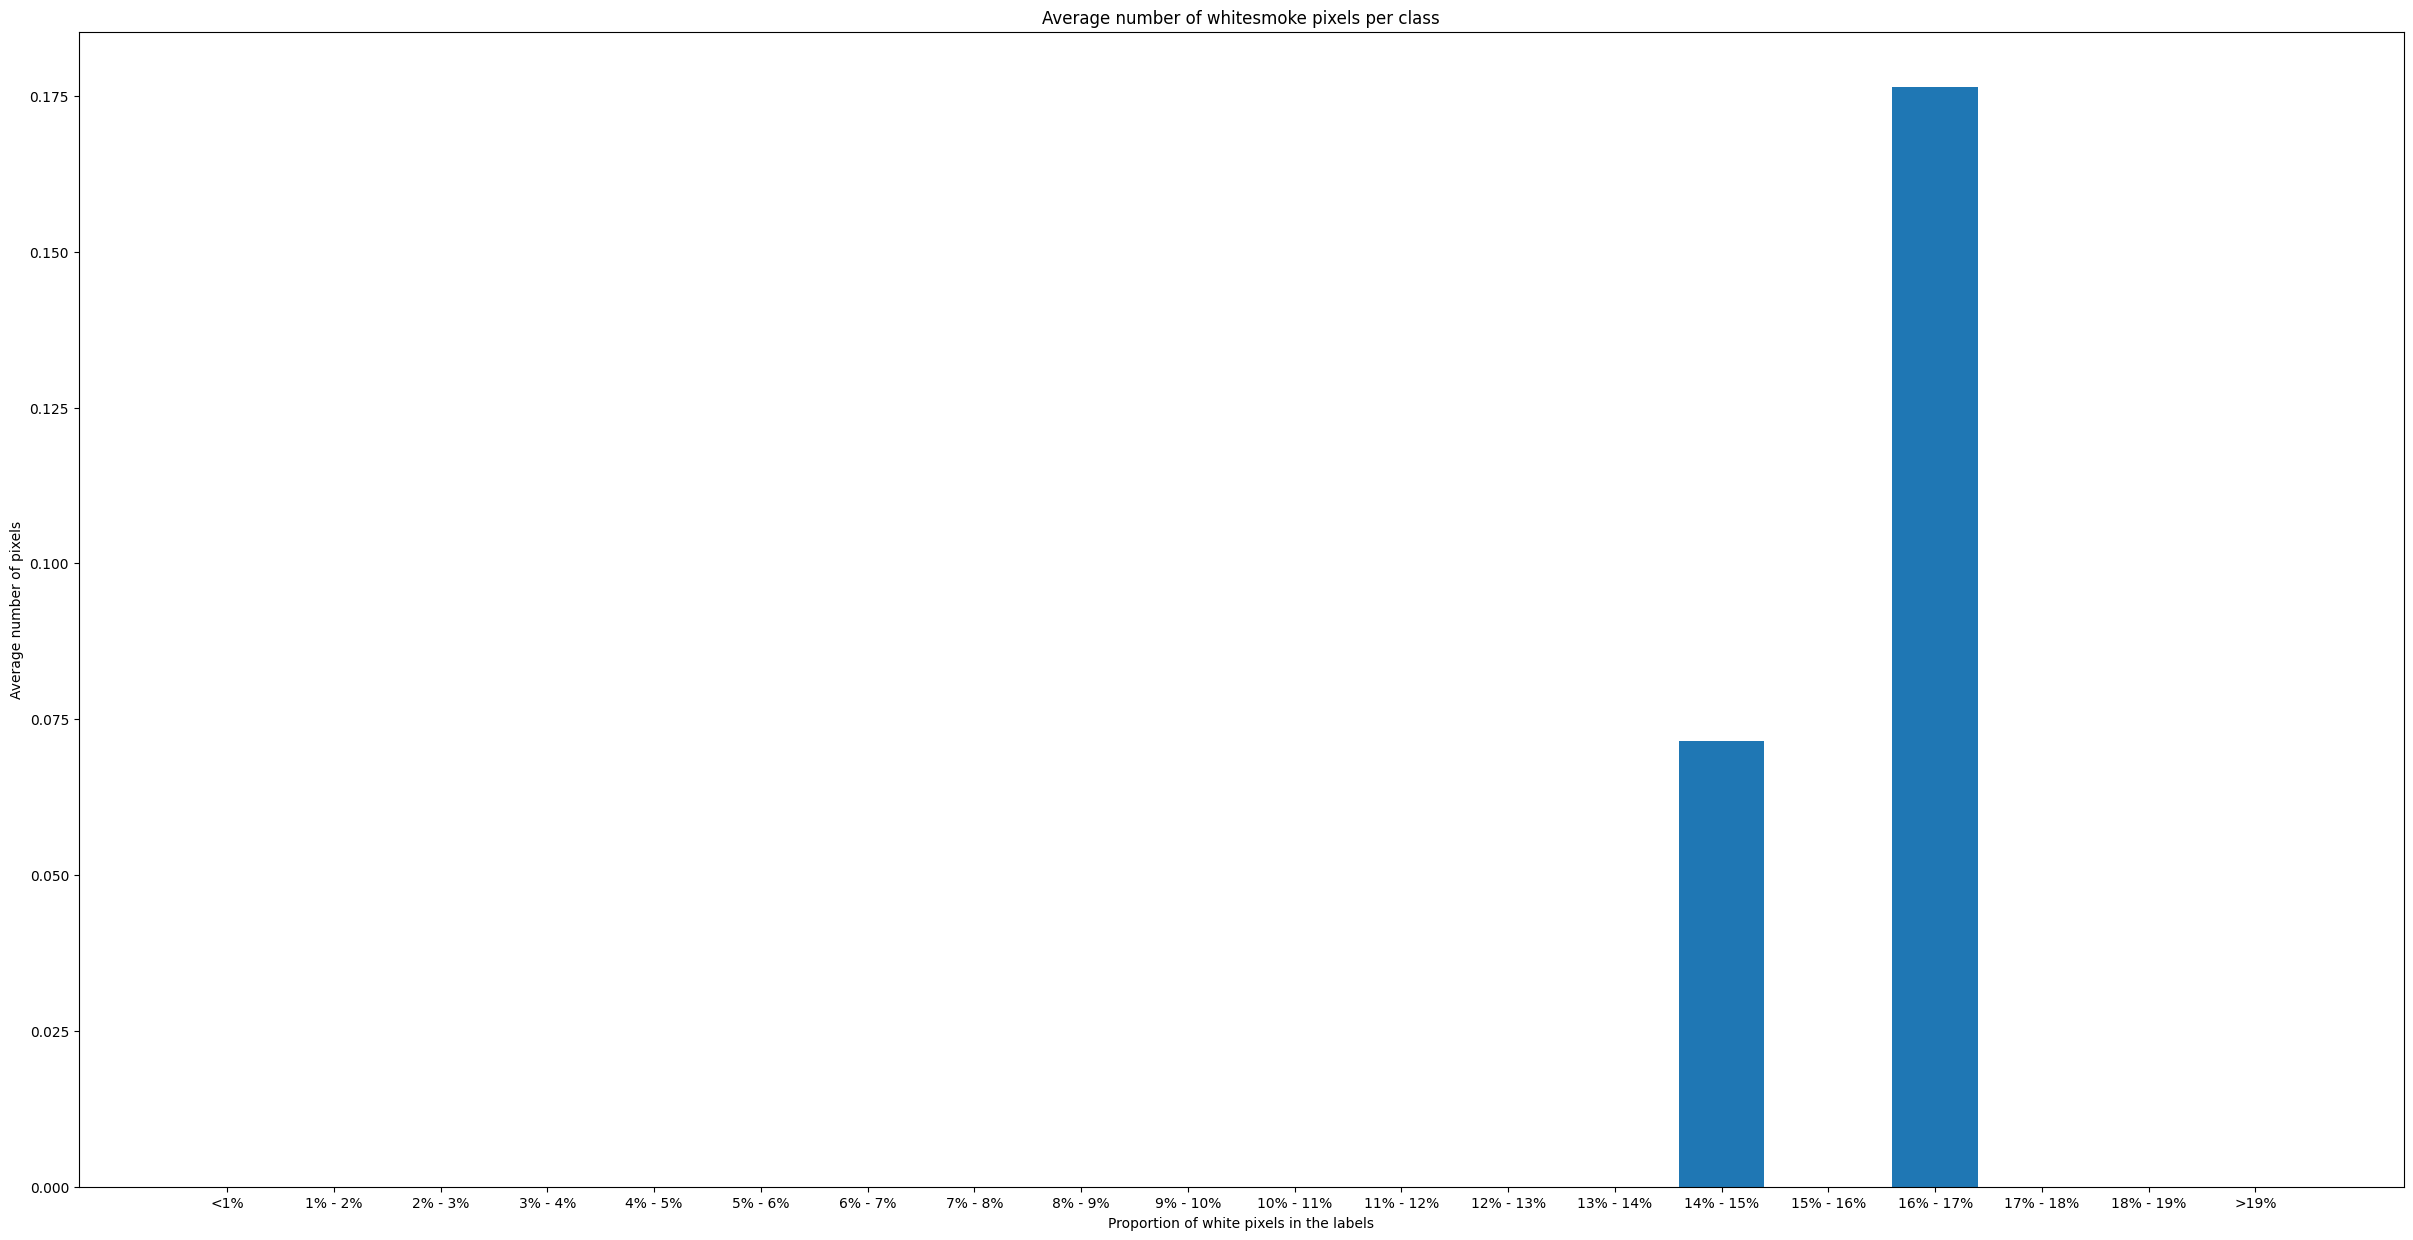

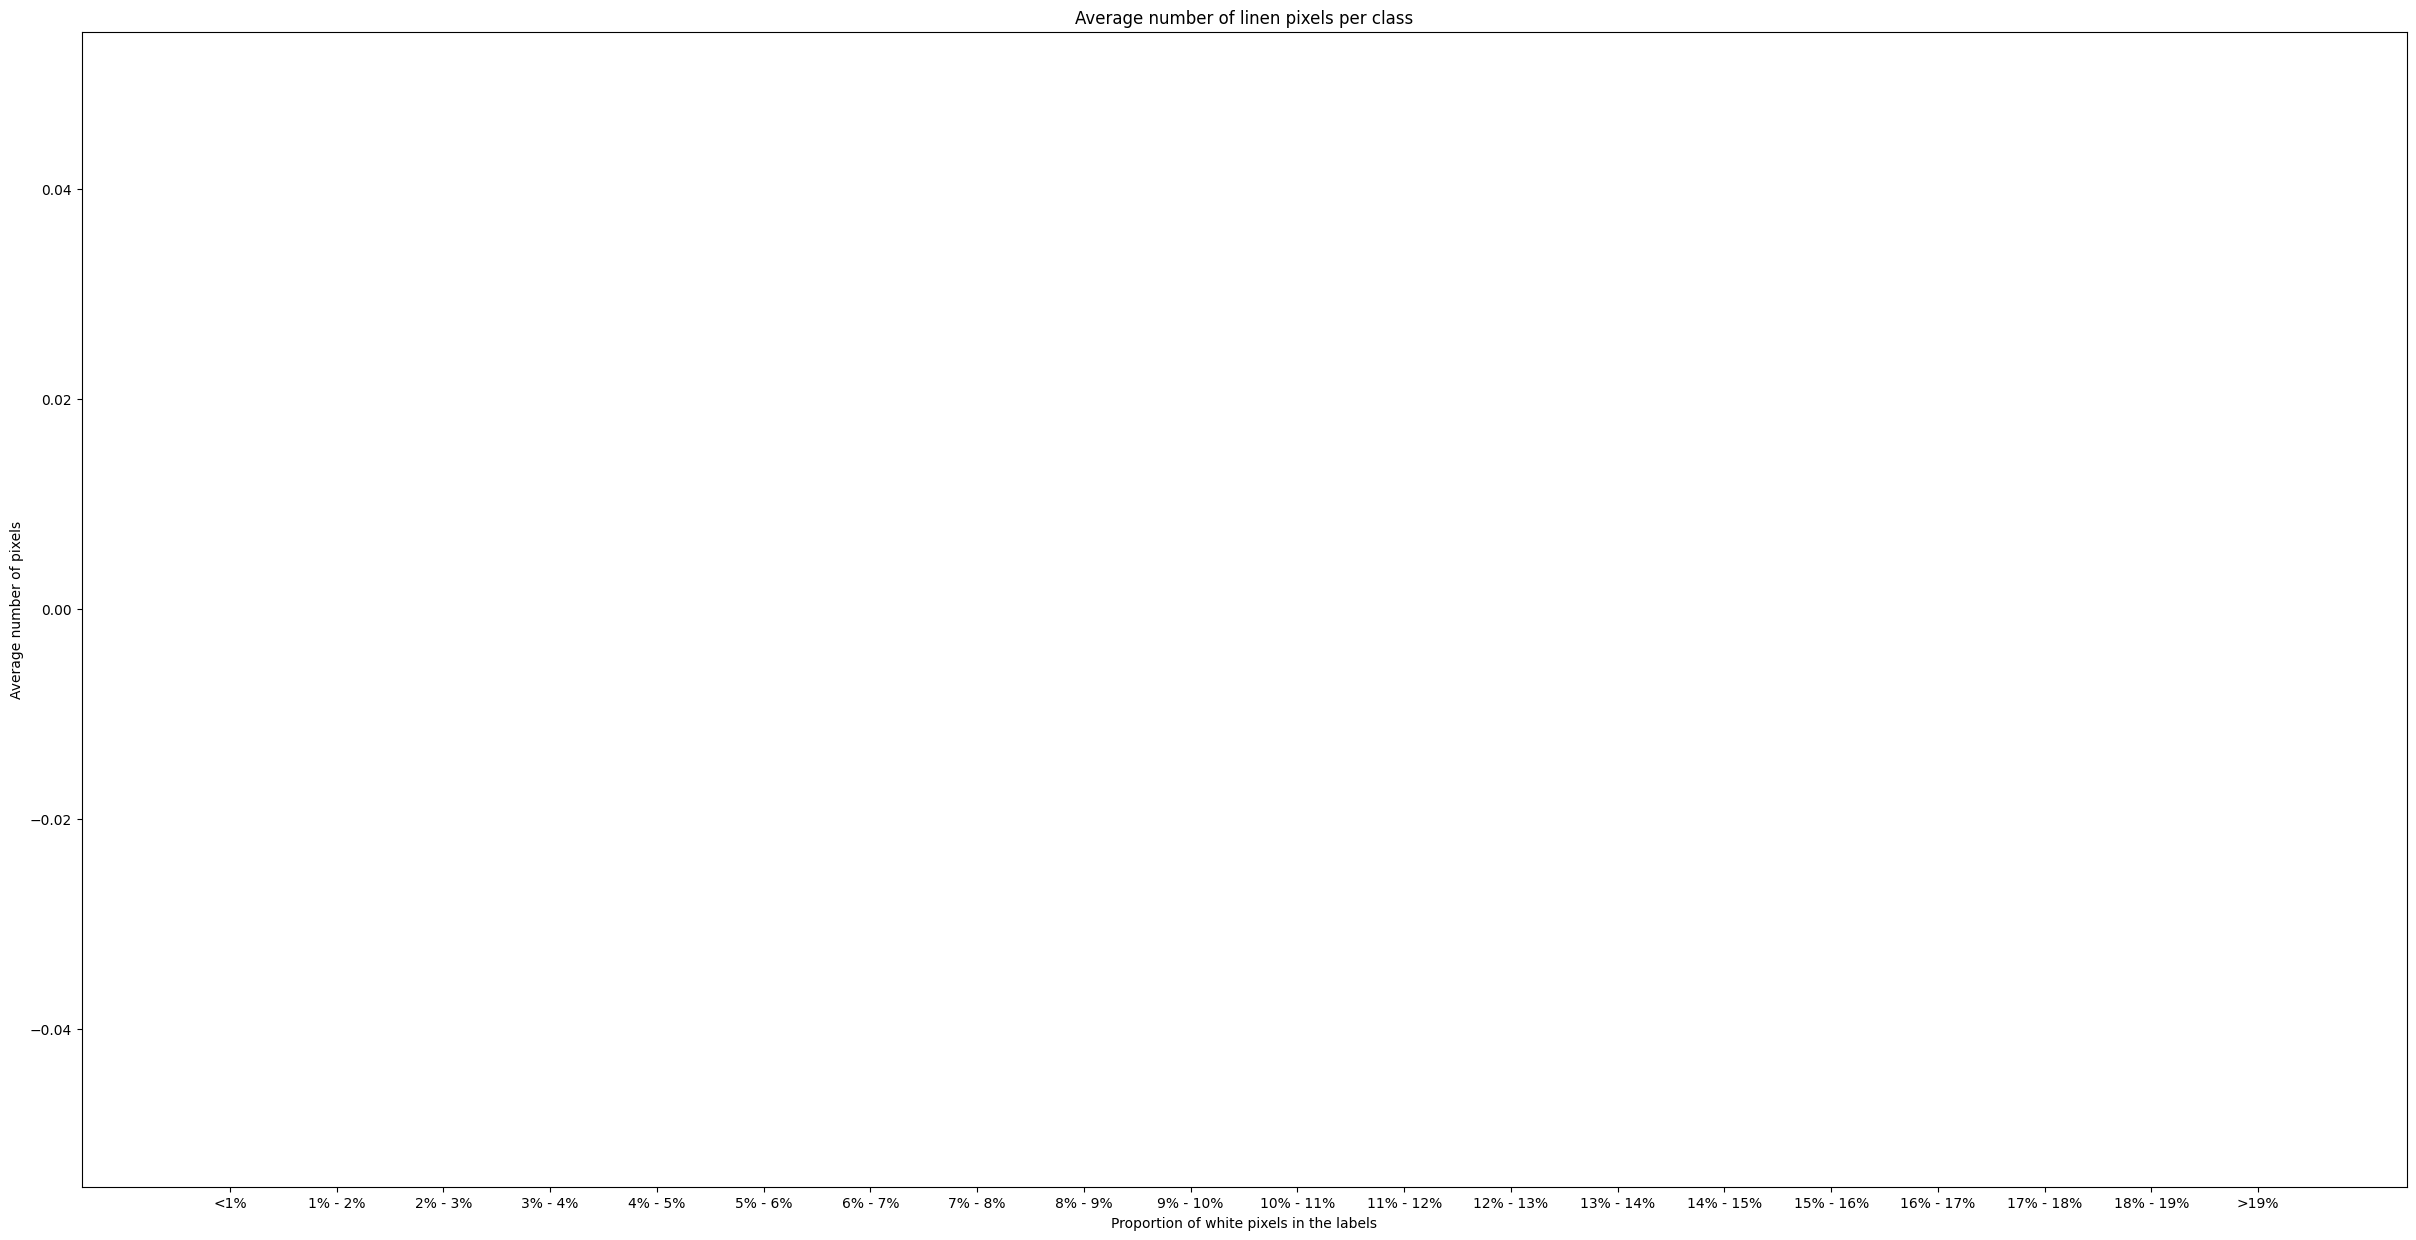

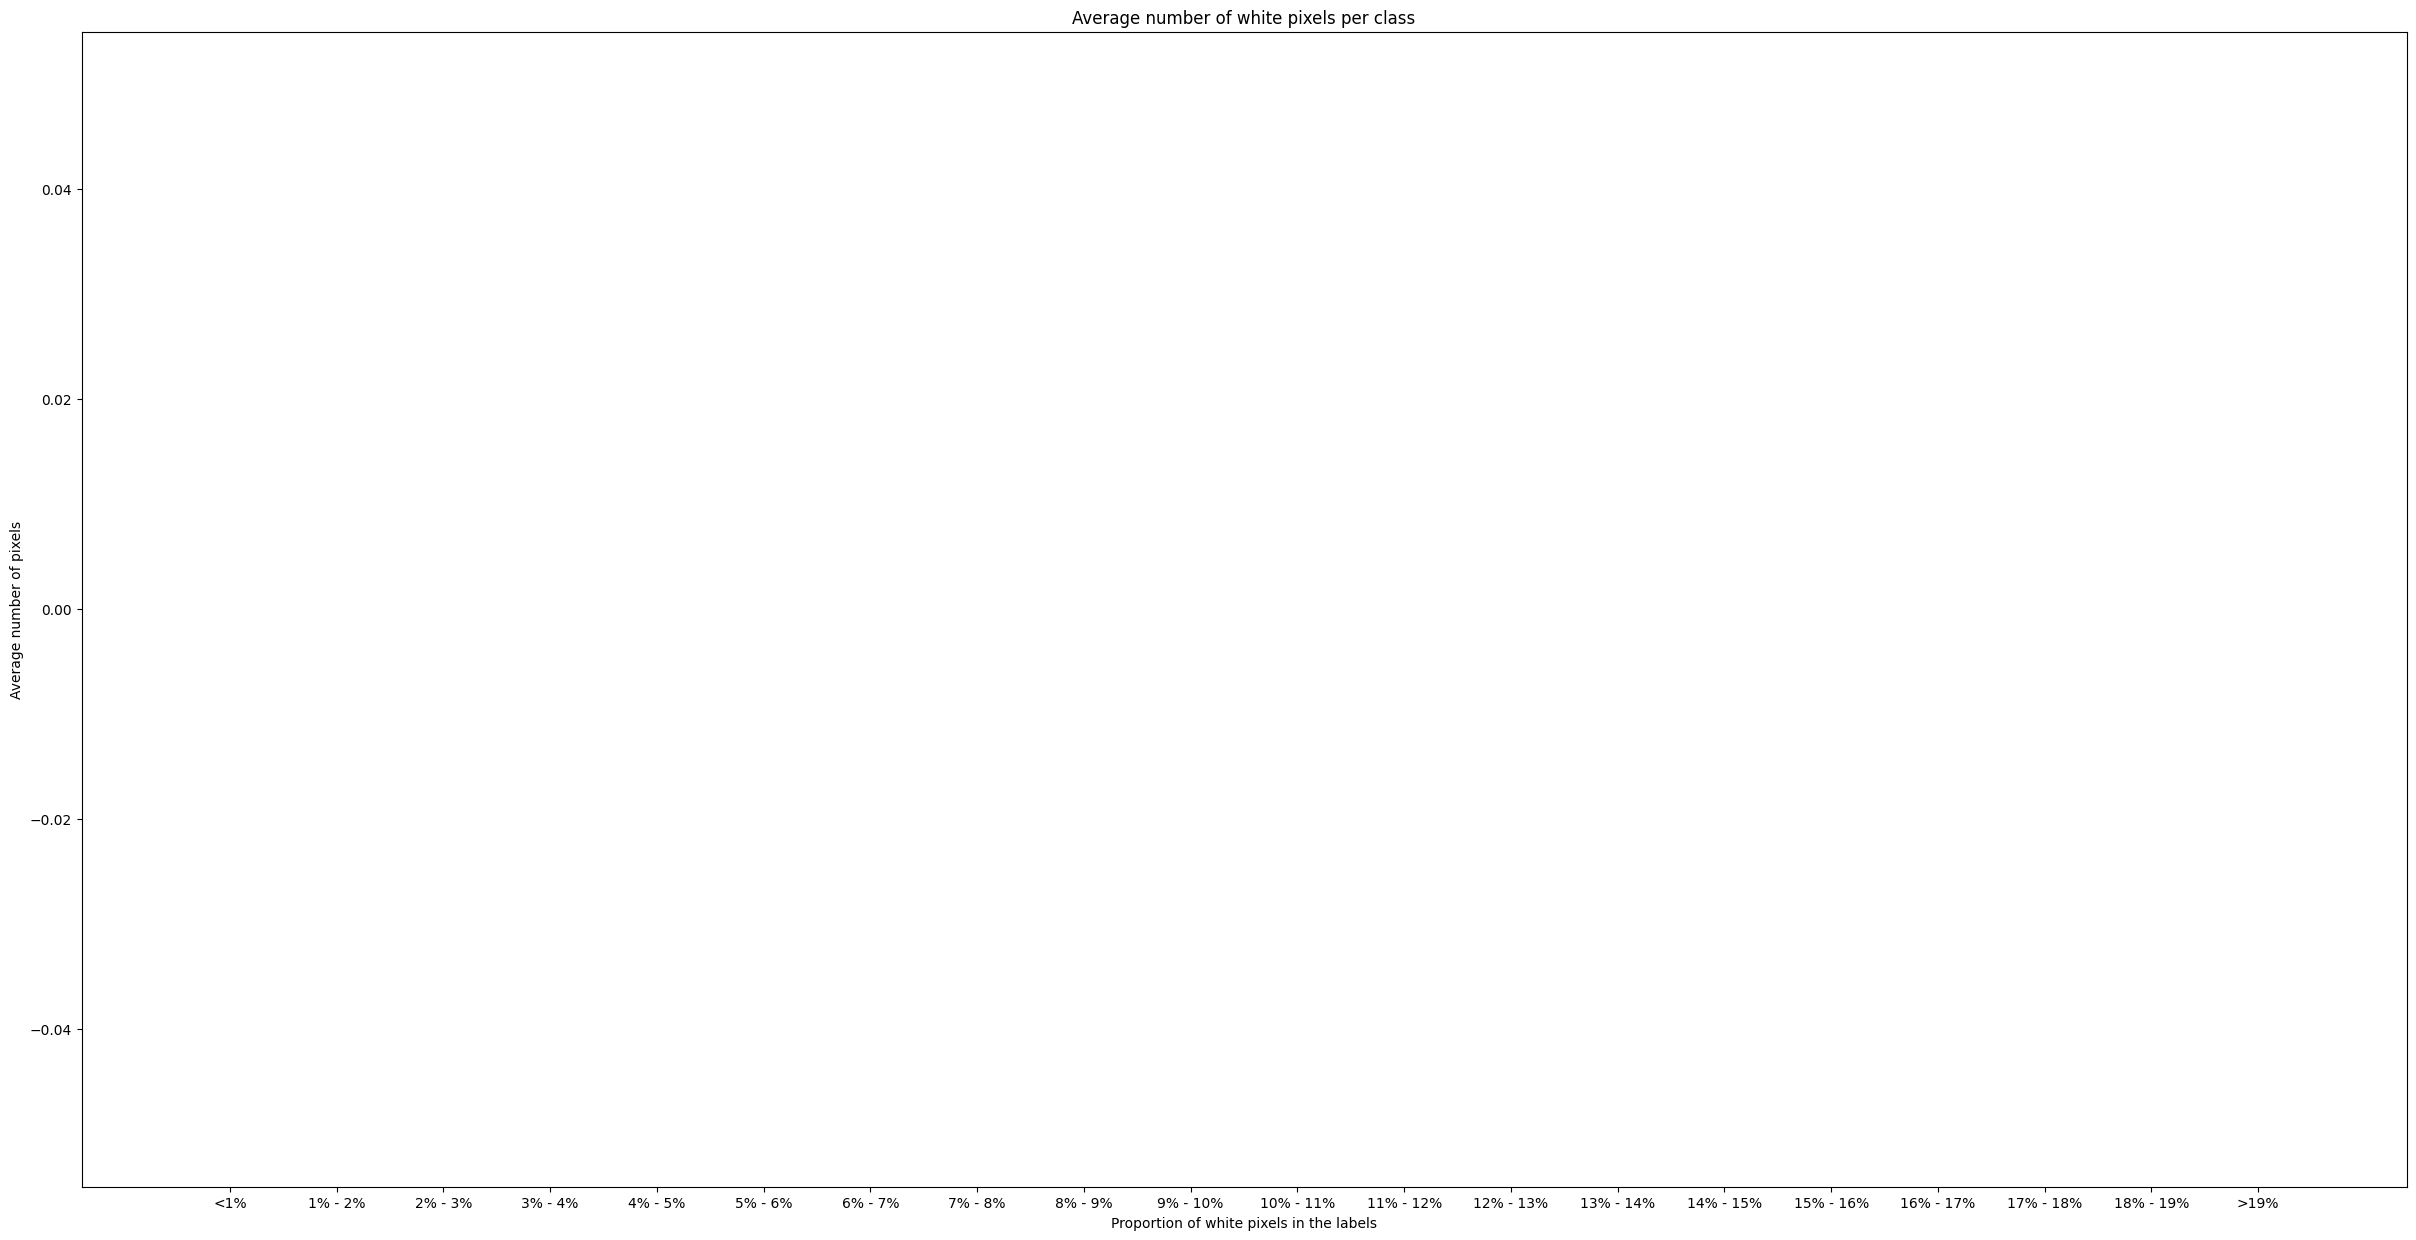

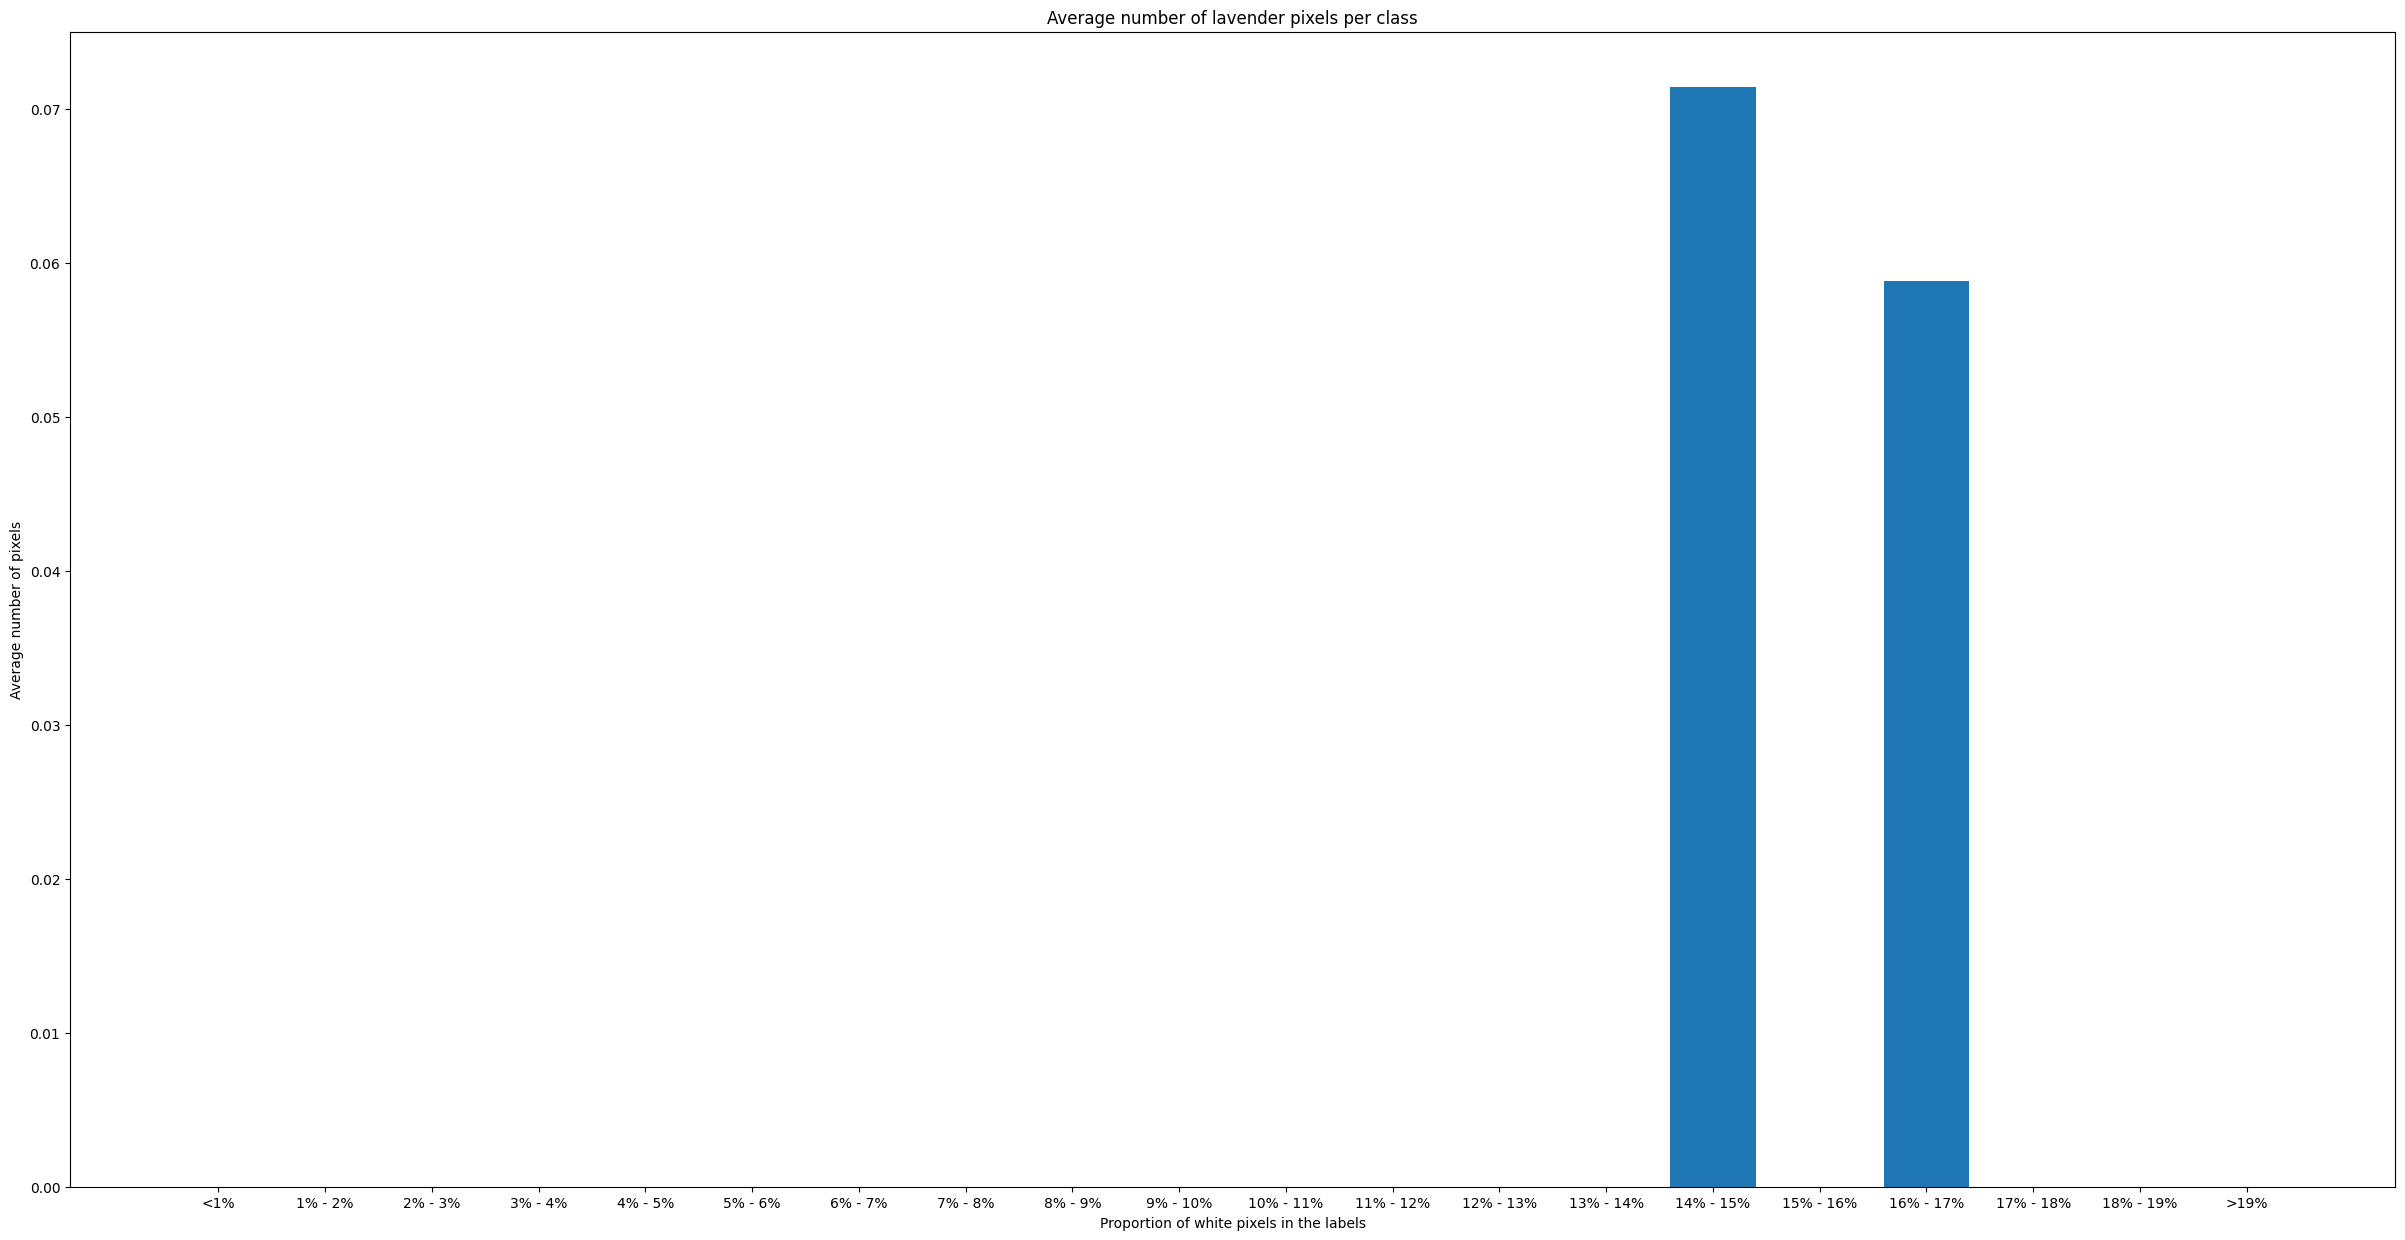

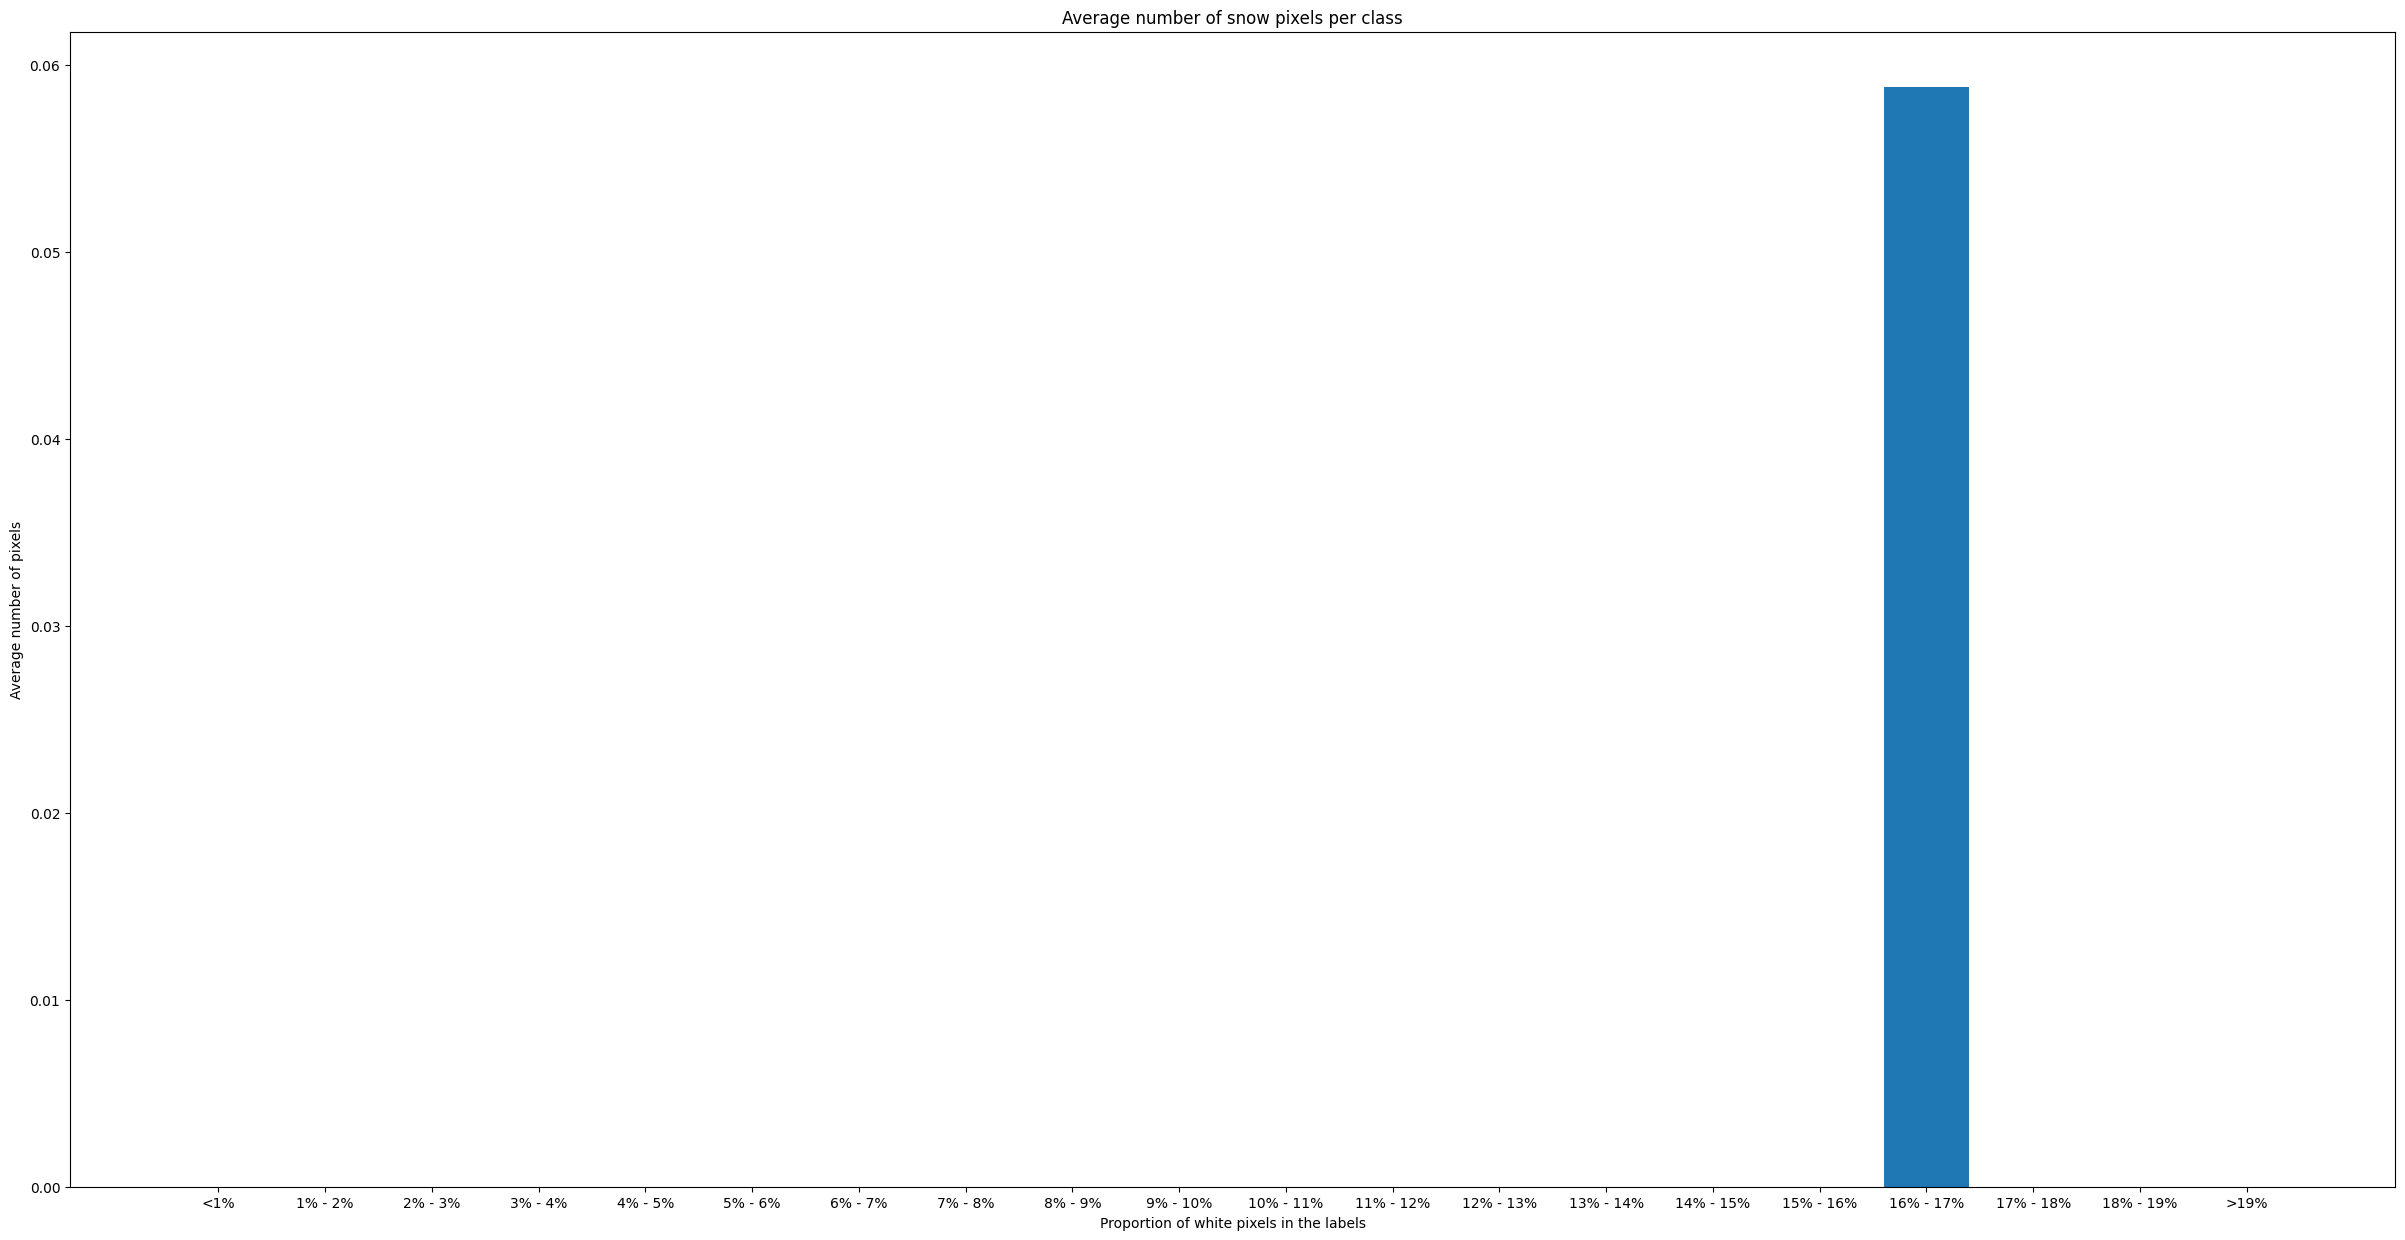

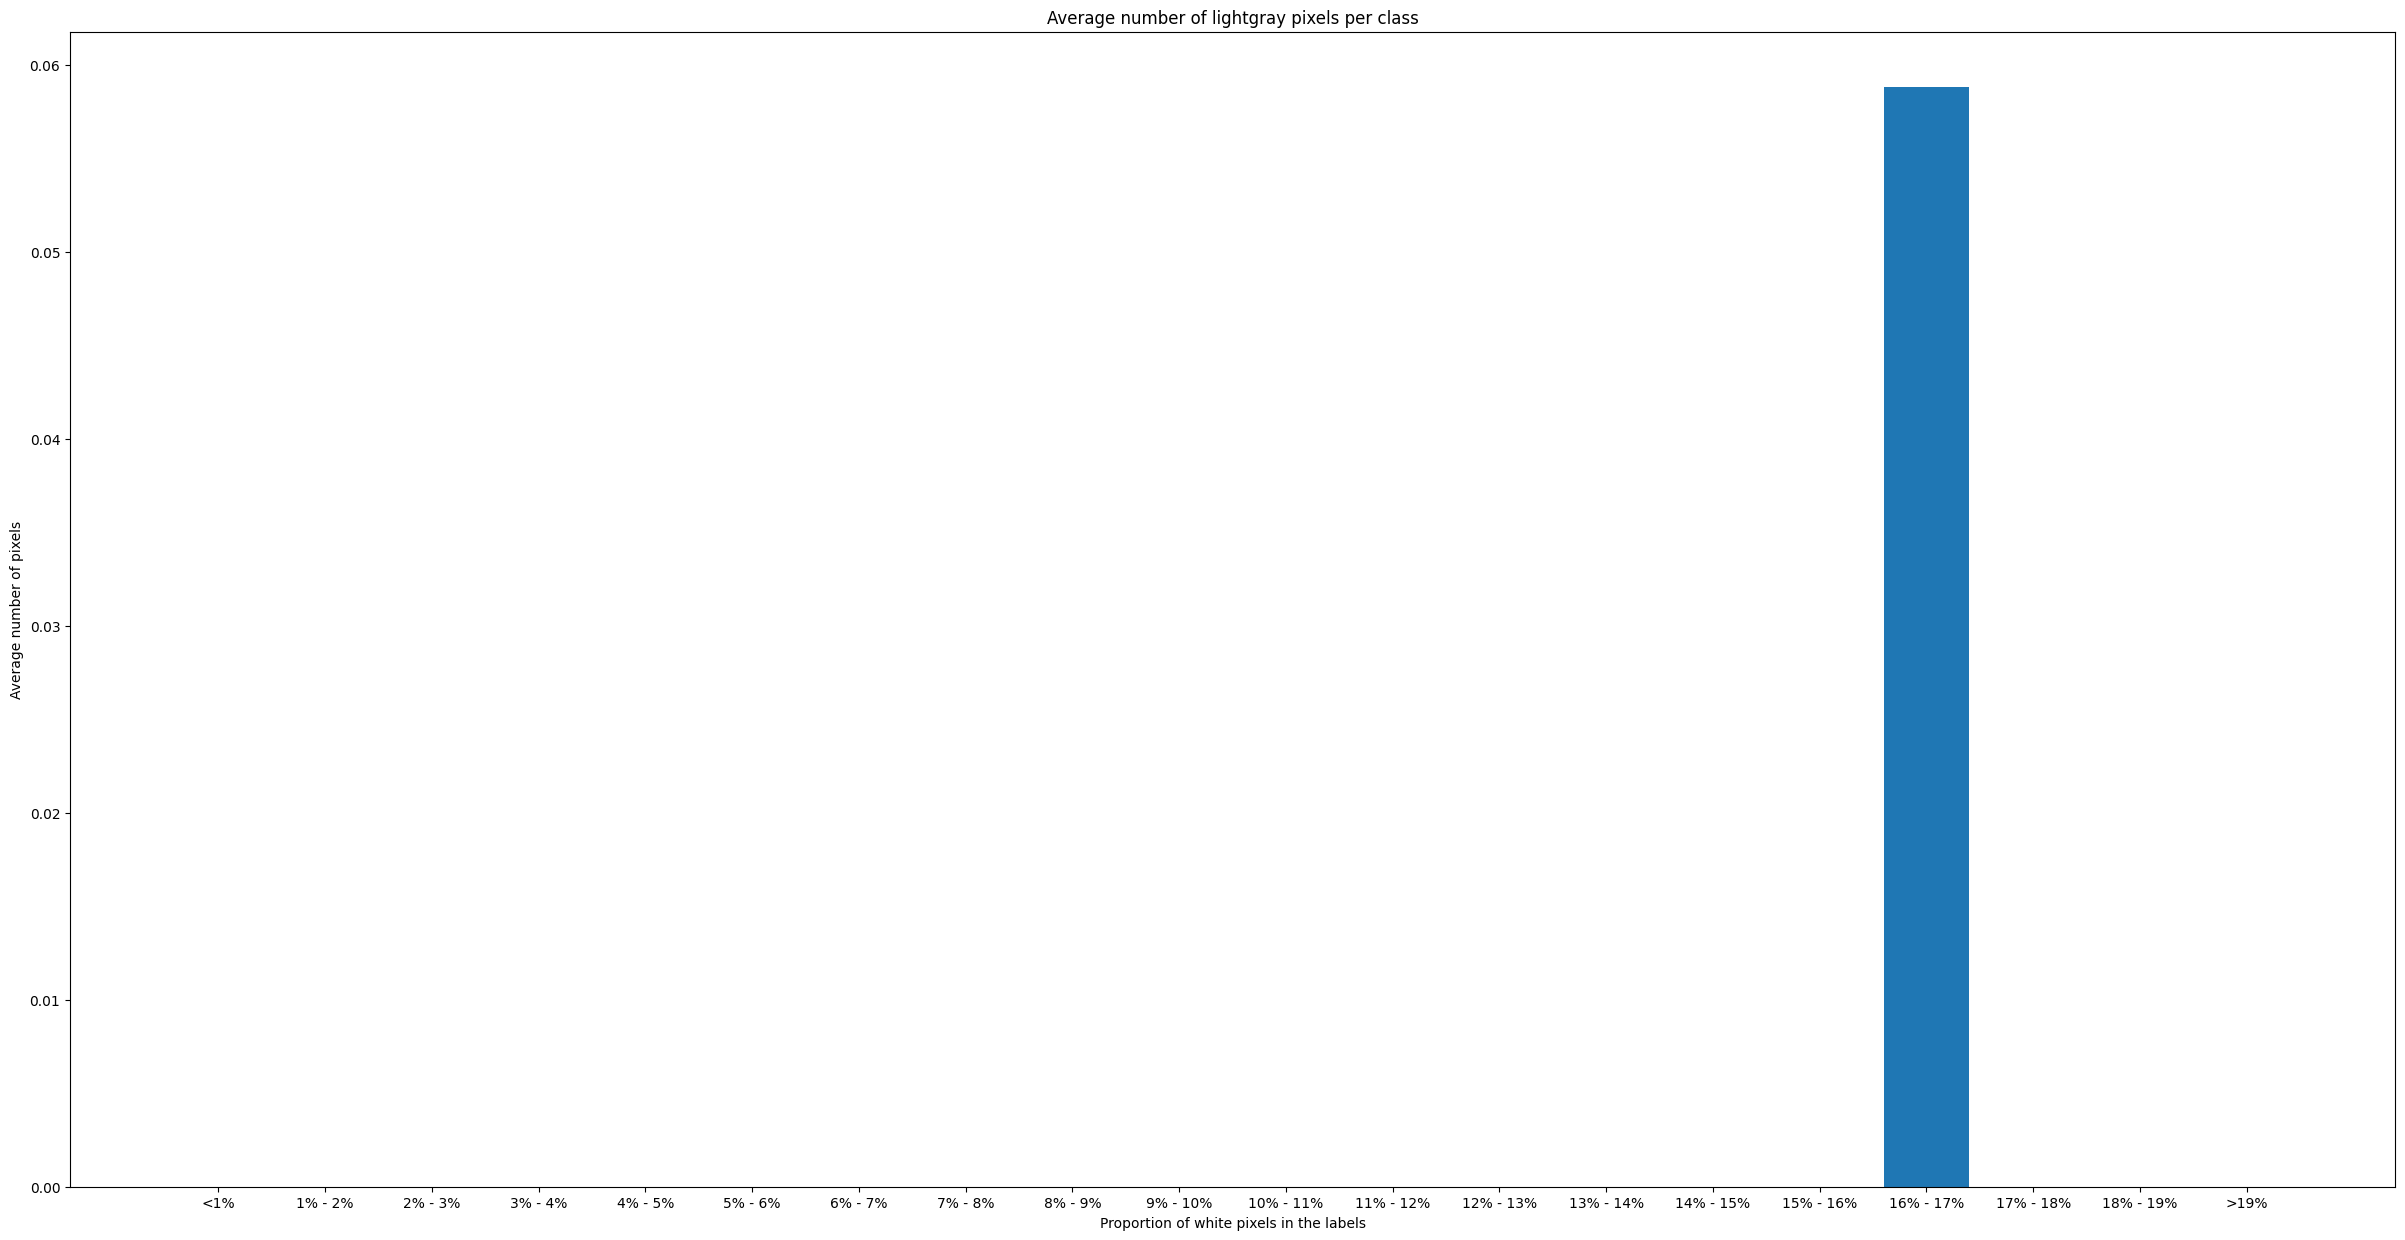

In [ ]:
# one plot per colour
categories = list(classes.keys())
for colour in colours_list:
  count_col = white_avg_num[colour]
  fig, ax = plt.subplots(figsize=(30, 15))
  p = ax.bar(categories, count_col)
  ax.set_title(f"Average number of {colour} pixels per class")
  ax.set_xlabel("Proportion of white pixels in the labels")
  ax.set_ylabel("Average number of pixels")
  plt.show()

In [ ]:
# Plots considering "Training", "Validation" or "Testing" datasets
import pandas as pd

train_x = pd.read_csv('/content/train_x.csv')
train_y = pd.read_csv('/content/train_y.csv')
val_x = pd.read_csv('/content/val_x.csv')
val_y = pd.read_csv('/content/val_y.csv')
test_x = pd.read_csv('/content/test_x.csv')
test_y = pd.read_csv('/content/test_y.csv')

path = "/content/"

train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for i in range(train_x.size):
  image_path = path + train_x.iloc[i,0]
  label_path = path + train_y.iloc[i,0]

  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

  train_images.append(image_path)
  train_labels.append(label_path)

for i in range(val_x.size):
  image_path = path + val_x.iloc[i,0]
  label_path = path + val_y.iloc[i,0]

  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

  val_images.append(image_path)
  val_labels.append(label_path)

for i in range(test_x.size):
  image_path = path + test_x.iloc[i,0]
  label_path = path + test_y.iloc[i,0]

  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)

  test_images.append(image_path)
  test_labels.append(label_path)


colours_train_images = {}
colours_train_labels = {}
colours_val_images = {}
colours_val_labels = {}
colours_test_images = {}
colours_test_labels = {}

for p in train_images:
  colours_train_images[p] = count_pixels_img(p)
for p in train_labels:
  colours_train_labels[p] = count_pixels_img(p)
for p in val_images:
  colours_val_images[p] = count_pixels_img(p)
for p in val_labels:
  colours_val_labels[p] = count_pixels_img(p)
for p in test_images:
  colours_test_images[p] = count_pixels_img(p)
for p in test_labels:
  colours_test_labels[p] = count_pixels_img(p)

print(colours_train_images[train_images[0]])
print(colours_train_labels[train_labels[0]])

In [ ]:
print(train_x.size)
print(val_x.size)
print(test_x.size)

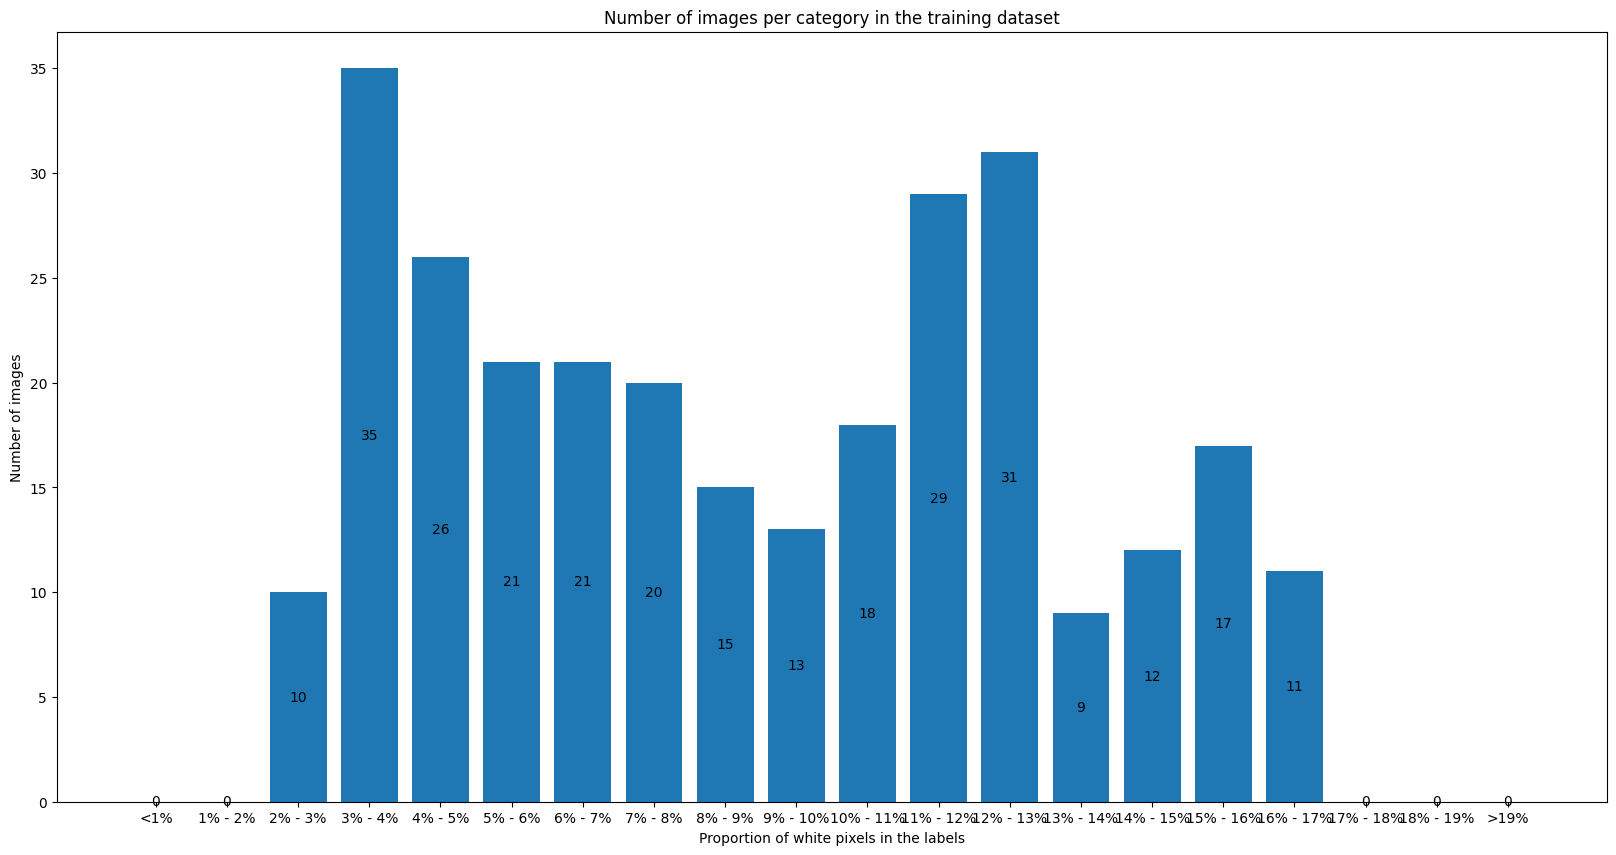

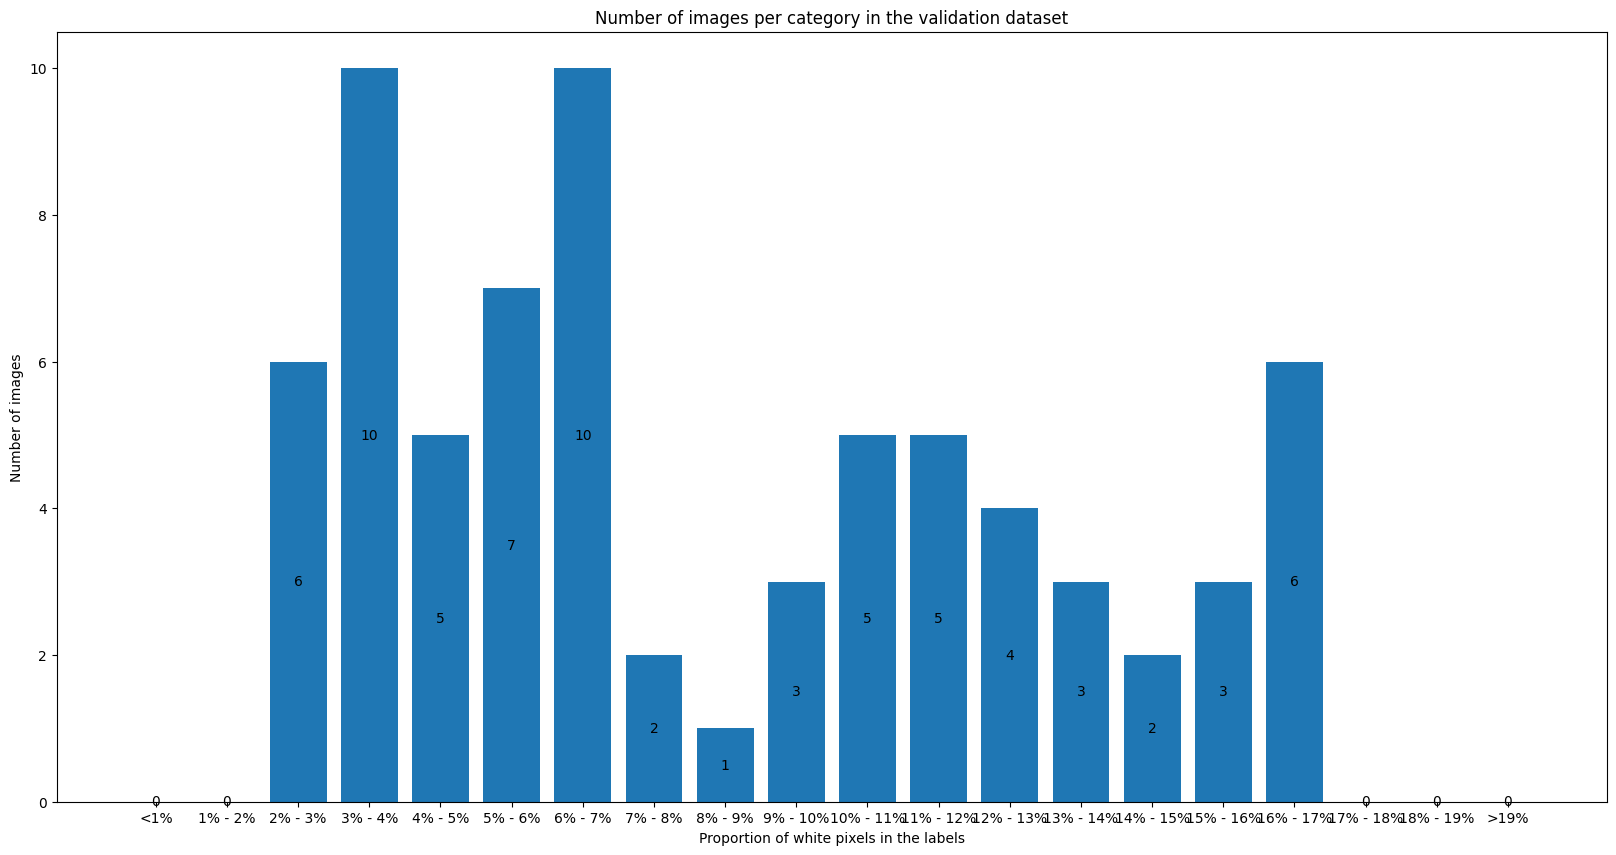

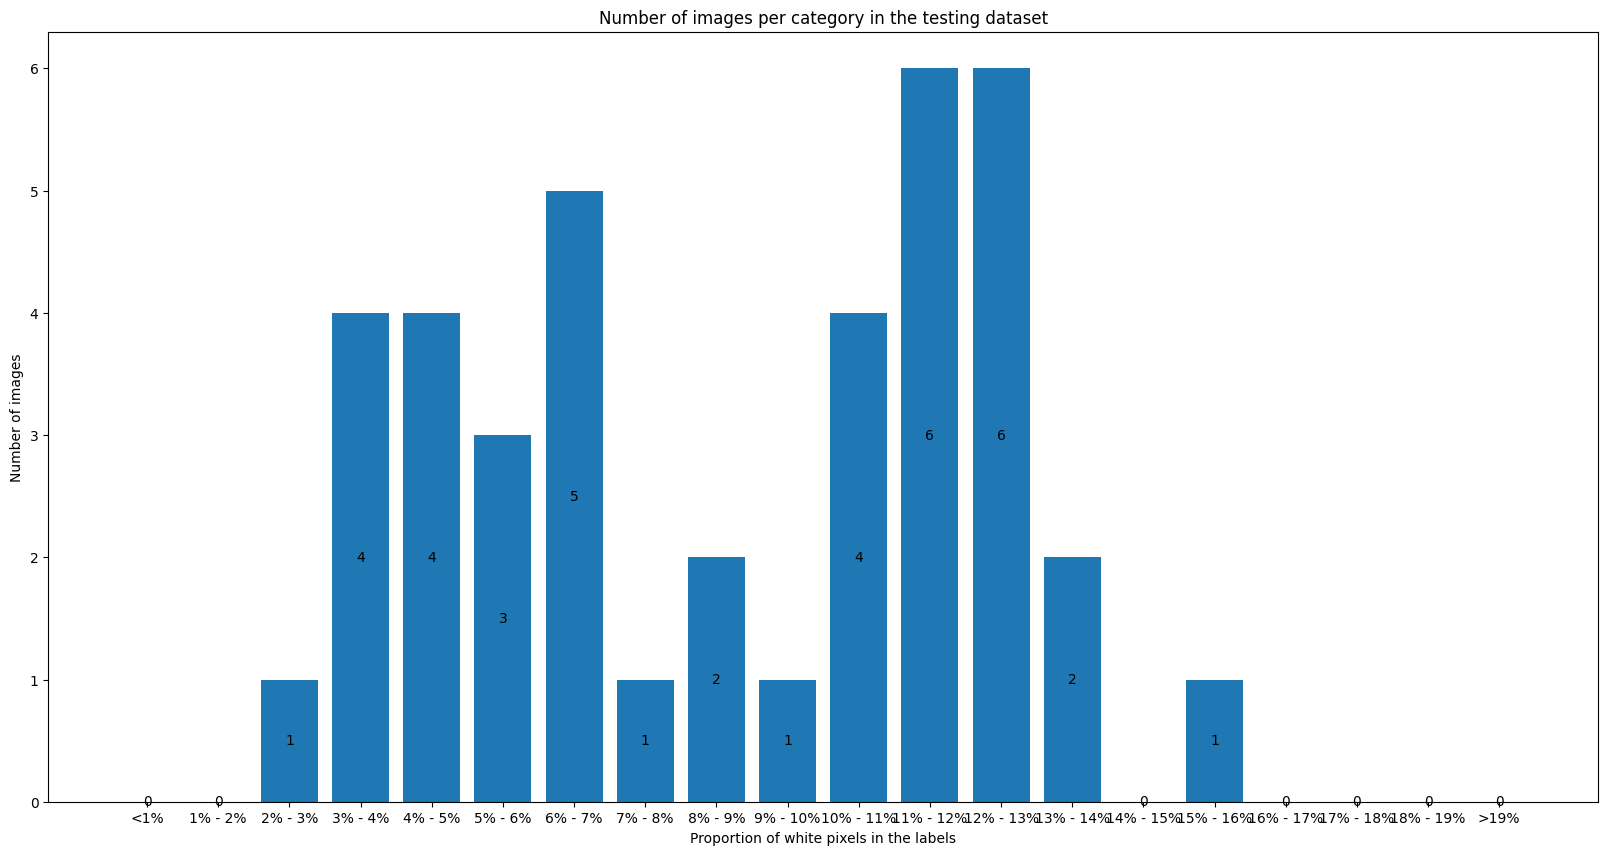

In [ ]:
train_classes = define_classes(colours_train_labels, 512*512)
val_classes = define_classes(colours_val_labels, 512*512)
test_classes = define_classes(colours_test_labels, 512*512)

# Number of white pixels
train_categories = list(train_classes.keys())
train_count = [len(train_classes[key]) for key in train_classes.keys()]
fig, ax = plt.subplots(figsize=(20, 10))
p = ax.bar(train_categories, train_count)
ax.bar_label(p, label_type='center')
ax.set_title("Number of images per category in the training dataset")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Number of images")
plt.show()

val_categories = list(val_classes.keys())
val_count = [len(val_classes[key]) for key in val_classes.keys()]
fig, ax = plt.subplots(figsize=(20, 10))
p = ax.bar(val_categories, val_count)
ax.bar_label(p, label_type='center')
ax.set_title("Number of images per category in the validation dataset")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Number of images")
plt.show()

test_categories = list(test_classes.keys())
test_count = [len(test_classes[key]) for key in test_classes.keys()]
fig, ax = plt.subplots(figsize=(20, 10))
p = ax.bar(test_categories, test_count)
ax.bar_label(p, label_type='center')
ax.set_title("Number of images per category in the testing dataset")
ax.set_xlabel("Proportion of white pixels in the labels")
ax.set_ylabel("Number of images")
plt.show()

In [ ]:
codes = []
for i in range(N):
  if i<10:
    code = "00" + str(i)
  elif i<100:
    code = "0" + str(i)
  else:
    code = str(i)
  codes.append(code)

colours = {}
for p in codes:
  colours[p] = count_pixels_img(labels_path + "/" + p + "_mask.png")
print(colours)

In [ ]:
def mean_white_pixels(colours=colours_train_labels, dataset=train_labels):
  sum = 0.00
  for p in dataset:
    sum += colours[p][255]
  return sum/float(len(dataset))

means = np.array([
    mean_white_pixels(colours, codes),
    mean_white_pixels(colours_train_labels, train_labels),
    mean_white_pixels(colours_val_labels, val_labels),
    mean_white_pixels(colours_test_labels, test_labels)
])

In [ ]:
def std_white_pixels(colours=colours_train_labels, dataset=train_labels):
  sum = 0.00
  for p in dataset:
    sum += (colours[p][255] - mean_white_pixels(colours, dataset))**2
  return np.sqrt(sum/float(len(dataset)))

stds = np.array([
    std_white_pixels(colours, codes),
    std_white_pixels(colours_train_labels, train_labels),
    std_white_pixels(colours_val_labels, val_labels),
    std_white_pixels(colours_test_labels, test_labels)
])

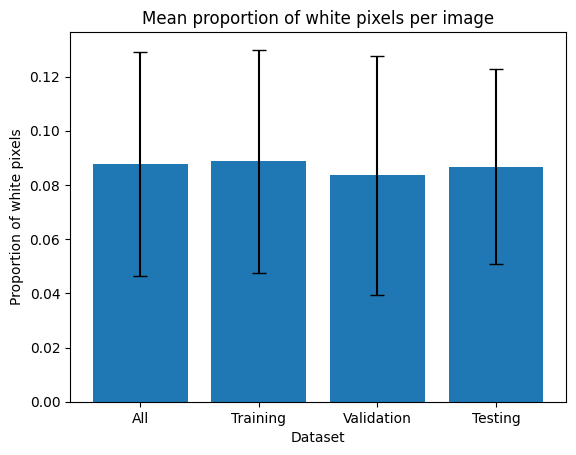

In [ ]:
names = ["All", "Training", "Validation", "Testing"]
plt.figure()
plt.bar(names, means/float(512*512), yerr=stds/float(512*512), capsize=5)
plt.title("Mean proportion of white pixels per image")
plt.xlabel("Dataset")
plt.ylabel("Proportion of white pixels")
plt.show()

In [ ]:
def num_white_pixels(colours=colours_train_labels, dataset=train_labels):
  tab = []
  for p in dataset:
    tab.append(colours[p][255])
  return np.array(tab)

train_white = num_white_pixels(colours_train_labels, train_labels)
val_white = num_white_pixels(colours_val_labels, val_labels)
test_white = num_white_pixels(colours_test_labels, test_labels)
data_white = num_white_pixels(colours, codes)